#**DATASET URGENCIAS HOSPITALARIAS ATENDIDAS**


In [1]:
# Montaje Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
  # Ruta de Archivo
  %cd /content/drive/Othercomputers/Mi portátil/Master UPF Barcelona/Trabajos Grupales/TFM

/content/drive/Othercomputers/Mi portátil/Master UPF Barcelona/Trabajos Grupales/TFM


##**1. EXPLORACIÓN Y TRATAMIENTO DE DATOS**

###**1.1. EXPLORACIÓN INICIAL**

In [3]:
import pandas as pd
import numpy as np

# Cargar el archivo, crear el DF
urgencias_df = pd.read_csv("urgencias-hospitalarias-atendidas.csv", encoding='utf-8', sep=';')

# Función para análisis descriptivo
def analisis_descriptivo(df):
    # Estadísticos
    stats_df = df.describe(include='all').transpose()

    # Otros valores
    stats_df['Tipo de Dato'] = df.dtypes
    stats_df['Valores Únicos'] = df.nunique()
    stats_df['Valores Nulos'] = df.isnull().sum()
    stats_df['Moda'] = df.mode().iloc[0]

    # Tipo de Variable
    for col in stats_df.index:
        if pd.api.types.is_numeric_dtype(df[col]):
            stats_df.at[col, 'Tipo de Variable'] = 'Numérica'
        else:
            stats_df.at[col, 'Tipo de Variable'] = 'Categórica'

    # Reordenar Columnas
    stats_df = stats_df[['Tipo de Dato', 'Tipo de Variable', 'Valores Únicos', 'Valores Nulos',
                         'mean', '50%', 'Moda', 'std', 'min', 'max', '25%', '75%']]

    return stats_df

# Se ejecuta la Función
analisis_inicial = analisis_descriptivo(urgencias_df)

# Se muestra el DF
analisis_inicial

,Tipo de Dato,Tipo de Variable,Valores Únicos,Valores Nulos,mean,50%,Moda,std,min,max,25%,75%
Fecha de atención,object,Categórica,1095,0,NaN,NaN,2022-05-23,NaN,NaN,NaN,NaN,NaN
Día de la semana,object,Categórica,7,0,NaN,NaN,LUNES,NaN,NaN,NaN,NaN,NaN
Hora,object,Categórica,1441,0,NaN,NaN,18:00,NaN,NaN,NaN,NaN,NaN
Nivel de triaje,float64,Numérica,5,338946,3.605321,4.0,4.0,0.714816,1.0,5.0,3.0,4.0
Zona Básica de Salud,object,Categórica,247,92032,NaN,NaN,Z.B.S. Eras de Renueva,NaN,NaN,NaN,NaN,NaN
Ámbito de procedencia,object,Categórica,2,92032,NaN,NaN,Urbano,NaN,NaN,NaN,NaN,NaN
Hospital,object,Categórica,14,0,NaN,NaN,C.A.U. León,NaN,NaN,NaN,NaN,NaN
Área,object,Categórica,11,0,NaN,NaN,Burgos,NaN,NaN,NaN,NaN,NaN
Provincia,object,Categórica,9,0,NaN,NaN,Valladolid,NaN,NaN,NaN,NaN,NaN
Edad,float64,Numérica,115,5005,50.239717,52.0,0.0,27.320117,-2.0,122.0,29.0,74.0


In [4]:
urgencias_df.head()

,Fecha de atención,Día de la semana,Hora,Nivel de triaje,Zona Básica de Salud,Ámbito de procedencia,Hospital,Área,Provincia,Edad,Sexo
0,2023-12-13,MIÉRCOLES,13:43,5.0,Z.B.S. Olmedo,Rural,H. Medina del Campo,Valladolid Este,Valladolid,74.0,Hombre
1,2023-12-12,MARTES,14:27,4.0,Z.B.S. Olmedo,Rural,H. Medina del Campo,Valladolid Este,Valladolid,75.0,Mujer
2,2023-12-12,MARTES,11:10,2.0,Z.B.S. Olmedo,Rural,H. Medina del Campo,Valladolid Este,Valladolid,58.0,Mujer
3,2023-12-10,DOMINGO,19:47,3.0,Z.B.S. Olmedo,Rural,H. Medina del Campo,Valladolid Este,Valladolid,59.0,Mujer
4,2023-12-11,LUNES,23:20,3.0,Z.B.S. Olmedo,Rural,H. Medina del Campo,Valladolid Este,Valladolid,59.0,Mujer


In [5]:
urgencias_df.shape

(2508336, 11)

###**1.2. ANÁLISIS DESCRIPTIVO**

####**1.2.1. Variables Categóricas**

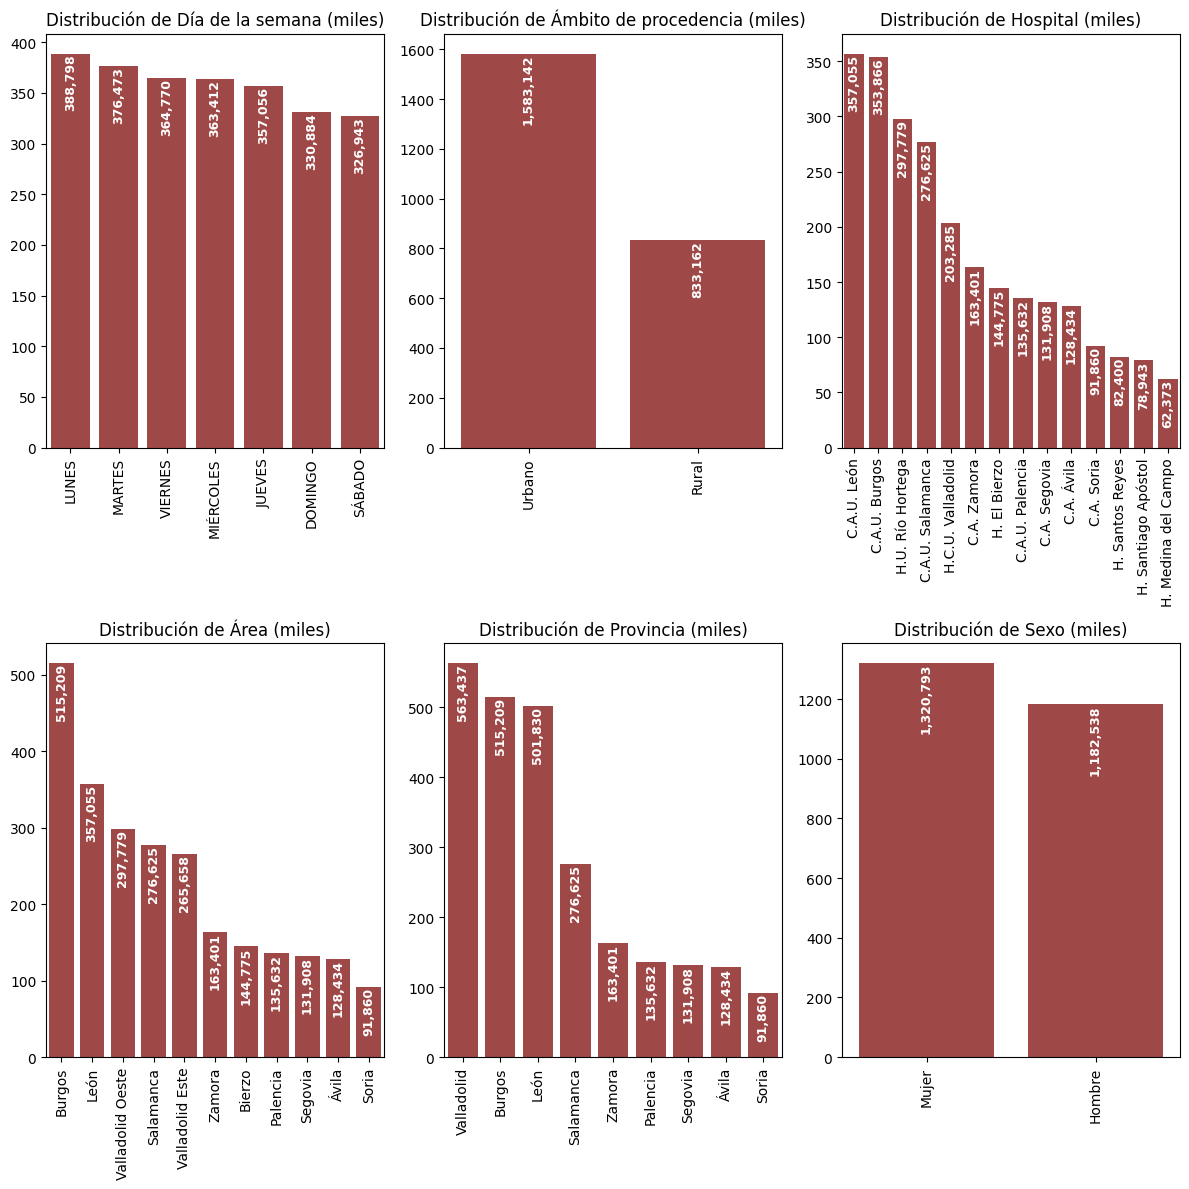

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

variables_categoricas = ['Día de la semana', 'Ámbito de procedencia',
                         'Hospital', 'Área', 'Provincia', 'Sexo']

# Función para análisis y visualización
def analisis_categorico(df, columna, ax):
    # Cálculo de frecuencia
    conteo_categorias = df[columna].value_counts()

    # Definición de Gráficos
    sns.countplot(data=df, x=columna, order=conteo_categorias.index, ax=ax, color='#ac3a3a')
    ax.set_title(f'Distribución de {columna}')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}'))
    ax.tick_params(axis='x', rotation=90)
    ax.yaxis.grid(False)
    ax.xaxis.grid(False)

    # Se incluye frecuencia en los gráficos
    for p in ax.patches:
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        formatted_freq = '{:,.0f}'.format(y)
        ax.text(x, y, f'{formatted_freq}', ha='center', va='top', color='white', fontsize=9, fontweight='bold', rotation=90)

# Subplots
num_variables = len(variables_categoricas)
num_cols = 3
num_rows = (num_variables + num_cols - 1) // num_cols  # Calcula el número de filas necesarias
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))

# Iteración sobre los subplots
axs = axs.flatten()

# Iteracion sobre las variables
for i, var in enumerate(variables_categoricas):
    if i < num_variables:
        analisis_categorico(urgencias_df, var, axs[i])
        axs[i].set_title(f'Distribución de {var} (miles)')

# Ajuste y Visualización
plt.tight_layout()
plt.show()

####**1.2.2. Variables Numéricas**

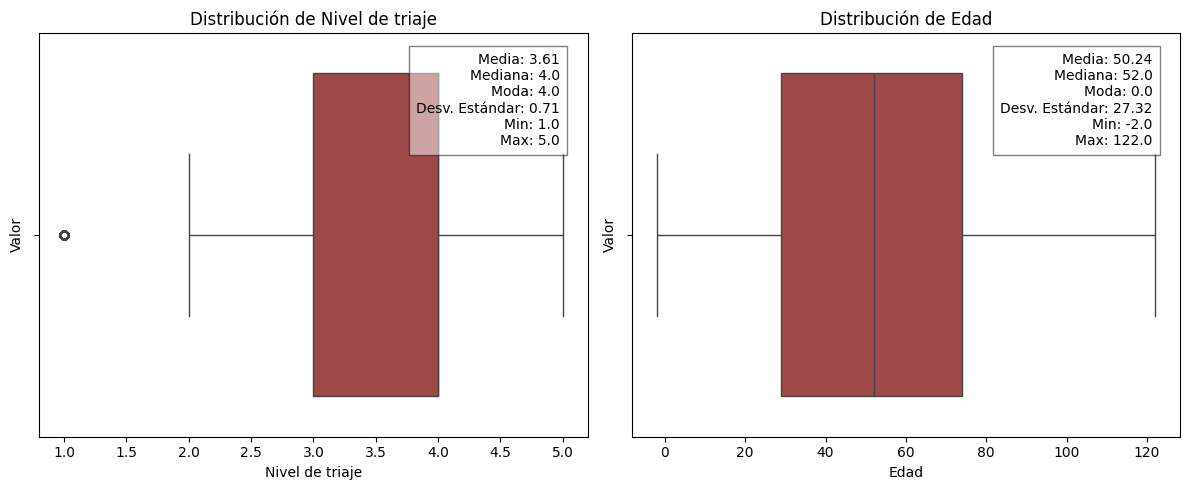

In [7]:
from statistics import mode

variables_numericas = ['Nivel de triaje', 'Edad']

# Función para generar boxplots y mostrar estadísticas
def generar_boxplots(df, variables):
    fig, axs = plt.subplots(len(variables) // 2, 2, figsize=(12, 5))
    axs = axs.flatten()

    for i, var in enumerate(variables):
        sns.boxplot(data=df, x=var, ax=axs[i], color='#ac3a3a')
        axs[i].set_title(f'Distribución de {var}')
        axs[i].set_xlabel(var)
        axs[i].set_ylabel('Valor')

        # Calcular moda
        moda = mode(df[var])

        # Leyenda
        media = df[var].mean()
        mediana = df[var].median()
        std_dev = df[var].std()
        min_val = df[var].min()
        max_val = df[var].max()
        stats_text = f'Media: {media:.2f}\nMediana: {mediana}\nModa: {moda}\nDesv. Estándar: {std_dev:.2f}\nMin: {min_val}\nMax: {max_val}'
        axs[i].text(0.95, 0.95, stats_text, transform=axs[i].transAxes, verticalalignment='top', horizontalalignment='right',
                    bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 5}, fontsize=10)

    plt.tight_layout()
    plt.show()

# Generar boxplots
generar_boxplots(urgencias_df, variables_numericas)

###**1.3. TRATAMIENTO DE DATOS**

####**COLUMNA "Fecha de atención":**

 - Transformación a formato fecha
 - Creación de nueva columna "Mes"
 - Creación de nueva columna "Año"

In [8]:
from babel.dates import format_date
from babel.dates import format_datetime
from babel.dates import format_time
from datetime import datetime

# TRATAMIENTO DE FORMATO

# Conversión de fecha a tipo date
urgencias_df['Fecha de atención'] = pd.to_datetime(urgencias_df['Fecha de atención'], format='%Y-%m-%d', errors='coerce')

# CREACIÓN DE COLUMNAS

# Creación columna Mes & Año
urgencias_df['Mes'] = urgencias_df['Fecha de atención'].apply(lambda x: format_date(x, format='MMM', locale='es').capitalize())
urgencias_df['Año'] = urgencias_df['Fecha de atención'].dt.year

In [9]:
# VALIDACIÓN DE CAMBIOS

print('- Formato:', urgencias_df['Fecha de atención'].dtype)
print('- Tamaño del DF:', urgencias_df.shape)
print('- Valores únicos Mes:', urgencias_df['Mes'].unique())
print('- Valores únicos Año:', urgencias_df['Año'].unique())

- Formato: datetime64[ns]
- Tamaño del DF: (2508336, 13)
- Valores únicos Mes: ['Dic' 'Feb' 'Ene' 'Mar' 'Abr' 'May' 'Jun' 'Jul' 'Ago' 'Sept' 'Oct' 'Nov']
- Valores únicos Año: [2023 2022 2021]


In [10]:
# VALIDACIÓN DE CAMBIOS

grupo_año = urgencias_df.groupby('Año')['Mes'].unique().reset_index()
for index, row in grupo_año.iterrows():
    año = row['Año']
    meses = ', '.join(map(str, row['Mes']))
    print(f'Año {año}: {meses}')

Año 2021: Ago, Sept, Oct, Nov, Dic, Jul, Mar, Ene, Feb, Abr, May, Jun
Año 2022: Ago, Sept, Oct, Nov, Dic, Ene, Feb, Mar, Abr, May, Jun, Jul
Año 2023: Dic, Feb, Ene, Mar, Abr, May, Jun, Jul, Ago, Sept, Oct, Nov


####**COLUMNA "Día de la semana":**

 - Reemplazo Días de la semana a partir de la fecha de atención

In [11]:
print('- Valores únicos:', urgencias_df['Día de la semana'].unique())

- Valores únicos: ['MIÉRCOLES' 'MARTES' 'DOMINGO' 'LUNES' 'VIERNES' 'SÁBADO' 'JUEVES']


In [12]:
# TRATAMIENTO DE FORMATO

urgencias_df['Día de la semana'] = urgencias_df['Fecha de atención'].apply(lambda x: format_date(x, format='EEE', locale='es').capitalize())

In [13]:
# VALIDACIÓN DE CAMBIOS

print('- Formato:', urgencias_df['Fecha de atención'].dtype)
print('- Tamaño del DF:', urgencias_df.shape)
print('- Valores únicos Día de la semana:', urgencias_df['Día de la semana'].unique())

- Formato: datetime64[ns]
- Tamaño del DF: (2508336, 13)
- Valores únicos Día de la semana: ['Mié' 'Mar' 'Dom' 'Lun' 'Vie' 'Sáb' 'Jue']


####**COLUMNA "Hora":**

 - Cambiar a formato hora
 - Creación de la columna "Turnos" en base a la información contenida en Decreto-ley 1/2023, de 30 de marzo, por el que se establece la jornada de trabajo de los empleados públicos de la Administración de la Comunidad de Castilla y León https://www.boe.es/buscar/doc.php?id=BOCL-h-2023-90128

 Los turnos se han definido como:

 - 22:00 - 08:00 (Noche) 10 horas
 - 08:00 - 15:00 (Mañana) 7 horas
 - 15:00 - 22:00 (Tarde) 7 horas


In [14]:
# TRATAMIENTO DE FORMATO Y CREACIÓN DE COLUMNA

# Función para cambio de formato y definición de turnos
def procesar_urgencias_df(urgencias_df):
    # Definición de franjas horarias
    franjas_horarias = {
        (8, 0, 15, 0): "Mañana",
        (15, 0, 22, 0): "Tarde",
        (22, 0, 24, 0): "Noche",
        (0, 0, 8, 0): "Noche"
    }

    # Función para determinar el turno correspondiente a la hora
    def determinar_turno(hora):
        for turno, franja_horaria in franjas_horarias.items():
            if turno[0] <= hora.hour < turno[2]:
                return franja_horaria
        return None

    # Limpieza y formateo de la columna 'Hora'
    def limpiar_y_formatear_hora(hora):
        try:
            partes = hora.split(':')
            if len(partes) == 2:
                hora = int(partes[0])
                minuto = int(partes[1])
                if 0 <= hora < 24 and 0 <= minuto < 60:
                    return f"{hora:02d}:{minuto:02d}"
        except:
            pass
        return None

    urgencias_df['Hora'] = urgencias_df['Hora'].apply(limpiar_y_formatear_hora)
    urgencias_df = urgencias_df.dropna(subset=['Hora'])
    urgencias_df['Hora'] = pd.to_datetime(urgencias_df['Hora'], format='%H:%M')
    urgencias_df['Turnos'] = urgencias_df['Hora'].apply(determinar_turno)

    return urgencias_df

# Procesamiento
urgencias_df = procesar_urgencias_df(urgencias_df)

<ipython-input-14-e86157ae006e>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  urgencias_df['Hora'] = pd.to_datetime(urgencias_df['Hora'], format='%H:%M')
<ipython-input-14-e86157ae006e>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  urgencias_df['Turnos'] = urgencias_df['Hora'].apply(determinar_turno)


In [15]:
# Definir cantidad de horas de cada turno
horas_turno = {'Noche': 10, 'Mañana': 7, 'Tarde': 7}
urgencias_df['HRxTurno'] = urgencias_df['Turnos'].map(horas_turno)

In [16]:
# VALIDACIÓN DE CAMBIOS

print('- Formato:', urgencias_df['Hora'].dtype)
print('- Tamaño del DF:', urgencias_df.shape)
print('- Valores únicos Turno:', urgencias_df['Turnos'].unique(),'\n')
print('- Valores únicos HRxTurno:', urgencias_df['HRxTurno'].unique(),'\n')
urgencias_df.head()

- Formato: datetime64[ns]
- Tamaño del DF: (2508335, 15)
- Valores únicos Turno: ['Mañana' 'Tarde' 'Noche'] 

- Valores únicos HRxTurno: [ 7 10] 



,Fecha de atención,Día de la semana,Hora,Nivel de triaje,Zona Básica de Salud,Ámbito de procedencia,Hospital,Área,Provincia,Edad,Sexo,Mes,Año,Turnos,HRxTurno
0,2023-12-13,Mié,1900-01-01 13:43:00,5.0,Z.B.S. Olmedo,Rural,H. Medina del Campo,Valladolid Este,Valladolid,74.0,Hombre,Dic,2023,Mañana,7
1,2023-12-12,Mar,1900-01-01 14:27:00,4.0,Z.B.S. Olmedo,Rural,H. Medina del Campo,Valladolid Este,Valladolid,75.0,Mujer,Dic,2023,Mañana,7
2,2023-12-12,Mar,1900-01-01 11:10:00,2.0,Z.B.S. Olmedo,Rural,H. Medina del Campo,Valladolid Este,Valladolid,58.0,Mujer,Dic,2023,Mañana,7
3,2023-12-10,Dom,1900-01-01 19:47:00,3.0,Z.B.S. Olmedo,Rural,H. Medina del Campo,Valladolid Este,Valladolid,59.0,Mujer,Dic,2023,Tarde,7
4,2023-12-11,Lun,1900-01-01 23:20:00,3.0,Z.B.S. Olmedo,Rural,H. Medina del Campo,Valladolid Este,Valladolid,59.0,Mujer,Dic,2023,Noche,10


####**COLUMNA "Nivel de triaje":**

 - Se Reemplazarán los Nans de manera aleatoria, como:
    - (5) el 50%, asumiendo que corresponden a pacientes que se retiraron del servicio antes de ser categorizados.
    - (1) el 50%, asumiendo que corresponden a pacientes que fueron ingresados inmediatamente si haber podido ser categorizados previamente.

 - Transformación a variable categórica ya que se asume que el Nivel de Triaje se considera un factor de clasificación.

  INFORMACIÓN SOBRE EL TRIAJE EN ESPAÑA

 El sistema de nivel de triaje utilizado en españa es el sistema SET

 Fuente:  https://scielo.isciii.es/scielo.php?script=sci_arttext&pid=S1137-66272010000200008

 infomación del Sistema, Escalas, Niveles de Triaje y percentiles de cumplimiento

    - Nivel I: prioridad absoluta con atención inmediata y sin demora.
    - Nivel II: situaciones muy urgentes, de riesgo vital. Demora de asistencia médica hasta 10 minutos.
    - Nivel III: urgente pero estable hemodinámicamente, con potencial riesgo vital. Demora máxima 60 minutos.
    - Nivel IV: urgencia menor. Demora máxima 120 minutos.
    - Nivel V: no urgente. Demora de hasta 240 minutos.

**Otros documentos**

Comparacion sistema SET con otros países / sistemas:
https://www.sanidad.gob.es/biblioPublic/publicaciones/recursos_propios/resp/revista_cdrom/Suplementos/Perspectivas/perspectivas16_sanchez_herrero_garvi.pdf

Información del Sistema SET, como funciona, etc:

https://es.wikipedia.org/wiki/Sistema_Estructurado_de_Triaje

https://www.areasaludbadajoz.com/images/stories/triaje_urgencias.pdf

https://www.salusplay.com/apuntes/apuntes-urgencias-y-emergencias-en-enfermeria/tema-3-clasificacion-de-pacientes-en-urgencias/1


In [17]:
# TRATAMIENTO DE VALORES NULOS

# Cantidad de Nans
num_nans = urgencias_df['Nivel de triaje'].isna().sum()
# Lista con valores 1 y 5 en igual proporción
fill_values = [1, 5] * (num_nans // 2)
# Si el número de NaNs es impar, añade un valor adicional aleatorio (1 o 5)
if num_nans % 2 != 0:
    fill_values.append(np.random.choice([1, 5]))
# Mezclar aleatoriamente los valores
np.random.shuffle(fill_values)

# Rellenar los NaNs de la columna 'Nivel de triaje' con estos valores
urgencias_df.loc[urgencias_df['Nivel de triaje'].isna(), 'Nivel de triaje'] = fill_values

#Transformar en Categorías.
urgencias_df['Nivel de triaje'] = urgencias_df['Nivel de triaje'].fillna(0).astype(int).astype('category')

In [18]:
# VALIDACIÓN DE CAMBIOS

print('- Formato:', urgencias_df['Nivel de triaje'].dtype)
print('- Tamaño del DF:', urgencias_df.shape)
print('- Valores únicos Nivel de Triaje:', urgencias_df['Nivel de triaje'].unique())

- Formato: category
- Tamaño del DF: (2508335, 15)
- Valores únicos Nivel de Triaje: [5, 4, 2, 3, 1]
Categories (5, int64): [1, 2, 3, 4, 5]


####**COLUMNA "Zona Básica de Salud":**

 - Reemplazo de Nans con la información relacionada para la columna Hospital

In [19]:
# TRATAMIENTO DE VALORES NULOS

grupo_hospital_zbs = urgencias_df.groupby('Hospital')['Zona Básica de Salud'].unique()

# Diccionario
mapeo_hospital_zbs = {}
for hospital, zbs in grupo_hospital_zbs.items():
    mapeo_hospital_zbs[hospital] = zbs[0]

# Mapeo
urgencias_df['Zona Básica de Salud'] = urgencias_df['Zona Básica de Salud'].fillna(urgencias_df['Hospital'].map(mapeo_hospital_zbs))

In [20]:
# VALIDACIÓN DE CAMBIOS

print('- Tamaño del DF:', urgencias_df.shape)
print('- Cantidad de Nans:', urgencias_df['Zona Básica de Salud'].isna().sum())
print('- Valores únicos Zona:', urgencias_df['Zona Básica de Salud'].unique())

- Tamaño del DF: (2508335, 15)
- Cantidad de Nans: 0
- Valores únicos Zona: ['Z.B.S. Olmedo' 'Z.B.S. Delicias II' 'Z.B.S. Delicias I'
 'Z.B.S. Parada del Molino' 'Z.B.S. Carbonero El Mayor'
 'Z.B.S. Tordesillas' 'Z.B.S. Medina del Campo Rural' 'Z.B.S. Parquesol'
 'Z.B.S. Alaejos' 'Z.B.S. Cigales' 'Z.B.S. San Pablo'
 'Z.B.S. Arturo Eyries' 'Z.B.S. Segovia I' 'Z.B.S. Fuentesaúco'
 'Z.B.S. Segovia II' 'Z.B.S. Segovia III' 'Z.B.S. Condesa'
 'Z.B.S. Soria Rural' 'Z.B.S. Eras del Bosque' 'Z.B.S. San Agustín'
 'Z.B.S. Fabero' 'Z.B.S. Toreno' 'Z.B.S. Pintor Oliva'
 'Z.B.S. La Palomera' 'Z.B.S. Pampliega' 'Z.B.S. Cacabelos'
 'Z.B.S. Bembibre' 'Z.B.S. San Antonio' 'Z.B.S. Villafranca del Bierzo'
 'Z.B.S. Gómara' 'Z.B.S. Puerta Nueva' 'Z.B.S. Navafría'
 'Z.B.S. Aranda Norte' 'Z.B.S. Espinosa de los Monteros' 'Z.B.S. Lerma'
 'Z.B.S. Portillo' 'Z.B.S. Serrada' 'Z.B.S. Esguevillas' 'Z.B.S. Pisuerga'
 'Z.B.S. Los Comuneros' 'Z.B.S. Burgos Rural Norte'
 'Z.B.S. Laguna de Duero' 'Z.B.S. Valladolid Rura

####**COLUMNA "Ámbito de procedencia":**

 - Reemplazo de Nans con la información relacionada para la columna Hospital

In [21]:
# TRATAMIENTO DE VALORES NULOS

grupo_hospital_ambproc = urgencias_df.groupby('Hospital')['Ámbito de procedencia'].unique()

# Diccionario
mapeo_hospital_ambproc = {}
for hospital, ambproc in grupo_hospital_ambproc.items():
    mapeo_hospital_ambproc[hospital] = ambproc[0]

# Mapeo
urgencias_df['Ámbito de procedencia'] = urgencias_df['Ámbito de procedencia'].fillna(urgencias_df['Hospital'].map(mapeo_hospital_ambproc))

In [22]:
# VALIDACION DE CAMBIOS

print('- Tamaño del DF:', urgencias_df.shape)
print('- Cantidad de Nans:', urgencias_df['Ámbito de procedencia'].isna().sum())
print('- Valores únicos Procedencia:', urgencias_df['Ámbito de procedencia'].unique())

- Tamaño del DF: (2508335, 15)
- Cantidad de Nans: 0
- Valores únicos Procedencia: ['Rural' 'Urbano']


####**COLUMNA "Edad":**

 - Se eliminan Nans
 - Se convierte a enteros
 - Se eliminan filas con Outliers menores que 0, se mantiene el cero considerando que corresponde a pacientes pediátricos menores a un año.
 - Se eliminan filas con Outliers mayores que 105, considerando poco frecuente la existencia de pacientes que superen esta edad y teniendo en cuenta que la cantidad de registros (81) no es representativo como para impactar los posteriores análisis.
 - Se crea la columna grupo_etario para segmentar las edades, definido como:
  - Niños (de 0 a 11 años)
  - Adolescentes (de 12 a 18 años)
  - Jóvenes (de 19 a 30 años)
  - Adultos (de 30 a 60 años)
  - Tercera Edad (de 60 años en adelante)

Fuente: https://concepto.de/grupo-etario/#ixzz8afDoPgnN


Cantidad de filas con valores menores que 0 : 10
Cantidad de filas con valores mayores que 105 : 81


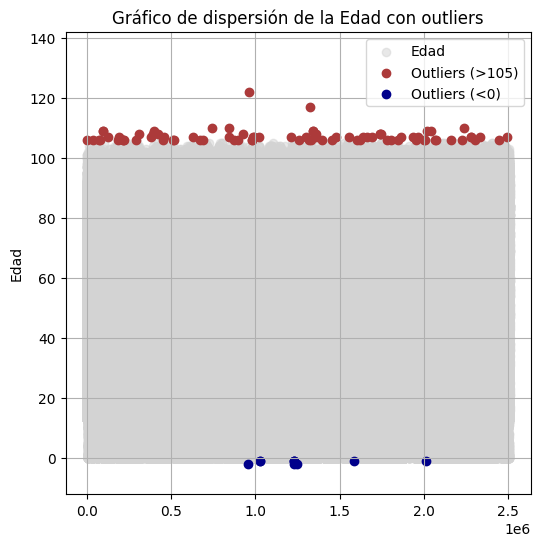

In [23]:
# TRATAMIENTO DE OUTLIERS

# Contamos filas con valores menores que 0.
edad_menor_0 = len(urgencias_df[urgencias_df['Edad'] < 0])
# Contamos filas con valores mayores que 105.
edad_mayor_105 = len(urgencias_df[urgencias_df['Edad'] > 105])

print("Cantidad de filas con valores menores que 0 :", edad_menor_0)
print("Cantidad de filas con valores mayores que 105 :", edad_mayor_105)

# Gráfico
plt.figure(figsize=(6, 6))
plt.scatter(urgencias_df.index, urgencias_df['Edad'], color='lightgray', alpha=0.5, label='Edad')
plt.scatter(urgencias_df[urgencias_df['Edad'] > 105].index, urgencias_df.loc[urgencias_df['Edad'] > 105, 'Edad'], color='#ac3a3a', label='Outliers (>105)')
plt.scatter(urgencias_df[urgencias_df['Edad'] < 0].index, urgencias_df.loc[urgencias_df['Edad'] < 0, 'Edad'], color='darkblue',label='Outliers (<0)')

plt.title('Gráfico de dispersión de la Edad con outliers')
plt.xlabel('')
plt.ylabel('Edad')
plt.legend()
plt.grid(True)
plt.ylim(bottom=urgencias_df['Edad'].min()-10, top=urgencias_df['Edad'].max() + 20)

plt.show()

In [24]:
# TRATAMIENTO DE VALORES NULOS

urgencias_df = urgencias_df.dropna(subset=['Edad'])
# Conversión a tipo número entero.
urgencias_df['Edad'] = urgencias_df['Edad'].astype(int)
# Eliminación de Outliers
urgencias_df = urgencias_df[(urgencias_df['Edad'] >= 0) & (urgencias_df['Edad'] <= 105)]
# Creación de columna grupo_etario
bins = [0, 11, 18, 30, 60, float('inf')]
labels = ['Niños', 'Adolescentes', 'Jóvenes', 'Adultos', 'Tercera Edad']
urgencias_df['grupo_etario'] = pd.cut(urgencias_df['Edad'], bins=bins, labels=labels, right=False)

<ipython-input-24-6cf283093b6b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  urgencias_df['Edad'] = urgencias_df['Edad'].astype(int)


In [25]:
# VALIDACION DE CAMBIOS

print('- Tamaño del DF:', urgencias_df.shape)
print('- Cantidad de Nans:', urgencias_df['Edad'].isna().sum())
print('- Valor Máximo y Mínimo: Max:',urgencias_df['Edad'].max(),'Min:', urgencias_df['Edad'].min())
print('- Valores únicos grupo_etario:', urgencias_df['grupo_etario'].unique(),'\n')
urgencias_df.head()

- Tamaño del DF: (2503239, 16)
- Cantidad de Nans: 0
- Valor Máximo y Mínimo: Max: 105 Min: 0
- Valores únicos grupo_etario: ['Tercera Edad', 'Adultos', 'Adolescentes', 'Jóvenes', 'Niños']
Categories (5, object): ['Niños' < 'Adolescentes' < 'Jóvenes' < 'Adultos' < 'Tercera Edad'] 



,Fecha de atención,Día de la semana,Hora,Nivel de triaje,Zona Básica de Salud,Ámbito de procedencia,Hospital,Área,Provincia,Edad,Sexo,Mes,Año,Turnos,HRxTurno,grupo_etario
0,2023-12-13,Mié,1900-01-01 13:43:00,5,Z.B.S. Olmedo,Rural,H. Medina del Campo,Valladolid Este,Valladolid,74,Hombre,Dic,2023,Mañana,7,Tercera Edad
1,2023-12-12,Mar,1900-01-01 14:27:00,4,Z.B.S. Olmedo,Rural,H. Medina del Campo,Valladolid Este,Valladolid,75,Mujer,Dic,2023,Mañana,7,Tercera Edad
2,2023-12-12,Mar,1900-01-01 11:10:00,2,Z.B.S. Olmedo,Rural,H. Medina del Campo,Valladolid Este,Valladolid,58,Mujer,Dic,2023,Mañana,7,Adultos
3,2023-12-10,Dom,1900-01-01 19:47:00,3,Z.B.S. Olmedo,Rural,H. Medina del Campo,Valladolid Este,Valladolid,59,Mujer,Dic,2023,Tarde,7,Adultos
4,2023-12-11,Lun,1900-01-01 23:20:00,3,Z.B.S. Olmedo,Rural,H. Medina del Campo,Valladolid Este,Valladolid,59,Mujer,Dic,2023,Noche,10,Adultos


####**COLUMNA "Sexo":**

 - Se eliminan Nans (correspondían a los mismos existentes en Edad limpiándose automáticamente los Nans de ésta columna)

In [26]:
# VALIDACIÓN DE CAMBIOS

print('- Tamaño del DF:', urgencias_df.shape)
print('- Cantidad de Nans:', urgencias_df['Sexo'].isna().sum())
print('- Valores únicos Sexo:', urgencias_df['Sexo'].unique())

- Tamaño del DF: (2503239, 16)
- Cantidad de Nans: 0
- Valores únicos Sexo: ['Hombre' 'Mujer']


####**ADICIONALES:**

- Se utilizan nuevos datasets con información relevante de población que será util para contrastar información en el avance del análisis.La información se ha obtenido de una fuente oficial de la Junta de Castilla y León.

 https://conocecastillayleon.jcyl.es/web/es/geografia-poblacion/poblacion.html.

 https://estadistica.jcyl.es/web/es/estadisticas-temas/cifras-oficiales-poblacion.html

In [27]:
# INFORMACIÓN COMPLEMENTARIA

# Cargamos los archivos creando un DF para cada año
poblacion_2021_df = pd.read_excel('COP+01-01-2022.xlsx', sheet_name='T4', skiprows=10, nrows=9, usecols="B:F")
poblacion_2022_df = pd.read_excel('COP+01-01-2023.xlsx', sheet_name='T4', skiprows=10, nrows=9, usecols="B:F")

In [28]:
poblacion_2021_df.head(3)

,Unnamed: 1,Unnamed: 2,Hombre,Mujer,Total
0,Ávila,158421,79442,78698,158140
1,Burgos,356055,177479,177566,355045
2,León,451706,217715,230464,448179


In [29]:
poblacion_2022_df.head(3)

,Unnamed: 1,Unnamed: 2,Hombre,Mujer,Total
0,Ávila,158140,79551,78856,158407
1,Burgos,355045,178376,178804,357180
2,León,448179,217348,230115,447463


In [30]:
poblacion_2021_df.rename(columns={'Unnamed: 1': 'Provincia'}, inplace=True)
poblacion_2022_df.rename(columns={'Unnamed: 1': 'Provincia'}, inplace=True)
poblacion_2021_df.rename(columns={'Unnamed: 2': 'Año_Anterior'}, inplace=True)
poblacion_2022_df.rename(columns={'Unnamed: 2': 'Año_Anterior'}, inplace=True)

In [31]:
print(poblacion_2021_df.columns)
print(poblacion_2022_df.columns)

Index(['Provincia', 'Año_Anterior', 'Hombre', 'Mujer', 'Total'], dtype='object')
Index(['Provincia', 'Año_Anterior', 'Hombre', 'Mujer', 'Total'], dtype='object')


####**REVISIÓN DE DATAFRAME DESPUES DE LOS CAMBIOS:**

In [32]:
# VALIDACIÓN DE CAMBIOS EN DATASET COMPLETO
analisis_final = analisis_descriptivo(urgencias_df)

analisis_final

,Tipo de Dato,Tipo de Variable,Valores Únicos,Valores Nulos,mean,50%,Moda,std,min,max,25%,75%
Fecha de atención,datetime64[ns],Categórica,1095,0,2022-05-28 08:16:07.359807488,2022-05-22 00:00:00,2022-05-23 00:00:00,NaN,2021-01-01 00:00:00,2023-12-31 00:00:00,2021-09-29 00:00:00,2022-12-19 00:00:00
Día de la semana,object,Categórica,7,0,NaN,NaN,Lun,NaN,NaN,NaN,NaN,NaN
Hora,datetime64[ns],Categórica,1440,0,1900-01-01 14:16:39.008739840,1900-01-01 15:37:00,1900-01-01 18:00:00,NaN,1900-01-01 00:00:00,1900-01-01 23:59:00,1900-01-01 10:50:00,1900-01-01 19:36:00
Nivel de triaje,category,Categórica,5,0,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN
Zona Básica de Salud,object,Categórica,247,0,NaN,NaN,Z.B.S. Delicias II,NaN,NaN,NaN,NaN,NaN
Ámbito de procedencia,object,Categórica,2,0,NaN,NaN,Urbano,NaN,NaN,NaN,NaN,NaN
Hospital,object,Categórica,14,0,NaN,NaN,C.A.U. León,NaN,NaN,NaN,NaN,NaN
Área,object,Categórica,11,0,NaN,NaN,Burgos,NaN,NaN,NaN,NaN,NaN
Provincia,object,Categórica,9,0,NaN,NaN,Valladolid,NaN,NaN,NaN,NaN,NaN
Edad,int64,Numérica,106,0,50.238097,52.0,0,27.318482,0.0,105.0,29.0,74.0


In [33]:
urgencias_df.shape

(2503239, 16)

##**2. ANÁLISIS AVANZADO**

####**2.1.  Análisis Temporal y Estacional**
  - Análisis por Año y Mes:
    - Examina la distribución de las atenciones a lo largo de los años. ¿Ha habido algún cambio significativo en el volumen de atenciones?

  - Analiza la variación mensual.
    - ¿Existen meses con picos de demanda? ¿Puedes identificar alguna estacionalidad?


#####**Pre-Análisis de la serie**

In [34]:
# Se crean series temporales periódicas
urgencias_diarias = urgencias_df.resample('D', on='Fecha de atención').size()
urgencias_semanales = urgencias_df.resample('W', on='Fecha de atención').size()/1000
urgencias_mensuales = urgencias_df.resample('M', on='Fecha de atención').size()/1000
urgencias_anuales = urgencias_df.resample('A', on='Fecha de atención').size()/1000

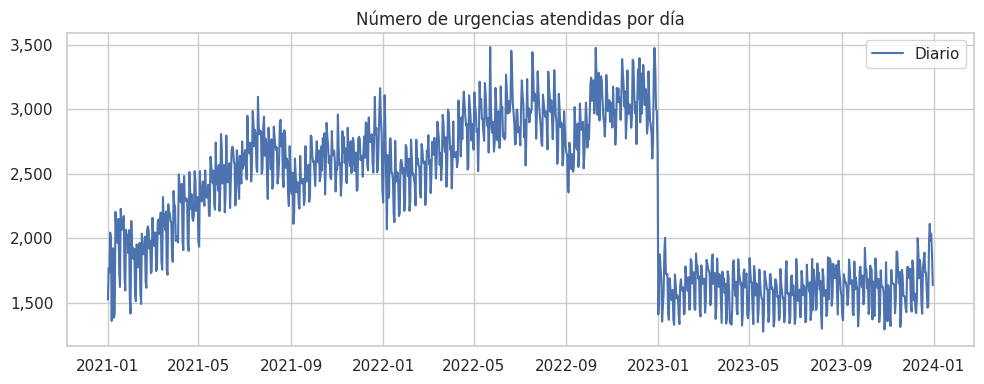

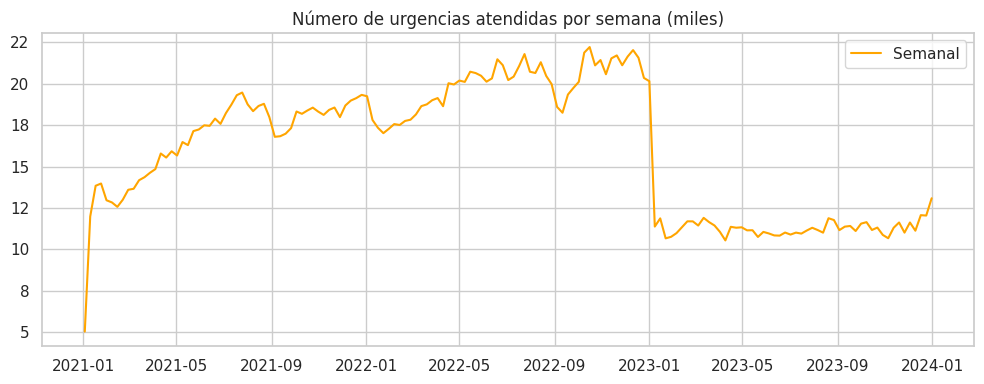

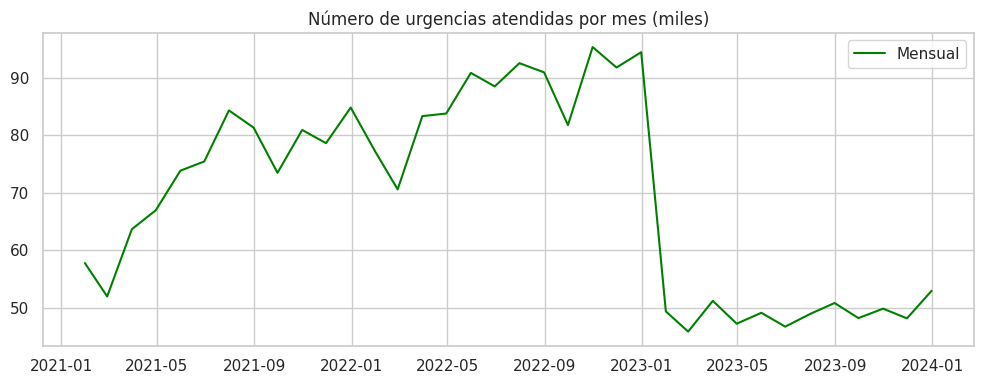

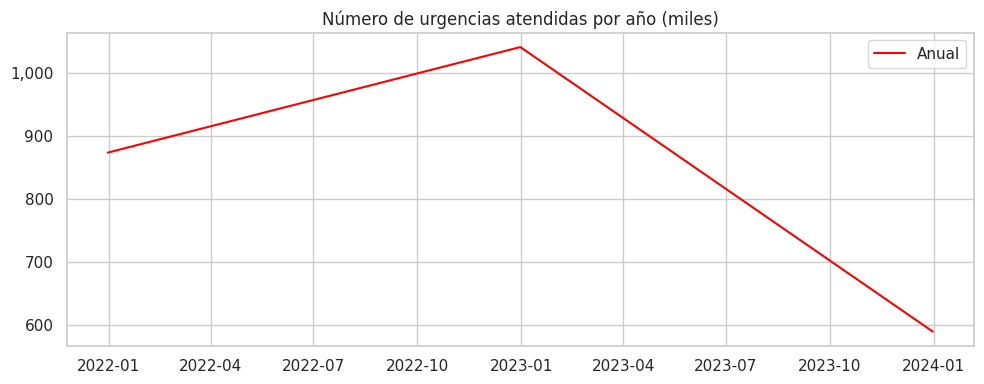

In [35]:
from matplotlib.ticker import FuncFormatter

# Configuración general de los gráficos
sns.set(style="whitegrid")

# Gráfico diario
plt.figure(figsize=(10, 4))
plt.plot(urgencias_diarias, label='Diario')
plt.title('Número de urgencias atendidas por día')
plt.xlabel('')
plt.ylabel('')
plt.legend()

# Formatear eje y en miles
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Mostrar todas las etiquetas del eje x
plt.xticks(rotation='horizontal')
plt.tight_layout()
plt.show()

# Gráfico semanal
plt.figure(figsize=(10, 4))
plt.plot(urgencias_semanales, label='Semanal', color='orange')
plt.title('Número de urgencias atendidas por semana (miles)')
plt.xlabel('')
plt.ylabel('')
plt.legend()

# Formatear eje y en miles
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Mostrar todas las etiquetas del eje x y rotarlas verticalmente si es necesario
plt.xticks(rotation='horizontal')
plt.tight_layout()
plt.show()

# Gráfico mensual
plt.figure(figsize=(10, 4))
plt.plot(urgencias_mensuales, label='Mensual', color='green')
plt.title('Número de urgencias atendidas por mes (miles)')
plt.xlabel('')
plt.ylabel('')
plt.legend()


# Formatear eje y en miles
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Mostrar todas las etiquetas del eje x y rotarlas verticalmente si es necesario
plt.xticks(rotation='horizontal')
plt.tight_layout()
plt.show()

# Gráfico anual
plt.figure(figsize=(10, 4))
plt.plot(urgencias_anuales, label='Anual', color='red')
plt.title('Número de urgencias atendidas por año (miles)')
plt.xlabel('')
plt.ylabel('')
plt.legend()

# Formatear eje y en miles
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Mostrar todas las etiquetas del eje x y rotarlas verticalmente
plt.xticks(rotation='horizontal')
plt.tight_layout()
plt.show()

In [36]:
# VISUALIZAMOS CONTEO DE DATOS TOTALES INTRODUCIDOS POR HOSPITAL PARA LOS DIFERENTES AÑOS

# Contamos los registros por hospital y año
conteo_por_hospital_y_año = urgencias_df.groupby(['Hospital', 'Año']).size().unstack(fill_value=0)

# Calculamos el total por año
conteo_por_hospital_y_año['Total'] = conteo_por_hospital_y_año.sum(axis=1)

# Calculamos las diferencias entre años por hospital
diferencia_2022_2021 = conteo_por_hospital_y_año[2022] - conteo_por_hospital_y_año[2021]
diferencia_2023_2022 = conteo_por_hospital_y_año[2023] - conteo_por_hospital_y_año[2022]

# Agregamos las diferencias como columnas adicionales
conteo_por_hospital_y_año['Diferencia 2022-2021'] = diferencia_2022_2021
conteo_por_hospital_y_año['Diferencia 2023-2022'] = diferencia_2023_2022

# Calculamos el total de diferencias por año
total_diferencia_2022_2021 = diferencia_2022_2021.sum()
total_diferencia_2023_2022 = diferencia_2023_2022.sum()

# Agregamos los totales de diferencias como una fila adicional
conteo_por_hospital_y_año.loc['Total Diferencias'] = [0] * len(conteo_por_hospital_y_año.columns)
conteo_por_hospital_y_año.loc['Total Diferencias', 'Diferencia 2022-2021'] = total_diferencia_2022_2021
conteo_por_hospital_y_año.loc['Total Diferencias', 'Diferencia 2023-2022'] = total_diferencia_2023_2022

# Mostramos la tabla de conteo por hospital y año con diferencias y totales
conteo_por_hospital_y_año

Año,2021,2022,2023,Total,Diferencia 2022-2021,Diferencia 2023-2022
Hospital,,,,,,
C.A. Segovia,46650,56339,28548,131537,9689,-27791
C.A. Soria,29742,34078,27992,91812,4336,-6086
C.A. Zamora,59400,74225,29361,162986,14825,-44864
C.A. Ávila,39152,47580,41346,128078,8428,-6234
C.A.U. Burgos,112418,131068,109566,353052,18650,-21502
C.A.U. León,110036,132643,113724,356403,22607,-18919
C.A.U. Palencia,43614,49144,42688,135446,5530,-6456
C.A.U. Salamanca,125784,146714,3407,275905,20930,-143307
H. El Bierzo,44460,52360,47713,144533,7900,-4647


**<font color="blue"> Del análisis de datos para 2023 se desprende que ese año se han introducido más de 450k datos menos, por lo que se eliminar el año 2023 del estudio ya que se le atribuye que la actualización de datos completa no está realizada todavía.
Dado lo anterior, en adelante se resuelve trabajar sólo con los años 2021 y 2022.**

In [37]:
# SE DEFINE EL DF DEFINITIVO

# Filtramos el DataFrame para excluir los datos del año 2023
nuevo_df = urgencias_df[urgencias_df['Año'] != 2023]
nuevo_df.to_csv('nuevo_df.csv', index=False)

In [38]:
nuevo_df.shape

(1914422, 16)

#####**Análisis por Año y Mes**

- Examina la distribución de las atenciones a lo largo de los años. ¿Ha habido algún cambio significativo en el volumen de atenciones?

- Analiza la variación mensual. ¿Existen meses con picos de demanda? ¿Puedes identificar alguna estacionalidad?


<ipython-input-39-8d9a89800f01>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuevo_df['Fecha de atención'] = pd.to_datetime(nuevo_df['Fecha de atención'])


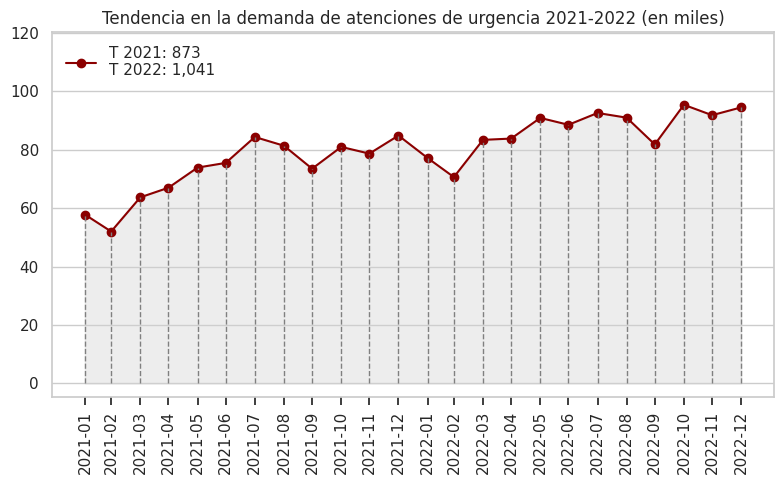

In [39]:
import matplotlib.dates as mdates

# se verifica que las fechas se encuentren en formato date time
nuevo_df['Fecha de atención'] = pd.to_datetime(nuevo_df['Fecha de atención'])

# Se obtiene la distribución de las fechas de atención
urgencias_mes = nuevo_df.groupby(pd.Grouper(key='Fecha de atención', freq='M')).size()

# Se calculan totales por año.
total_2021 = urgencias_mes['2021'].sum()
total_2022 = urgencias_mes['2022'].sum()

# Creación y ajustes de gráficos
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(urgencias_mes.index, urgencias_mes.values, marker='o', linestyle='-', color='darkred')
ax.set_title('Tendencia en la demanda de atenciones de urgencia 2021-2022 (en miles)')
ax.set_ylabel('')
ax.xaxis.grid(False)
ax.yaxis.grid(True)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.tick_params(axis='x', which='major', bottom=True, labelbottom=True, rotation=90)
ax.set_xticks(urgencias_mes.index)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x * 1e-3)))
ax.fill_between(urgencias_mes.index, urgencias_mes.values, color='lightgray', alpha=0.4)
for fecha, valor in zip(urgencias_mes.index, urgencias_mes.values):
    ax.vlines(fecha, ymin=0, ymax=valor, colors='gray', linestyles='dashed', linewidth=1)
ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1] * 1.2)

total_text = f'T 2021: {total_2021 / 1e3:,.0f}\nT 2022: {total_2022 / 1e3:,.0f}'
ax.legend([total_text], loc='upper left', frameon=False)

# visualización
plt.tight_layout()
plt.show()

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

# Asegúrate de que 'nuevo_df' contiene la columna 'Fecha de atención'
nuevo_df['Fecha de atención'] = pd.to_datetime(nuevo_df['Fecha de atención'])

# Obtener la distribución de las fechas de atención por mes
urgencias_mes = nuevo_df.groupby(pd.Grouper(key='Fecha de atención', freq='M')).size()

# Crear DataFrame con las atenciones por año y mes
df_urgencias = urgencias_mes.reset_index()
df_urgencias.columns = ['Fecha de atención', 'Atenciones']
df_urgencias['Año'] = df_urgencias['Fecha de atención'].dt.year
df_urgencias['Mes'] = df_urgencias['Fecha de atención'].dt.month

# Pivotear los datos para tener columnas separadas para 2021 y 2022
df_pivot = df_urgencias.pivot(index='Mes', columns='Año', values='Atenciones').fillna(0)
df_pivot.columns = ['Total_2021', 'Total_2022']

# Calcular la diferencia y la variación porcentual
df_pivot['Diferencia'] = df_pivot['Total_2022'] - df_pivot['Total_2021']
df_pivot['Variacion_%'] = (df_pivot['Diferencia'] / df_pivot['Total_2021']) * 100

# Mostrar la tabla resultante
print(df_pivot)

<ipython-input-40-6904ad1e8276>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuevo_df['Fecha de atención'] = pd.to_datetime(nuevo_df['Fecha de atención'])


     Total_2021  Total_2022  Diferencia  Variacion_%
Mes                                                 
1         57797       77140       19343    33.467135
2         51994       70608       18614    35.800285
3         63687       83345       19658    30.866582
4         66972       83788       16816    25.109001
5         73862       90855       16993    23.006417
6         75463       88503       13040    17.279992
7         84329       92544        8215     9.741607
8         81340       90941        9601    11.803541
9         73484       81778        8294    11.286811
10        80936       95343       14407    17.800484
11        78641       91790       13149    16.720286
12        84829       94453        9624    11.345177


**<font color="blue"> En los datos podemos observar una tendencia creciente a través de los años**

In [41]:
# ANALISIS MENSUAL

# Se crean 2 DF por año
Año_2021 = nuevo_df[nuevo_df['Año'] == 2021]
Año_2022 = nuevo_df[nuevo_df['Año'] == 2022]

In [42]:
# Urgencias por Mes (en miles)
Mes_2021 = (Año_2021.groupby('Mes').size()/1000)
Mes_2022 = (Año_2022.groupby('Mes').size()/1000)

# Calcular el promedio de atenciones entre 2021 y 2022 por mes
AVG_Mes = (Mes_2021 + Mes_2022) / 2

# Se ordenan los resultados por mes
orden_meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sept', 'Oct', 'Nov', 'Dic']
Mes_2021 = Mes_2021.reindex(orden_meses)
Mes_2022 = Mes_2022.reindex(orden_meses)
AVG_Mes = AVG_Mes.reindex(orden_meses)

# Calculamos los totales por año
total_2021_Mes = '{:,.0f}'.format(Mes_2021.sum())
total_2022_Mes = '{:,.0f}'.format(Mes_2022.sum())
total_AVG_Mes = '{:,.0f}'.format(AVG_Mes.sum())

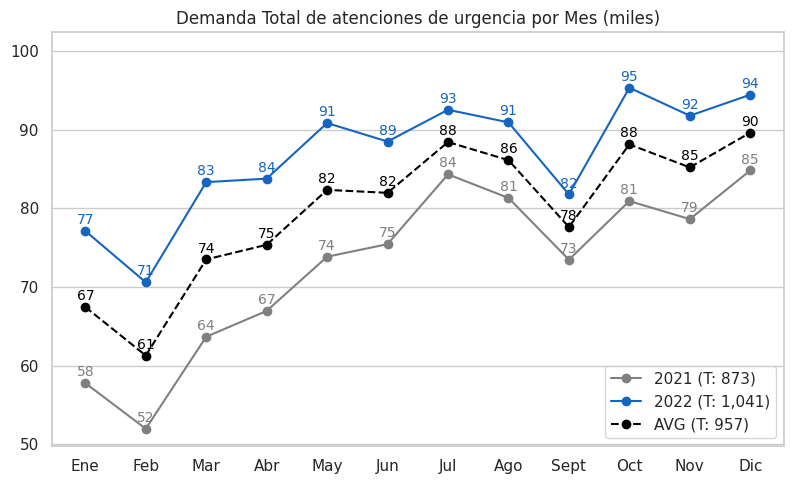

In [43]:
# Se crea el gráfico
plt.figure(figsize=(8, 5))
plt.plot(Mes_2021.index, Mes_2021.values, marker='o', linestyle='-', color='gray', label=f'2021 (T: {total_2021_Mes})')
plt.plot(Mes_2022.index, Mes_2022.values, marker='o', linestyle='-', color='#1565C0', label=f'2022 (T: {total_2022_Mes})')
plt.plot(AVG_Mes.index, AVG_Mes.values, marker='o', linestyle='--', color='black', label=f'AVG (T: {total_AVG_Mes})')

# Agregamos etiquetas a los puntos del gráfico formateando como números enteros con separador de miles
for i, value in enumerate(Mes_2021.values):
    plt.annotate('{:,.0f}'.format(value), (Mes_2021.index[i], value), textcoords="offset points", xytext=(0,5), ha='center', fontsize=10, color='gray')

for i, value in enumerate(Mes_2022.values):
    plt.annotate('{:,.0f}'.format(value), (Mes_2022.index[i], value), textcoords="offset points", xytext=(0,5), ha='center', fontsize=10, color='#1565C0')

for i, value in enumerate(AVG_Mes.values):
    plt.annotate('{:,.0f}'.format(value), (AVG_Mes.index[i], value), textcoords="offset points", xytext=(0,5), ha='center', fontsize=10, color='black')

plt.title('Demanda Total de atenciones de urgencia por Mes (miles)', fontsize=12)
plt.xlabel('', fontsize=12)
plt.ylabel('', fontsize=12)
plt.legend(loc='lower right', fontsize=11)
plt.gca().xaxis.grid(False)
plt.gca().yaxis.grid(True)
plt.tight_layout()

# Incrementamos el límite del eje y en un %
ax = plt.gca()
ylim = ax.get_ylim()
ax.set_ylim(ylim[0], ylim[1] * 1.05)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.show()

**<Font color='blue'>Cuando miramos los datos a nivel mensual, podemos observar que existe cierta estacionalidad en la demanda de atenciones de urgencia, siendo los meses de Mayo, Julio, Octubre y Diciembre aquellos donde se observan incrementos alzas, estas alzas guardan estrecha relación con el cambio de clima en Mayo, el aumento del turismo en Julio, el cambio de clma en Octubre y el periodo de Navidad en Diciembre**

#####**Análisis por Día de la Semana y Hora**

- Observa si hay diferencias en la demanda según el día de la semana y la hora del día. ¿Los fines de semana tienen una demanda diferente a la de los días laborales? ¿Hay horas del día con más afluencia de pacientes?


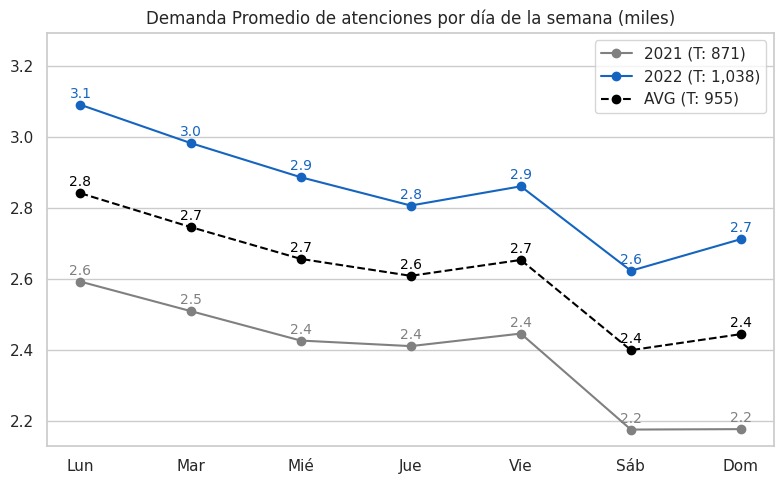

In [44]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Urgencias por Día
Día_2021 = Año_2021.groupby('Día de la semana').size()
Día_2022 = Año_2022.groupby('Día de la semana').size()

# Fechas únicas por cada día de la semana.
Días_unicos_2021 = Año_2021.groupby('Día de la semana')['Fecha de atención'].nunique()
Días_unicos_2022 = Año_2022.groupby('Día de la semana')['Fecha de atención'].nunique()

# Calculamos el promedio de atenciones por día de la semana (son 52 días en el año de cada día)
AVG_Día_2021 = (Día_2021 / Días_unicos_2021)/1000
AVG_Día_2022 = (Día_2022 / Días_unicos_2022)/1000

# Se ordenan los resultados por día
orden_dias = ['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom']
AVG_Día_2021 = AVG_Día_2021.reindex(orden_dias)
AVG_Día_2022 = AVG_Día_2022.reindex(orden_dias)

# Promedio de atenciones por mes (2021-2022)
AVG_Día = (AVG_Día_2021 + AVG_Día_2022) / 2

# Calculamos totales anuales formateados
total_2021_valid = '{:,.0f}'.format(AVG_Día_2021.sum() * 52)
total_2022_valid = '{:,.0f}'.format(AVG_Día_2022.sum() * 52)
total_AVG_valid = '{:,.0f}'.format(AVG_Día.sum() * 52)

# Se crea el gráfico
plt.figure(figsize=(8, 5))
plt.plot(AVG_Día_2021.index, AVG_Día_2021.values, marker='o', linestyle='-', color='gray', label=f'2021 (T: {total_2021_valid})')
plt.plot(AVG_Día_2022.index, AVG_Día_2022.values, marker='o', linestyle='-', color='#1565C0', label=f'2022 (T: {total_2022_valid})')
plt.plot(AVG_Día.index, AVG_Día.values, marker='o', linestyle='--', color='black', label=f'AVG (T: {total_AVG_valid})')

# Agregamos etiquetas a los puntos del gráfico formateando como números enteros con separador de miles
for i, value in enumerate(AVG_Día_2021.values):
    plt.annotate('{:,.1f}'.format(value), (AVG_Día_2021.index[i], value), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=10, color='gray')

for i, value in enumerate(AVG_Día_2022.values):
    plt.annotate('{:,.1f}'.format(value), (AVG_Día_2022.index[i], value), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=10, color='#1565C0')

for i, value in enumerate(AVG_Día.values):
    plt.annotate('{:,.1f}'.format(value), (AVG_Día.index[i], value), textcoords="offset points", xytext=(0,5), ha='center', fontsize=10, color='black')

plt.title('Demanda Promedio de atenciones por día de la semana (miles)', fontsize=12)
plt.xlabel('', fontsize=12)
plt.ylabel('', fontsize=12)
plt.legend()
plt.gca().xaxis.grid(False)
plt.gca().yaxis.grid(True)
plt.tight_layout()

# Incrementamos el límite del eje y en un 20%
ax = plt.gca()
ylim = ax.get_ylim()
ax.set_ylim(ylim[0], ylim[1] * 1.05)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.1f}'.format(x)))

plt.show()

In [45]:
# PROMEDIO EN DIAS LABORALES Y NO LABORALES

dias_laborales = ['Lun', 'Mar', 'Mié', 'Jue', 'Vie']
fines_semana = ['Sáb', 'Dom']

for year in [2021, 2022]:
    data = globals()[f'AVG_Día_{year}']
    promedio_laborales = data[dias_laborales].mean()
    promedio_fines = data[fines_semana].mean()

    print(f'Promedio días laborales {year}: {promedio_laborales:.1f}K')
    print(f'Promedio fines de semana {year}: {promedio_fines:.1f}K')

Promedio días laborales 2021: 2.5K
Promedio fines de semana 2021: 2.2K
Promedio días laborales 2022: 2.9K
Promedio fines de semana 2022: 2.7K


**<Font color='blue'>Según se observa en el gráfico, la mayoría de urgencias atendidas tanto en 2021 como en 2022 ocurrieron los días lunes. Estas cifras disminuyen progresivamente durante la semana hasta el jueves, experimentando un leve aumento los viernes, con un promedio de 2500 y 2900 atenciones diarias respectivamente en días laborables. Los sábados muestran un aumento notable, seguido de un ligero incremento los domingos, con un promedio cercano a 2200 y 2700 atenciones respectivamente en días no laborables. Es notable que en 2022 se observa un incremento mayor en días no laborables en comparación con los laborables.**

In [46]:
# Urgencias por Día y Turno
Día_Turno_2021 = Año_2021.groupby(['Día de la semana', 'Turnos']).size()
Día_Turno_2022 = Año_2022.groupby(['Día de la semana', 'Turnos']).size()

# Pomedio de atenciones por día de la semana en cada turno (son 52 días en el año de cada día)
AVG_Día_Turno_2021 = Día_Turno_2021/Días_unicos_2021
AVG_Día_Turno_2022 = Día_Turno_2022/Días_unicos_2022

# Promedio de atenciones por hora para 2021
TurnoxHR_2021 = AVG_Día_Turno_2021.copy()
for index, value in AVG_Día_Turno_2021.items():
    dia, turno = index
    if turno in horas_turno:
        TurnoxHR_2021[index] = value / horas_turno[turno]

# Promedio de atenciones por hora para 2022
TurnoxHR_2022 = AVG_Día_Turno_2022.copy()
for index, value in AVG_Día_Turno_2022.items():
    dia, turno = index
    if turno in horas_turno:
        TurnoxHR_2022[index] = value / horas_turno[turno]

In [47]:
TurnoxHR_2021_df = TurnoxHR_2021.reset_index(name='XHR')
TurnoxHR_2022_df = TurnoxHR_2022.reset_index(name='XHR')
AVG_Día_2021_df = AVG_Día_2021.reset_index(name='xdia')
AVG_Día_2022_df = AVG_Día_2022.reset_index(name='xdia')

In [48]:
TurnoxHR_2021_df.groupby('Turnos')['XHR'].mean()

Turnos
Mañana     98.685458
Noche      66.455215
Tarde     148.170715
Name: XHR, dtype: float64

In [49]:
TurnoxHR_2022_df.groupby('Turnos')['XHR'].mean()

Turnos
Mañana    116.613385
Noche      83.067650
Tarde     172.278909
Name: XHR, dtype: float64

In [50]:
# Ordenamos los DF según el día de la semana
TurnoxHR_2021_df['Día de la semana'] = pd.Categorical(TurnoxHR_2021_df['Día de la semana'], categories=orden_dias, ordered=True)
TurnoxHR_2021_df = TurnoxHR_2021_df.sort_values(by='Día de la semana')
TurnoxHR_2022_df['Día de la semana'] = pd.Categorical(TurnoxHR_2022_df['Día de la semana'], categories=orden_dias, ordered=True)
TurnoxHR_2022_df = TurnoxHR_2022_df.sort_values(by='Día de la semana')

In [51]:
# Calculamos las atenciones x hora en cada día de la semana
DíaxHR_2021_df = TurnoxHR_2021_df.groupby('Día de la semana')['XHR'].mean().reset_index()
DíaxHR_2022_df = TurnoxHR_2022_df.groupby('Día de la semana')['XHR'].mean().reset_index()

In [52]:
Media2021 = DíaxHR_2021_df.groupby('Día de la semana')['XHR'].mean()
Media2021_sem = Media2021.mean()
Media2021_sem

104.43712913322078

In [53]:
Media2022 = DíaxHR_2022_df.groupby('Día de la semana')['XHR'].mean()
Media2022_sem = Media2022.mean()
Media2022_sem

123.98664805544858

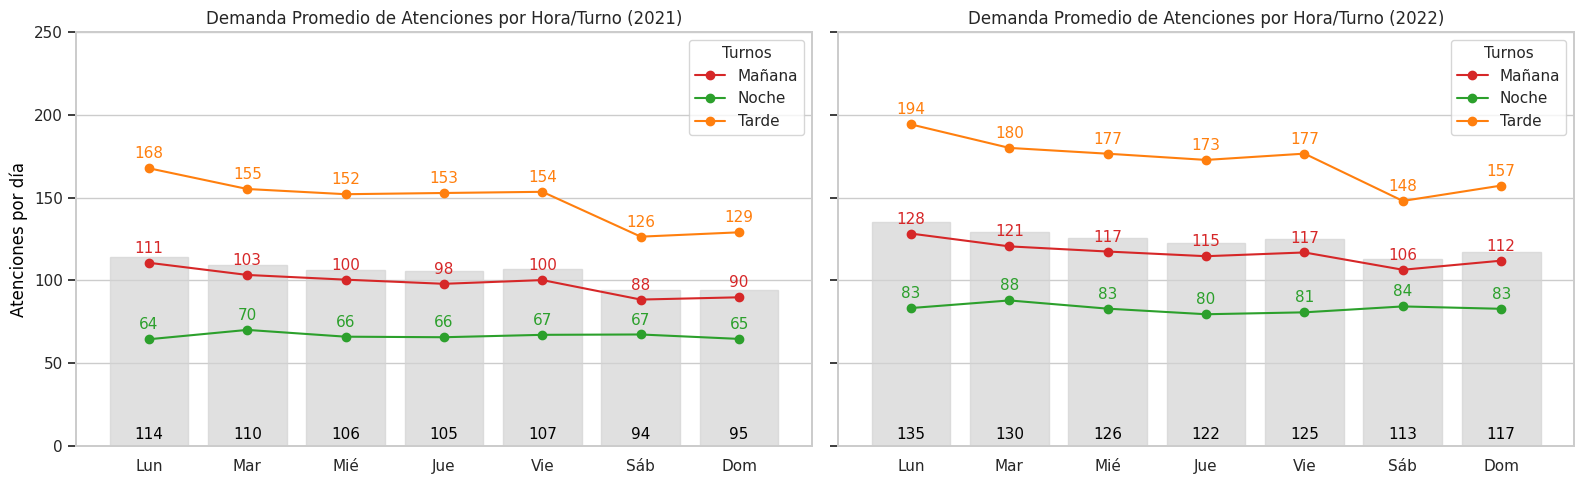

In [54]:
# Se crean los gráficos
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(16, 5))
bars1 = ax1.bar(DíaxHR_2021_df['Día de la semana'], DíaxHR_2021_df['XHR'], color='lightgray', edgecolor='lightgray', linewidth=1.0, label='xdia', alpha=0.7)

# Configuración de Gráficos
ax1.set_xlabel('')
ax1.set_ylabel('Atenciones por día', color='black')
ax1.set_title('Demanda Promedio de Atenciones por Hora/Turno (2021)')
ax1.tick_params(axis='x', labelsize=11, labelrotation=0)
ax1.xaxis.grid(False)
ax1.yaxis.grid(True)
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Agregamos etiquetas de los valores con separador de miles en la base de las barras (2021)
for bar in bars1:
    yval = bar.get_height()
    ax1.annotate(format(yval, ',.0f'),
                 xy=(bar.get_x() + bar.get_width() / 2, 0),  # Posición de la etiqueta (centro de la base de la barra)
                 xytext=(0, 3),  # Desplazamiento del texto (horizontal, vertical)
                 textcoords="offset points",
                 ha='center', va='bottom',  # Alineación horizontal y vertical del texto
                 fontsize=11, color='black')

# Creamos un segundo eje Y para los valores de XHR (2021)
ax2 = ax1.twinx()
ax2.set_ylabel('', color='black')

# Graficamos los valores de XHR para cada turno (2021)
turnos = TurnoxHR_2021_df['Turnos'].unique()
colors = ['tab:red', 'tab:green', 'tab:orange']

for turno, color in zip(turnos, colors):
    turno_data = TurnoxHR_2021_df[TurnoxHR_2021_df['Turnos'] == turno]
    ax2.plot(turno_data['Día de la semana'], turno_data['XHR'], label=turno, color=color, marker='o')

    for i, xhr_value in enumerate(turno_data['XHR']):
        ax2.annotate(format(xhr_value, ',.0f'),
                     (turno_data['Día de la semana'].iloc[i], xhr_value),
                     xytext=(0, 5),
                     textcoords='offset points',
                     ha='center', va='bottom',
                     color=color, fontsize=11)

# Leyenda fuera del gráfico
ax2.legend(loc='upper right', bbox_to_anchor=(1, 1), title='Turnos', fontsize=11, title_fontsize=11)

# Formateo de valores
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Ajuste de límites de los ejes.
ax1.set_ylim(0, 250)
ax2.set_ylim(0, 250)
ax1_ylim = ax1.get_ylim()
ax1.set_ylim(ax1_ylim[0], ax1_ylim[1] * 1)
ax2_ylim = ax2.get_ylim()
ax2.set_ylim(ax2_ylim[0], ax2_ylim[1] * 1)

# Ocultamos los ticks del eje y (2021)
ax2.yaxis.set_ticks([])

# Graficamos las barras para 2022 en el segundo subplot (ax3)
bars2 = ax3.bar(DíaxHR_2022_df['Día de la semana'], DíaxHR_2022_df['XHR'], color='lightgray', edgecolor='lightgray', linewidth=1.0, label='xdia', alpha=0.7)

# Añadimos etiquetas y título para 2022
ax3.set_xlabel('')
ax3.set_ylabel('', color='black')
ax3.set_title('Demanda Promedio de Atenciones por Hora/Turno (2022)')
ax3.tick_params(axis='x', labelsize=11, labelrotation=0)
ax3.xaxis.grid(False)
ax3.yaxis.grid(True)
ax3.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

for bar in bars2:
    yval = bar.get_height()
    ax3.annotate(format(yval, ',.0f'),
                 xy=(bar.get_x() + bar.get_width() / 2, 0),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom',
                 fontsize=11, color='black')

# Creamos un segundo eje Y para los valores de XHR (2022)
ax4 = ax3.twinx()
ax4.set_ylabel('', color='black')

# Graficamos los valores de XHR para cada turno (2022)
turnos = TurnoxHR_2022_df['Turnos'].unique()
colors = ['tab:red', 'tab:green', 'tab:orange']

for turno, color in zip(turnos, colors):
    turno_data = TurnoxHR_2022_df[TurnoxHR_2022_df['Turnos'] == turno]
    ax4.plot(turno_data['Día de la semana'], turno_data['XHR'], label=turno, color=color, marker='o')

    # Agregamos etiquetas de los datos debajo del marcador (2022)
    for i, xhr_value in enumerate(turno_data['XHR']):
        ax4.annotate(format(xhr_value, ',.0f'),
                     (turno_data['Día de la semana'].iloc[i], xhr_value),
                     xytext=(0, 5),
                     textcoords='offset points',
                     ha='center', va='bottom',
                     color=color, fontsize=11)

# Mover la leyenda fuera del gráfico (2022)
ax4.legend(loc='upper right', bbox_to_anchor=(1, 1), title='Turnos', fontsize=11, title_fontsize=11)

# Formateamos los valores del eje Y con separador de miles para el segundo eje (2022)
ax4.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Ajustamos el límite del eje Y para ambos ejes (2022)
ax3.set_ylim(0, 250)
ax4.set_ylim(0, 250)
ax3_ylim = ax3.get_ylim()
ax3.set_ylim(ax3_ylim[0], ax3_ylim[1] * 1)
ax4_ylim = ax4.get_ylim()
ax4.set_ylim(ax4_ylim[0], ax4_ylim[1] * 1)

# Ocultamos los ticks del eje y (2022)
ax4.yaxis.set_ticks([])
#ax3.yaxis.set_ticks([])
ax3.set_yticklabels([])

# Mostramos los gráficos
plt.tight_layout()
plt.show()

**<Font color='blue'> Conforme se observa en los gráficos, en ambos años el turno de la tarde es el que concentra la mayor cantidad de atenciones por hora, seguido por el turno de la mañana, de acuerdo con la estacionalidad diaria. Sin embargo, este patrón no se mantiene en el turno de la noche, donde el día con mayor cantidad de atenciones es el martes.
Por otro lado, es interesante mencionar que los sábados y domingos la cantidad de atenciones por hora en cada turno tiende a converger.**

####**2.2.  Caracterización de la Población Atendida**

#####**Análisis por Edad y Sexo**

- Examina la distribución de las edades de los pacientes atendidos. ¿Existen diferencias por grupos de edad en el tipo de urgencias más comunes?

- Analiza si hay diferencias en la frecuencia de atención entre hombres y mujeres.

In [55]:
# ATENCIONES DE URGENCIA POR EDAD

# Filtramos DF's por Edad
# Calcular el promedio diario por Edad para cada año
AVG_Edad_2021_df = ((Año_2021.groupby(['Edad']).size() / 365)).reset_index(name='xdia')
AVG_Edad_2022_df = ((Año_2022.groupby(['Edad']).size() / 365)).reset_index(name='xdia')

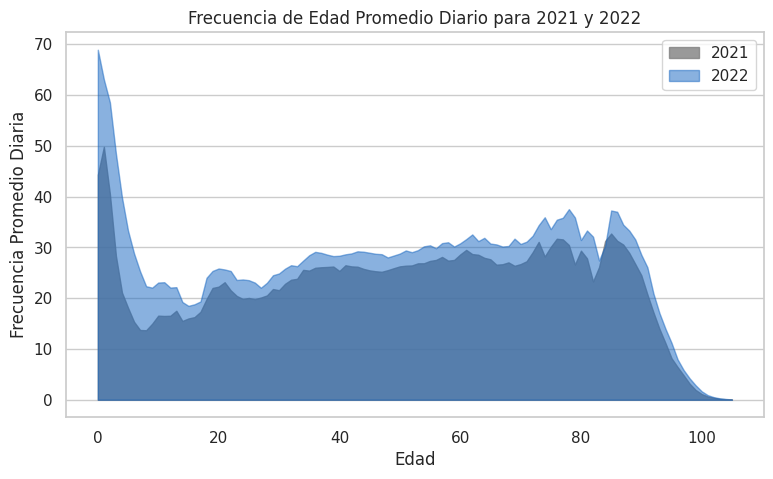

In [56]:
# Crear un rango de edades que abarque ambos años
edades = np.arange(min(AVG_Edad_2021_df['Edad'].min(), AVG_Edad_2022_df['Edad'].min()),
                   max(AVG_Edad_2021_df['Edad'].max(), AVG_Edad_2022_df['Edad'].max()) + 1)

# Asegurarse de que todas las edades estén presentes en los datos y llenar con 0 si no hay datos para alguna edad
frec_edad_2021 = AVG_Edad_2021_df.set_index('Edad').reindex(edades, fill_value=0)['xdia']
frec_edad_2022 = AVG_Edad_2022_df.set_index('Edad').reindex(edades, fill_value=0)['xdia']

# Crear los gráficos de área
plt.figure(figsize=(9, 5))

plt.fill_between(edades, frec_edad_2021, alpha=0.8, color='gray', label='2021')
plt.fill_between(edades, frec_edad_2022, alpha=0.5, color='#1565C0', label='2022')

# Añadir títulos y etiquetas
plt.title('Frecuencia de Edad Promedio Diario para 2021 y 2022')
plt.xlabel('Edad')
plt.ylabel('Frecuencia Promedio Diaria')
plt.legend()
plt.gca().yaxis.grid(True)
plt.gca().xaxis.grid(False)

# Mostrar el gráfico
plt.show()

In [57]:
# 5 Edades con > y < Frecuencia en 2021
print("Menores frecuencias en 2021:")
print(frec_edad_2021.nsmallest(5))
print("\nMayores frecuencias en 2021:")
print(frec_edad_2021.nlargest(5))

# 5 Edades con > y < Frecuencia en 2022
print("\nMenores frecuencias en 2022:")
print(frec_edad_2022.nsmallest(5))
print("\nMayores frecuencias en 2022:")
print(frec_edad_2022.nlargest(5))

Menores frecuencias en 2021:
Edad
105    0.068493
104    0.101370
103    0.194521
102    0.391781
101    0.627397
Name: xdia, dtype: float64

Mayores frecuencias en 2021:
Edad
1     49.813699
0     44.317808
2     40.517808
85    32.734247
76    31.709589
Name: xdia, dtype: float64

Menores frecuencias en 2022:
Edad
105    0.043836
104    0.153425
103    0.273973
102    0.506849
101    0.906849
Name: xdia, dtype: float64

Mayores frecuencias en 2022:
Edad
0    68.928767
1    63.098630
2    58.572603
3    48.443836
4    39.865753
Name: xdia, dtype: float64


**<Font color='blue'>Según se observa en los gráficos, la mayor frecuencia de atenciones de urgencia se concentra en los menores de edad, específicamente en los menores de 1 año. Es importante destacar que hubo un significativo incremento en las atenciones a este grupo durante el año 2022 en comparación con el 2021.
En ambos años, las edades menos recurrentes entre los pacientes son los adultos mayores de 100 años, mientras que los más recurrentes son los niños menores de 4 años de edad.**

In [58]:
# ATENCIONES DE URGENCIA POR SEXO

# Filtramos DF's por sexo
# Calcular el promedio diario por sexo para cada año
AVG_Sexo_2021_df = ((Año_2021.groupby(['Sexo']).size() / 365)).reset_index(name='Avg')
AVG_Sexo_2022_df = ((Año_2022.groupby(['Sexo']).size() / 365)).reset_index(name='Avg')

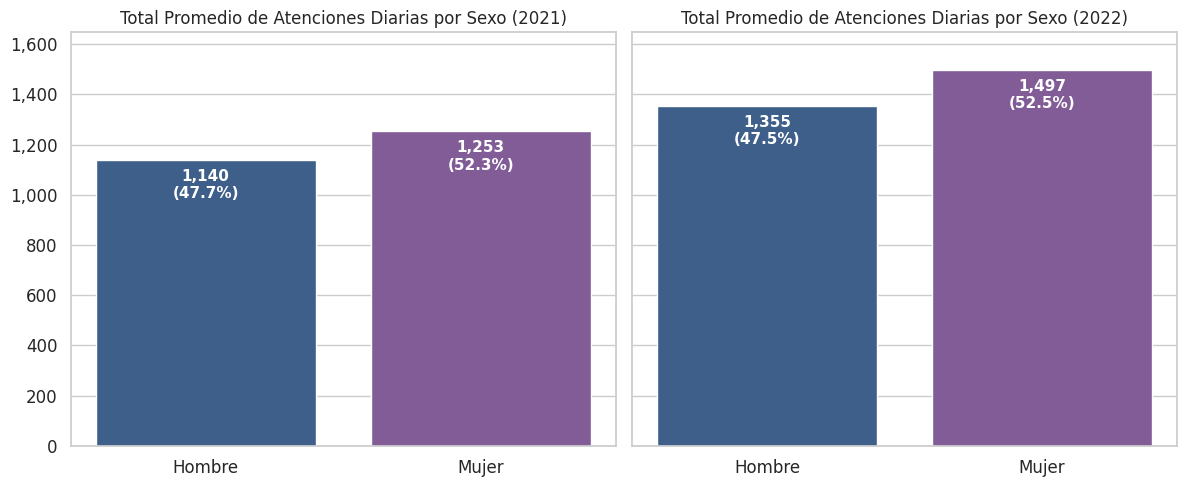

In [59]:
import locale

# Establecer el formato numérico con separador de miles
locale.setlocale(locale.LC_ALL, '')

# Ajustar el tamaño de fuente globalmente
plt.rc('font', size=11)

# Crear gráficos
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Obtener el valor máximo de los promedios para ambos años y agregar un margen
max_avg = max(AVG_Sexo_2021_df['Avg'].max(), AVG_Sexo_2022_df['Avg'].max()) * 1.1

# Función para formatear etiquetas con separador de miles
def format_func(value, tick_number):
    return locale.format_string('%d', value, grouping=True)

# Función para agregar etiquetas de valores y porcentajes a las barras
def add_labels(ax, bars, df):
    total = df['Avg'].sum()
    for bar in bars:
        height = bar.get_height()
        percentage = height / total * 100
        ax.text(bar.get_x() + bar.get_width() / 2, height + -0.1 * max_avg,
                f'{height:,.0f}\n({percentage:.1f}%)',
                ha='center', va='bottom', fontsize=11, color='white', weight='bold')

# Gráfico para 2021
bars1 = ax[0].bar(AVG_Sexo_2021_df['Sexo'], AVG_Sexo_2021_df['Avg'], color=['#3e5f8a', '#815C97'], alpha=1)
ax[0].set_title('Total Promedio de Atenciones Diarias por Sexo (2021)', fontsize=12)
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].set_ylim(0, max_avg)
ax[0].yaxis.set_major_formatter(ticker.FuncFormatter(format_func))
ax[0].yaxis.grid(True)
ax[0].xaxis.grid(False)
ax[0].tick_params(axis='both', which='major', labelsize=12)  # Ajuste de tamaño de fuente para etiquetas de ejes
add_labels(ax[0], bars1, AVG_Sexo_2021_df)

# Gráfico para 2022
bars2 = ax[1].bar(AVG_Sexo_2022_df['Sexo'], AVG_Sexo_2022_df['Avg'], color=['#3e5f8a', '#815C97'], alpha=1)
ax[1].set_title('Total Promedio de Atenciones Diarias por Sexo (2022)', fontsize=12)
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_ylim(0, max_avg)
ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(format_func))
ax[1].yaxis.grid(True)
ax[1].xaxis.grid(False)
ax[1].tick_params(axis='both', which='major', labelsize=12)  # Ajuste de tamaño de fuente para etiquetas de ejes
ax[1].set_yticklabels([])  # Ocultar los ticks del eje y (2022)
add_labels(ax[1], bars2, AVG_Sexo_2022_df)

plt.tight_layout()
plt.show()

**<Font color='blue'>Al analizar el sexo de los pacientes atendidos en urgencias, observamos que la diferencia entre géneros no es significativa. En ambos años, aproximadamente el 48% de los pacientes son hombres y el 52% son mujeres, resultando en una estrecha brecha de solo un 4% entre ambos géneros.**

In [60]:
poblacion_2021_df

,Provincia,Año_Anterior,Hombre,Mujer,Total
0,Ávila,158421,79442,78698,158140
1,Burgos,356055,177479,177566,355045
2,León,451706,217715,230464,448179
3,Palencia,159123,78269,79739,158008
4,Salamanca,327338,158174,167724,325898
5,Segovia,153663,77175,76628,153803
6,Soria,88747,44776,43601,88377
7,Valladolid,519361,252066,265909,517975
8,Zamora,168725,82787,84428,167215


In [61]:
poblacion_2022_df

,Provincia,Año_Anterior,Hombre,Mujer,Total
0,Ávila,158140,79551,78856,158407
1,Burgos,355045,178376,178804,357180
2,León,448179,217348,230115,447463
3,Palencia,158008,78063,79689,157752
4,Salamanca,325898,158669,168501,327170
5,Segovia,153803,77773,77485,155258
6,Soria,88377,45362,44120,89482
7,Valladolid,517975,253443,267628,521071
8,Zamora,167215,82418,83948,166366


#####**Análisis por Grupo Etario**

  - Considera cómo se distribuyen las atenciones según los grupos etarios definidos (niños, adolescentes, jóvenes, adultos, tercera edad). ¿Hay grupos que presenten mayor demanda de atención urgente?

In [62]:
# ATENCIONES POR EDAD, GRUPO ETARIO, SEXO Y NIVEL DE TRIAJE (EDGESXNT)

# Filtramos los DF's y calculamos el promedio diario
AVG_EDGESXNT_2021_df = ((Año_2021.groupby(['Edad','grupo_etario','Sexo','Nivel de triaje'])['Nivel de triaje'].size()) / 365).reset_index(name='Avg').sort_values(by='Avg', ascending=False)
AVG_EDGESXNT_2022_df = ((Año_2022.groupby(['Edad','grupo_etario','Sexo','Nivel de triaje'])['Nivel de triaje'].size()) / 365).reset_index(name='Avg').sort_values(by='Avg', ascending=False)


In [63]:
# POR CADA GRUPO ETARIO SE DEMANDAN EN PROMEDIO X# DE ATENCIONES DIARIAS AL AÑO
AVG_GESX_2021a = (AVG_EDGESXNT_2021_df.groupby(['grupo_etario','Sexo'])['Avg'].sum()).reset_index(name='Avg').sort_values(by='Avg', ascending=False)
AVG_GESX_2022a = (AVG_EDGESXNT_2022_df.groupby(['grupo_etario', 'Sexo'])['Avg'].sum()).reset_index(name='Avg').sort_values(by='Avg', ascending=False)

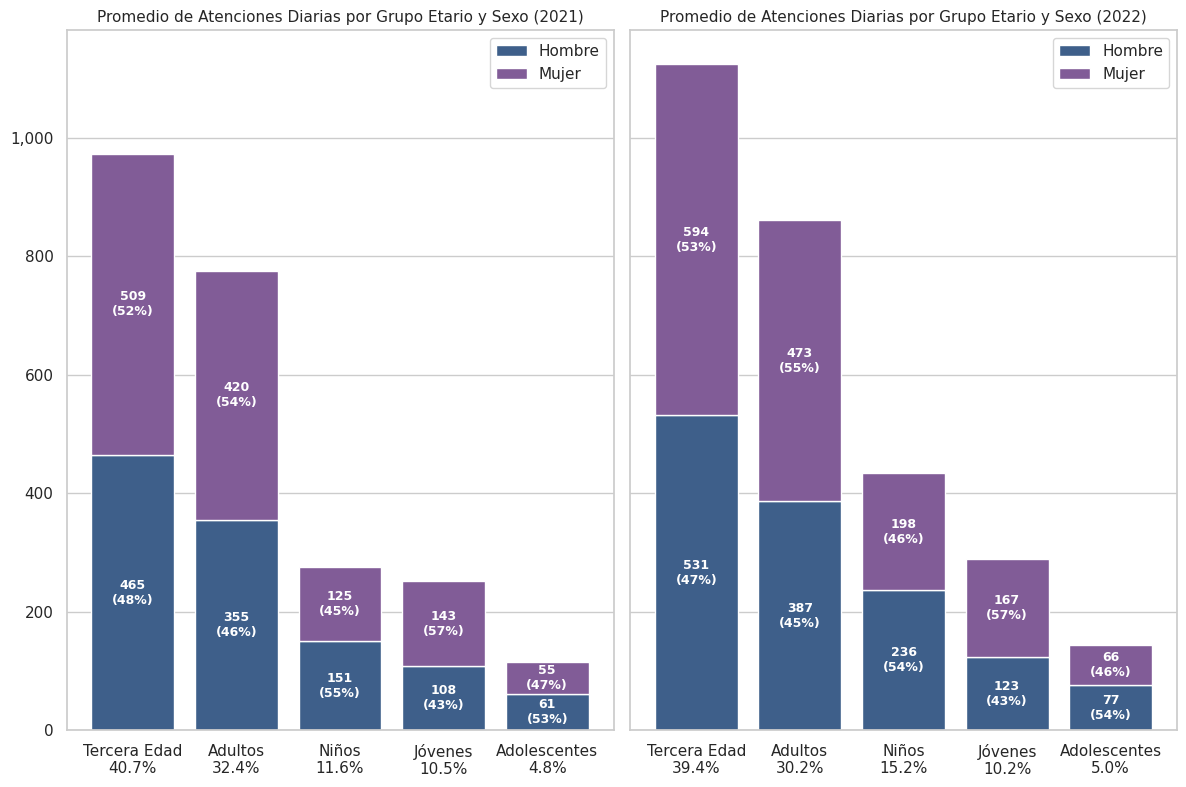

In [64]:
import locale
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def pivot_and_sort(df):
    # Pivotar el DataFrame
    pivot_df = df.pivot(index='grupo_etario', columns='Sexo', values='Avg').fillna(0)

    # Calcular el total por grupo etario y ordenar
    total_ge = pivot_df.sum(axis=1)
    ordered_index = total_ge.sort_values(ascending=False).index
    pivot_df_sorted = pivot_df.loc[ordered_index]

    # Calcular el porcentaje total para cada grupo etario
    total_sum = total_ge.sum()
    weighted_percentage = (total_ge / total_sum * 100).round(1).loc[ordered_index]

    return pivot_df_sorted, weighted_percentage

def plot_group_avg(ax, pivot_df, weighted_percentage, title):
    # Configurar el gráfico
    bars_hombres = ax.bar(pivot_df.index, pivot_df['Hombre'], color='#3e5f8a', label='Hombre')
    bars_mujeres = ax.bar(pivot_df.index, pivot_df['Mujer'], bottom=pivot_df['Hombre'], color='#815C97', label='Mujer')
    ax.set_title(title, fontsize=11)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: locale.format_string('%d', x, grouping=True)))
    ax.yaxis.grid(True)
    ax.xaxis.grid(False)
    ax.tick_params(axis='both', which='major', labelsize=11)

    # Función para agregar etiquetas de valores y porcentajes a las barras
    def add_labels(bars, df):
        for bar, grupo_etario in zip(bars, df.index):
            height = bar.get_height()
            percentage = height / df.loc[grupo_etario].sum() * 100
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2,
                    f'{height:,.0f}\n({percentage:.0f}%)',
                    ha='center', va='center', fontsize=9, color='white', weight='bold')

    add_labels(bars_hombres, pivot_df)
    add_labels(bars_mujeres, pivot_df)

    # Agregar porcentaje total debajo de las etiquetas del eje X
    xticks = ax.get_xticks()
    xticklabels = [f'{label}\n{percentage}%' for label, percentage in zip(pivot_df.index, weighted_percentage)]
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)

# Obtener los DataFrames pivotados y ordenados junto con los porcentajes para 2021 y 2022
AVG_GESX_2021_PIVOT, AVG_GE_2021_WGHT = pivot_and_sort(AVG_GESX_2021a)
AVG_GESX_2022_PIVOT, AVG_GE_2022_WGHT = pivot_and_sort(AVG_GESX_2022a)

# Establecer el formato numérico con separador de miles
locale.setlocale(locale.LC_ALL, '')

# Ajustar el tamaño de fuente globalmente
plt.rc('font', size=11)

# Crear gráficos con ejes compartidos en y
fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True)

# Graficar para 2021
plot_group_avg(ax[0], AVG_GESX_2021_PIVOT, AVG_GE_2021_WGHT, 'Promedio de Atenciones Diarias por Grupo Etario y Sexo (2021)')

# Graficar para 2022
plot_group_avg(ax[1], AVG_GESX_2022_PIVOT, AVG_GE_2022_WGHT, 'Promedio de Atenciones Diarias por Grupo Etario y Sexo (2022)')

# Añadir leyenda
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

In [65]:
# Definir el orden deseado para los grupos etarios
orden_grupos = ['Niños', 'Adolescentes', 'Jóvenes', 'Adultos', 'Tercera Edad']

# Utilizar la función pivot_and_sort para obtener los DataFrames pivotados y ordenados
def pivot_and_sort(df):
    pivot_df = df.pivot(index='grupo_etario', columns='Sexo', values='Avg').fillna(0)
    total_ge = pivot_df.sum(axis=1)
    ordered_index = total_ge.sort_values(ascending=False).index
    pivot_df_sorted = pivot_df.loc[ordered_index]
    total_sum = total_ge.sum()
    weighted_percentage = (total_ge / total_sum * 100).round(1).loc[ordered_index]
    return pivot_df_sorted, weighted_percentage

# Obtener los DataFrames pivotados y ordenados junto con los porcentajes para 2021 y 2022
AVG_GESX_2021_PIVOT, AVG_GE_2021_WGHT = pivot_and_sort(AVG_GESX_2021a)
AVG_GESX_2022_PIVOT, AVG_GE_2022_WGHT = pivot_and_sort(AVG_GESX_2022a)

# Calcular el porcentaje de hombres y mujeres por grupo etario para cada año
def calcular_porcentajes(df_pivot):
    df_pivot['% Hombres'] = (df_pivot['Hombre'] / (df_pivot['Hombre'] + df_pivot['Mujer']) * 100).round(1)
    df_pivot['% Mujeres'] = (df_pivot['Mujer'] / (df_pivot['Hombre'] + df_pivot['Mujer']) * 100).round(1)
    df_pivot['Diferencia'] = (df_pivot['% Hombres'] - df_pivot['% Mujeres']).round(1)
    return df_pivot

AVG_GESX_2021_PIVOT = calcular_porcentajes(AVG_GESX_2021_PIVOT)
AVG_GESX_2022_PIVOT = calcular_porcentajes(AVG_GESX_2022_PIVOT)

# Crear las tablas de resumen para cada año y reindexar según el orden deseado
tabla_2021 = AVG_GESX_2021_PIVOT[['% Hombres', '% Mujeres', 'Diferencia']].reindex(orden_grupos)
tabla_2022 = AVG_GESX_2022_PIVOT[['% Hombres', '% Mujeres', 'Diferencia']].reindex(orden_grupos)

# Asegurarse de que los índices coincidan con los grupos etarios deseados
tabla_2021.index.name = 'grupo_etario'
tabla_2022.index.name = 'grupo_etario'

# Encontrar las filas con mayor y menor diferencia en términos absolutos
def encontrar_max_min(tabla):
    max_diff = tabla['Diferencia'].abs().idxmax()
    min_diff = tabla['Diferencia'].abs().idxmin()
    return max_diff, min_diff

max_diff_2021, min_diff_2021 = encontrar_max_min(tabla_2021)
max_diff_2022, min_diff_2022 = encontrar_max_min(tabla_2022)

# Función para aplicar estilo condicional
def highlight_max_min(s):
    color = ''
    if s.name in [max_diff_2021, min_diff_2021, max_diff_2022, min_diff_2022]:
        color = 'background-color: #ff9688'
    return [color] * len(s)

# Aplicar estilo condicional a las tablas
styled_tabla_2021 = tabla_2021.style.apply(highlight_max_min, axis=1).format(precision=1)
styled_tabla_2022 = tabla_2022.style.apply(highlight_max_min, axis=1).format(precision=1)

# Mostrar las tablas estilizadas
print("Diferencias entre grupo/sexo para 2021:")
display(styled_tabla_2021)
print("\nDiferencias entre grupo/sexo para 2022:")
display(styled_tabla_2022)

Diferencias entre grupo/sexo para 2021:


Sexo,% Hombres,% Mujeres,Diferencia
grupo_etario,,,
Niños,54.7,45.3,9.4
Adolescentes,52.5,47.5,5.0
Jóvenes,43.1,56.9,-13.8
Adultos,45.8,54.2,-8.4
Tercera Edad,47.7,52.3,-4.6



Diferencias entre grupo/sexo para 2022:


Sexo,% Hombres,% Mujeres,Diferencia
grupo_etario,,,
Niños,54.5,45.5,9.0
Adolescentes,53.7,46.3,7.4
Jóvenes,42.5,57.5,-15.0
Adultos,45.0,55.0,-10.0
Tercera Edad,47.2,52.8,-5.6


**<Font color='blue'>Al analizar las atenciones abiertas por grupo etáreo, observamos que la mayor cantidad de atenciones se concentra en los grupos de adultos y tercera edad, quienes, en conjunto, acumulan el 72% y el 69% de las atenciones de urgencia en cada año, respectivamente. Otro dato interesante que se desprende de este análisis es que, al segmentar la información por sexo, concluimos que no existen grandes diferencias entre los grupos en términos anuales. Sin embargo, al realizar la misma segmentación por grupo etáreo, nos damos cuenta de que, en ambos años, en los grupos de Niños y Adolescentes, la mayor proporción de atenciones está concentrada en los hombres. En las siguientes etapas de vida más adultas, esta proporción se invierte, siendo las mujeres quienes registran una mayor cantidad de atenciones de urgencia.
Asimismo, es interesante mencionar que la mayor brecha entre hombres y mujeres se observa en el grupo de Jóvenes, donde las mujeres presentan una proporción significativamente mayor, con una diferencia de aproximadamente 14 y 15 puntos porcentuales en 2021 y 2022, respectivamente.**

**<Font color='green'>Preguntas por responder.
La distribución del sexo se correlaciona con la población de Castilla y León?, existe información pública o estudios relacionados?**

https://estadistica.jcyl.es/web/es/estadisticas-temas/cifras-oficiales-poblacion.html

**<Font color='green'>La distribución del grupo etario se correlaciona con la población de Castilla y León?, existe información pública o estudios relacionados?, será porque la población es mayormente de tercera edad?**

In [66]:
# ATENCIONES POR GRUPO ETARIO Y NIVEL DE TRIAJE

# Filtramos DF's por grupo etario y Nivel e Triaje
# Calcular el promedio diario por sexo para cada año
AVG_GrupoTriaje_2021 = (Año_2021.groupby(['grupo_etario','Nivel de triaje'])['Nivel de triaje'].size()) / 365
AVG_GrupoTriaje_2022 = (Año_2022.groupby(['grupo_etario','Nivel de triaje'])['Nivel de triaje'].size()) / 365

# Creamos nuevos DF's con la información
AVG_GrupoTriaje_2021_df = AVG_GrupoTriaje_2021.reset_index(name='Avg')
AVG_GrupoTriaje_2022_df = AVG_GrupoTriaje_2022.reset_index(name='Avg')

In [67]:
# ATENCIONES POR GRUPO ETARIO Y NIVEL DE TRIAJE (TOMANDO EL TOTAL X GRUPO ETARIO)
AVG_GENT_2021 = (AVG_EDGESXNT_2021_df.groupby(['grupo_etario','Nivel de triaje'])['Avg'].sum()).reset_index(name='Avg').sort_values(by='Avg', ascending=False)
AVG_GENT_2022 = (AVG_EDGESXNT_2022_df.groupby(['grupo_etario', 'Nivel de triaje'])['Avg'].sum()).reset_index(name='Avg').sort_values(by='Avg', ascending=False)

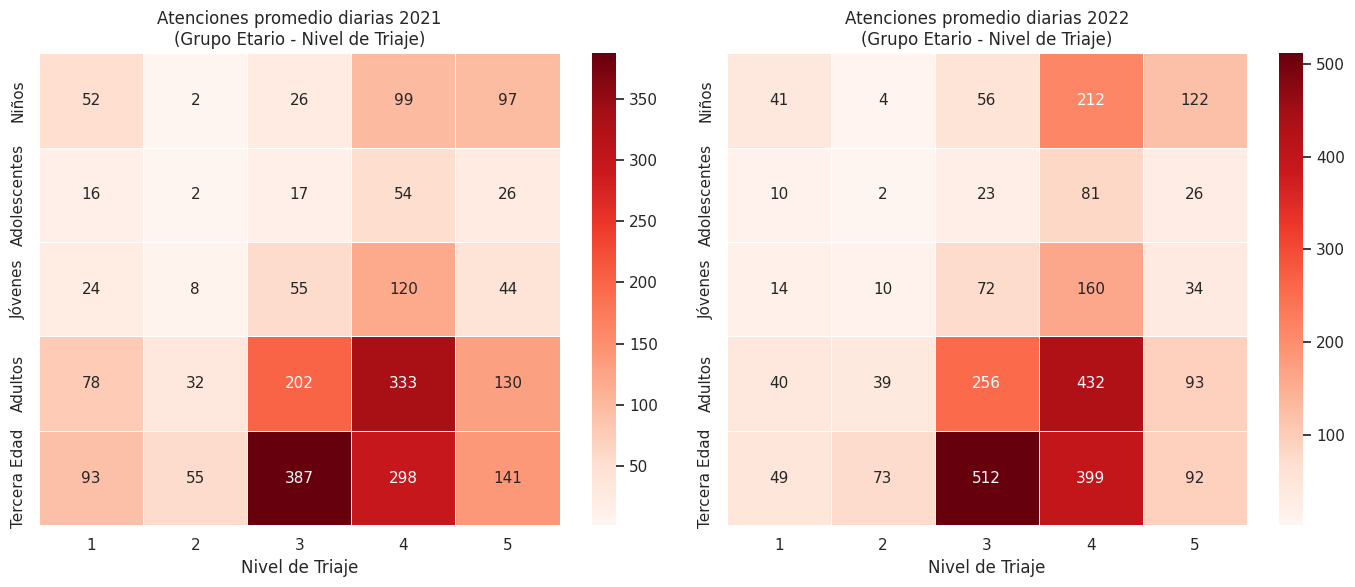

In [68]:
# se crea una tabla pivotante para ambos años.
heatmap2021 = pd.pivot_table(AVG_GENT_2021, values='Avg', index='grupo_etario', columns='Nivel de triaje', aggfunc='sum', fill_value=0)
heatmap2022 = pd.pivot_table(AVG_GENT_2022, values='Avg', index='grupo_etario', columns='Nivel de triaje', aggfunc='sum', fill_value=0)

# Convertir los valores de la tabla cruzada a enteros
heatmap2021 = heatmap2021.round().astype(int)
heatmap2022 = heatmap2022.round().astype(int)

# Creamos mapas de calor
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Mapa de calor 2021
sns.heatmap(heatmap2021, cmap='Reds', annot=True, fmt='d', linewidths=.5, ax=axes[0], cbar=True)
axes[0].set_title('Atenciones promedio diarias 2021\n(Grupo Etario - Nivel de Triaje)', ha='center')
axes[0].set_xlabel('Nivel de Triaje')
axes[0].set_ylabel('')

# Mapa de calor 2022
sns.heatmap(heatmap2022, cmap='Reds', annot=True, fmt='d', linewidths=.5, ax=axes[1], cbar=True)
axes[1].set_title('Atenciones promedio diarias 2022\n(Grupo Etario - Nivel de Triaje)', ha='center')
axes[1].set_xlabel('Nivel de Triaje')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

In [69]:
heatmap2022

Nivel de triaje,1,2,3,4,5
grupo_etario,,,,,
Niños,41,4,56,212,122
Adolescentes,10,2,23,81,26
Jóvenes,14,10,72,160,34
Adultos,40,39,256,432,93
Tercera Edad,49,73,512,399,92


In [70]:
# Calcular la diferencia entre las tablas pivotantes
diferencia = heatmap2022 - heatmap2021
diferencia

Nivel de triaje,1,2,3,4,5
grupo_etario,,,,,
Niños,-11,2,30,113,25
Adolescentes,-6,0,6,27,0
Jóvenes,-10,2,17,40,-10
Adultos,-38,7,54,99,-37
Tercera Edad,-44,18,125,101,-49


In [71]:
variación = ((heatmap2022 - heatmap2021)/heatmap2021)*100
variación

Nivel de triaje,1,2,3,4,5
grupo_etario,,,,,
Niños,-21.153846,100.000000,115.384615,114.141414,25.773196
Adolescentes,-37.500000,0.000000,35.294118,50.000000,0.000000
Jóvenes,-41.666667,25.000000,30.909091,33.333333,-22.727273
Adultos,-48.717949,21.875000,26.732673,29.729730,-28.461538
Tercera Edad,-47.311828,32.727273,32.299742,33.892617,-34.751773


**<Font Color='blue'>En el HeatMap se consolidan los hallazgos del análisis de los grupos etarios, permitiendo observar que la mayor parte de las atenciones de urgencia en ambos años se concentra principalmente en los grupos de Adultos y Tercera Edad. Dentro del grupo de Adultos, las consultas suelen clasificarse con mayor frecuencia en el triaje 4 (urgencia menor), mientras que en el grupo de la Tercera Edad predominan las clasificaciones de triaje 3 (urgente pero estable hemodinámicamente, con potencial riesgo vital). Precisamente este grupo y tipo de triaje son los que demandan el mayor número promedio de atenciones diarias, siguendo el mismo patrón en ambos años.**

In [72]:
heatmap2021

Nivel de triaje,1,2,3,4,5
grupo_etario,,,,,
Niños,52,2,26,99,97
Adolescentes,16,2,17,54,26
Jóvenes,24,8,55,120,44
Adultos,78,32,202,333,130
Tercera Edad,93,55,387,298,141


In [73]:
# Filtramos los DF's y calculamos el promedio diario
AVG_EDGESXNT_2021_df = ((Año_2021.groupby(['Edad','grupo_etario','Sexo','Nivel de triaje'])['Nivel de triaje'].size()) / 365).reset_index(name='Avg').sort_values(by='Avg', ascending=False)
AVG_EDGESXNT_2022_df = ((Año_2022.groupby(['Edad','grupo_etario','Sexo','Nivel de triaje'])['Nivel de triaje'].size()) / 365).reset_index(name='Avg').sort_values(by='Avg', ascending=False)

In [74]:
# Definimos Rangos de Edad
bins = [30, 40, 50, 60, 70, 80, 90, 100, 105]
labels = ['[30-39]', '[40-49]', '[50-59]', '[60-69]', '[70-79]', '[80-89]', '[90-99]', '[100-105]']

# Añadir la columna 'grupo_edad'
AVG_EDGESXNT_2021_df['grupo_edad'] = pd.cut(AVG_EDGESXNT_2021_df['Edad'], bins=bins, labels=labels, right=False)
AVG_EDGESXNT_2022_df['grupo_edad'] = pd.cut(AVG_EDGESXNT_2022_df['Edad'], bins=bins, labels=labels, right=False)

In [75]:
# Filtrar para obtener solo los grupos de edad Adultos y Tercera Edad
grupo_etario_interes = ['Adultos', 'Tercera Edad']
AVG_EDGESXNT_2021_interes = AVG_EDGESXNT_2021_df[AVG_EDGESXNT_2021_df['grupo_etario'].isin(grupo_etario_interes)]
AVG_EDGESXNT_2022_interes = AVG_EDGESXNT_2022_df[AVG_EDGESXNT_2022_df['grupo_etario'].isin(grupo_etario_interes)]

# Agrupar por 'nivel_de_triaje' y 'grupo_edad' y sumar 'Avg'
AVG_EDGESXNT_2021_grouped = AVG_EDGESXNT_2021_interes.groupby(['Nivel de triaje', 'grupo_edad','Sexo'])['Avg'].sum().reset_index()
AVG_EDGESXNT_2022_grouped = AVG_EDGESXNT_2022_interes.groupby(['Nivel de triaje', 'grupo_edad','Sexo'])['Avg'].sum().reset_index()

# Crear columna triaje_sexo
AVG_EDGESXNT_2021_grouped['triaje_sexo'] = AVG_EDGESXNT_2021_grouped['Nivel de triaje'].astype(str) + '-' + AVG_EDGESXNT_2021_grouped['Sexo'].astype(str)
AVG_EDGESXNT_2022_grouped['triaje_sexo'] = AVG_EDGESXNT_2022_grouped['Nivel de triaje'].astype(str) + '-' + AVG_EDGESXNT_2022_grouped['Sexo'].astype(str)

# Mostrar las primeras filas para verificar la nueva columna
print(AVG_EDGESXNT_2021_grouped.head())
print(AVG_EDGESXNT_2022_grouped.head())

# Crear pivotes para heatmap
pivot_2021 = AVG_EDGESXNT_2021_grouped.pivot(index='grupo_edad', columns='triaje_sexo', values='Avg')
pivot_2022 = AVG_EDGESXNT_2022_grouped.pivot(index='grupo_edad', columns='triaje_sexo', values='Avg')

  Nivel de triaje grupo_edad    Sexo        Avg triaje_sexo
0               1    [30-39]  Hombre   9.964384    1-Hombre
1               1    [30-39]   Mujer  16.575342     1-Mujer
2               1    [40-49]  Hombre  12.172603    1-Hombre
3               1    [40-49]   Mujer  13.224658     1-Mujer
4               1    [50-59]  Hombre  13.720548    1-Hombre
  Nivel de triaje grupo_edad    Sexo       Avg triaje_sexo
0               1    [30-39]  Hombre  5.002740    1-Hombre
1               1    [30-39]   Mujer  9.695890     1-Mujer
2               1    [40-49]  Hombre  6.027397    1-Hombre
3               1    [40-49]   Mujer  6.479452     1-Mujer
4               1    [50-59]  Hombre  6.920548    1-Hombre


In [76]:
# Agrupar por 'Nivel de triaje' y 'grupo_edad' y sumar 'Avg' para 2021 y 2022
sum_avg_2021 = AVG_EDGESXNT_2021_interes['Avg'].sum()
sum_avg_2022 = AVG_EDGESXNT_2022_interes['Avg'].sum()

print(f"Suma total de 'Avg' para 2021: {sum_avg_2021}")
print(f"Suma total de 'Avg' para 2022: {sum_avg_2022}")

Suma total de 'Avg' para 2021: 1749.0246575342464
Suma total de 'Avg' para 2022: 1985.3945205479451


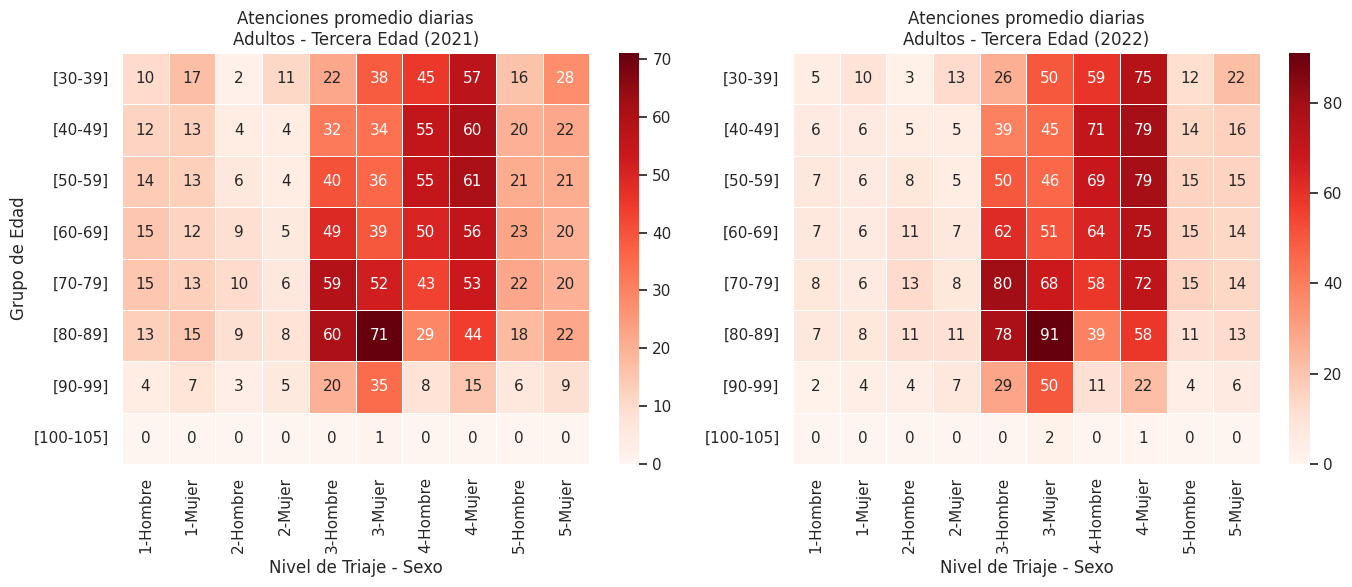

In [77]:
# Redondear los valores en los pivotes a enteros (si los datos son floats)
pivot_2021_int = pivot_2021.round().astype(int)
pivot_2022_int = pivot_2022.round().astype(int)

# Configuración de los subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6))

# Heatmap 2021
sns.heatmap(pivot_2021_int, annot=True, cmap='Reds', fmt='.0f', linewidths=.5, ax=ax1)
ax1.set_title('Atenciones promedio diarias\nAdultos - Tercera Edad (2021)')
ax1.set_xlabel('Nivel de Triaje - Sexo')
ax1.set_ylabel('Grupo de Edad')

# Heatmap 2022
sns.heatmap(pivot_2022_int, annot=True, cmap='Reds', fmt='.0f', linewidths=.5, ax=ax2)
ax2.set_title('Atenciones promedio diarias\nAdultos - Tercera Edad (2022)')
ax2.set_xlabel('Nivel de Triaje - Sexo')
ax2.set_ylabel('')

# Ajustes de diseño
plt.tight_layout()
plt.show()

In [78]:
# Tabla cruzada para 2021
pivot_2021_cross = AVG_EDGESXNT_2021_grouped.pivot(index='grupo_edad', columns='triaje_sexo', values='Avg').fillna(0)
# Tabla cruzada para 2022
pivot_2022_cross = AVG_EDGESXNT_2022_grouped.pivot(index='grupo_edad', columns='triaje_sexo', values='Avg').fillna(0)

In [79]:
print("Tabla cruzada para 2021:")
pivot_2021_cross

Tabla cruzada para 2021:


triaje_sexo,1-Hombre,1-Mujer,2-Hombre,2-Mujer,3-Hombre,3-Mujer,4-Hombre,4-Mujer,5-Hombre,5-Mujer
grupo_edad,,,,,,,,,,
[30-39],9.964384,16.575342,2.304110,11.241096,21.591781,38.471233,45.263014,57.479452,16.416438,28.032877
[40-49],12.172603,13.224658,3.824658,4.213699,31.882192,34.446575,55.378082,59.698630,20.471233,22.194521
[50-59],13.720548,12.635616,6.254795,4.000000,39.986301,35.882192,54.539726,61.082192,21.430137,21.276712
[60-69],14.849315,11.800000,8.717808,4.912329,48.608219,39.071233,50.487671,55.969863,23.213699,20.090411
[70-79],14.621918,13.139726,9.991781,6.142466,59.498630,51.769863,42.832877,52.679452,21.841096,20.334247
[80-89],12.742466,14.810959,8.652055,8.342466,60.350685,70.876712,28.849315,43.695890,17.663014,22.147945
[90-99],4.336986,6.835616,2.895890,4.789041,20.353425,35.320548,7.772603,14.953425,5.605479,9.295890
[100-105],0.065753,0.200000,0.084932,0.117808,0.315068,0.854795,0.076712,0.336986,0.115068,0.271233


In [80]:
print("\nTabla cruzada para 2022:")
pivot_2022_cross


Tabla cruzada para 2022:


triaje_sexo,1-Hombre,1-Mujer,2-Hombre,2-Mujer,3-Hombre,3-Mujer,4-Hombre,4-Mujer,5-Hombre,5-Mujer
grupo_edad,,,,,,,,,,
[30-39],5.002740,9.695890,2.789041,12.964384,26.495890,49.731507,59.306849,74.704110,11.887671,21.673973
[40-49],6.027397,6.479452,4.630137,5.367123,38.849315,45.224658,70.923288,79.432877,13.682192,16.383562
[50-59],6.920548,6.041096,7.893151,5.284932,49.624658,45.879452,68.567123,79.400000,14.649315,14.942466
[60-69],7.441096,5.939726,11.106849,6.767123,61.832877,50.679452,63.969863,74.843836,14.884932,14.183562
[70-79],7.772603,6.468493,13.301370,8.315068,80.323288,68.328767,57.649315,71.873973,15.147945,13.569863
[80-89],6.923288,7.767123,11.427397,11.013699,77.854795,91.408219,39.049315,58.441096,11.287671,13.087671
[90-99],2.402740,3.789041,4.180822,6.876712,29.284932,49.986301,10.852055,21.545205,3.873973,5.939726
[100-105],0.052055,0.128767,0.082192,0.252055,0.468493,1.572603,0.156164,0.539726,0.087671,0.164384


In [81]:
# Calcular la diferencia entre 2022 y 2021 y convertir a un decimal
pivot_diff = pivot_2022_cross - pivot_2021_cross

# Definir una función para resaltar las mayores diferencias absolutas en rojo
def highlight_max(s):
    is_max = s == s.abs().max()
    return ['background-color: #ff9688' if v else '' for v in is_max]

# Formatear los valores de pivot_diff a un decimal antes de aplicar el estilo
styled_diff = pivot_diff.style.format('{:.2f}').apply(highlight_max)
styled_diff

triaje_sexo,1-Hombre,1-Mujer,2-Hombre,2-Mujer,3-Hombre,3-Mujer,4-Hombre,4-Mujer,5-Hombre,5-Mujer
grupo_edad,,,,,,,,,,
[30-39],-4.96,-6.88,0.48,1.72,4.90,11.26,14.04,17.22,-4.53,-6.36
[40-49],-6.15,-6.75,0.81,1.15,6.97,10.78,15.55,19.73,-6.79,-5.81
[50-59],-6.80,-6.59,1.64,1.28,9.64,10.00,14.03,18.32,-6.78,-6.33
[60-69],-7.41,-5.86,2.39,1.85,13.22,11.61,13.48,18.87,-8.33,-5.91
[70-79],-6.85,-6.67,3.31,2.17,20.82,16.56,14.82,19.19,-6.69,-6.76
[80-89],-5.82,-7.04,2.78,2.67,17.50,20.53,10.20,14.75,-6.38,-9.06
[90-99],-1.93,-3.05,1.28,2.09,8.93,14.67,3.08,6.59,-1.73,-3.36
[100-105],-0.01,-0.07,-0.00,0.13,0.15,0.72,0.08,0.20,-0.03,-0.11


####**2.3.  Localización Geográfica y Nivel de Triaje:**

#####**Análisis por Provincia y Hospital**

- Explora si hay diferencias en la cantidad o tipo de urgencias atendidas por área.
- Considera si el nivel de triaje varía significativamente entre distintas zonas, provincias o áreas.

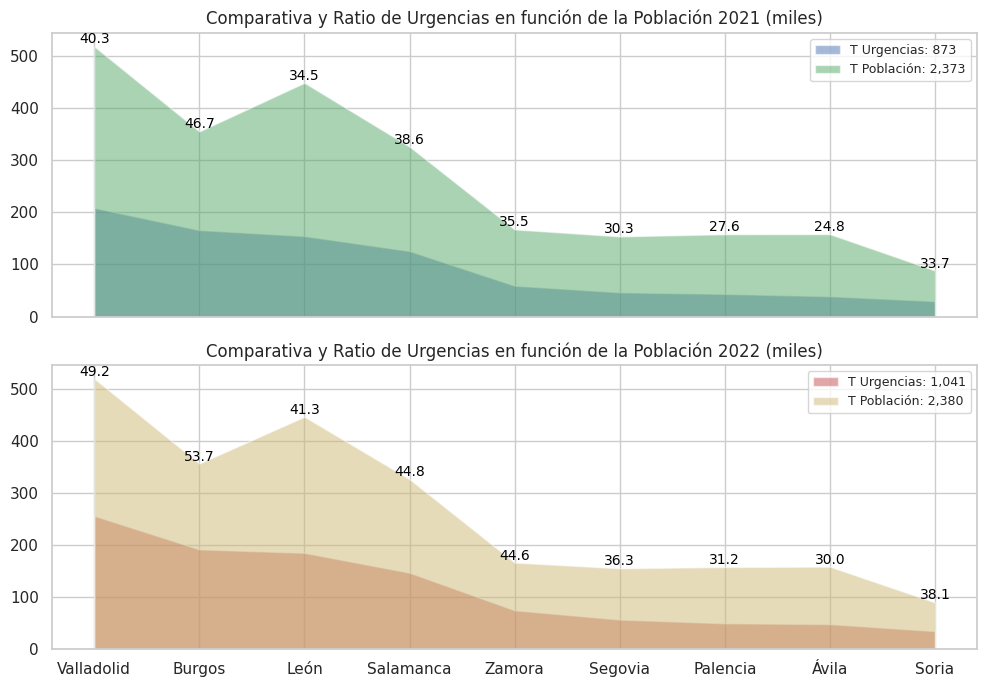

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular la cantidad de registros por provincia en Año_2021 y Año_2022
registros_por_provincia_2021 = Año_2021['Provincia'].value_counts()
registros_por_provincia_2022 = Año_2022['Provincia'].value_counts()

# Obtener la población por provincia desde los DataFrames de población de ambos años
poblacion_por_provincia_2021 = poblacion_2021_df.set_index('Provincia')['Total']
poblacion_por_provincia_2022 = poblacion_2022_df.set_index('Provincia')['Total']

# Calcular el ratio entre cantidad de registros y población por provincia para ambos años
ratio_por_provincia_2021 = round((registros_por_provincia_2021 / poblacion_por_provincia_2021)*100,1)
ratio_por_provincia_2022 = round((registros_por_provincia_2022 / poblacion_por_provincia_2022)*100,1)

# Crear DataFrames combinados con los datos calculados para ambos años
datos_combinados_2021 = pd.DataFrame({
    'Registros_2021': registros_por_provincia_2021,
    'Población_2021': poblacion_por_provincia_2021,
    'Ratio_2021': ratio_por_provincia_2021
}).fillna(0)  # Rellenar NaN con 0 en caso de divisiones por cero

datos_combinados_2022 = pd.DataFrame({
    'Registros_2022': registros_por_provincia_2022,
    'Población_2022': poblacion_por_provincia_2022,
    'Ratio_2022': ratio_por_provincia_2022
}).fillna(0)  # Rellenar NaN con 0 en caso de divisiones por cero

# Unir ambos DataFrames en uno solo usando sufijos para evitar colisión de nombres de columnas
datos_combinados = datos_combinados_2021.join(datos_combinados_2022, how='outer', lsuffix='_2021', rsuffix='_2022').fillna(0)

# Ordenar el DataFrame por la cantidad de registros de mayor a menor (considerando ambos años)
datos_combinados = datos_combinados.sort_values(by=['Registros_2021', 'Registros_2022'], ascending=False)

# Preparar los datos para el gráfico
provincias = datos_combinados.index
indices = range(len(provincias))
registros_2021 = datos_combinados['Registros_2021'] / 1000  # Convertir a miles
registros_2022 = datos_combinados['Registros_2022'] / 1000  # Convertir a miles
poblacion_2021 = datos_combinados['Población_2021'] / 1000  # Convertir a miles
poblacion_2022 = datos_combinados['Población_2022'] / 1000  # Convertir a miles
ratio_2021 = datos_combinados['Ratio_2021']
ratio_2022 = datos_combinados['Ratio_2022']

total_urgencias_2021 = registros_por_provincia_2021.sum() / 1000
total_poblacion_2021 = poblacion_por_provincia_2021.sum() / 1000
total_urgencias_2022 = registros_por_provincia_2022.sum() / 1000
total_poblacion_2022 = poblacion_por_provincia_2022.sum() / 1000

total_urgencias_2021_fmt = f"{total_urgencias_2021:,.0f}"
total_poblacion_2021_fmt = f"{total_poblacion_2021:,.0f}"
total_urgencias_2022_fmt = f"{total_urgencias_2022:,.0f}"
total_poblacion_2022_fmt = f"{total_poblacion_2022:,.0f}"

# Crear dos subplots en vertical
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7), sharex=True)

# Gráfico para 2021
ax1.stackplot(indices, registros_2021, labels=['Población 2021'], colors=['b'], alpha=0.5)
ax1.stackplot(indices, poblacion_2021, labels=['Población 2021'], colors=['g'], alpha=0.5)
ax1.set_ylabel('')
ax1.set_title('Comparativa y Ratio de Urgencias en función de la Población 2021 (miles)')
ax1.set_xticks(indices)  # Establecer ticks en el eje X
ax1.set_xticklabels(provincias, rotation=0)  # Establecer etiquetas en el eje X
ax1.legend([f'T Urgencias: {total_urgencias_2021_fmt}', f'T Población: {total_poblacion_2021_fmt}'], loc='upper right', fontsize=9)

# Añadir etiquetas de ratio para 2021
for i, txt in enumerate(ratio_2021):
    ax1.text(i, max(registros_2021[i], poblacion_2021[i]), f'{txt:.1f}', ha='center', va='bottom', rotation=0, color='black', fontsize=10, fontweight='light')

# Gráfico para 2022
ax2.stackplot(indices, registros_2022, labels=['Urgencias 2022'], colors=['r'], alpha=0.5)
ax2.stackplot(indices, poblacion_2022, labels=['Población 2022'], colors=['y'], alpha=0.5)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_title('Comparativa y Ratio de Urgencias en función de la Población 2022 (miles)')
ax2.set_xticks(indices)
ax2.set_xticklabels(provincias, rotation=0)
ax2.legend([f'T Urgencias: {total_urgencias_2022_fmt}', f'T Población: {total_poblacion_2022_fmt}'], loc='upper right', fontsize=9)

# Añadir etiquetas de ratio para 2022
for i, txt in enumerate(ratio_2022):
    ax2.text(i, max(registros_2022[i], poblacion_2022[i]), f'{txt:.1f}', ha='center', va='bottom', rotation=0, color='black', fontsize=10, fontweight='light')

# Ajuste de layout y visualización
fig.tight_layout()
plt.show()

In [83]:
import pandas as pd

# Crear un DataFrame para la tabla
data_geo = {
    'Registros_2021': registros_por_provincia_2021,
    'Registros_2022': registros_por_provincia_2022,
    'Dif Registros 2022-2021': registros_por_provincia_2022 - registros_por_provincia_2021,
    'Var Registros 2022-2021 (%)': round(((registros_por_provincia_2022 - registros_por_provincia_2021) / registros_por_provincia_2021) * 100, 1),
    'Población_2021': poblacion_por_provincia_2021,
    'Población_2022': poblacion_por_provincia_2022,
    'Dif Población 2022-2021': poblacion_por_provincia_2022 - poblacion_por_provincia_2021,
    'Var Población 2022-2021 (%)': round(((poblacion_por_provincia_2022 - poblacion_por_provincia_2021) / poblacion_por_provincia_2021) * 100, 1),
    'Ratio_2021': ratio_por_provincia_2021,
    'Ratio_2022': ratio_por_provincia_2022,
    'Dif Ratio 2022-2021': round(ratio_por_provincia_2022 - ratio_por_provincia_2021,1),
}

df = pd.DataFrame(data_geo)

# Mostrar la tabla
df

,Registros_2021,Registros_2022,Dif Registros 2022-2021,Var Registros 2022-2021 (%),Población_2021,Población_2022,Dif Población 2022-2021,Var Población 2022-2021 (%),Ratio_2021,Ratio_2022,Dif Ratio 2022-2021
Provincia,,,,,,,,,,,
Burgos,165934,191654,25720,15.5,355045,357180,2135,0.6,46.7,53.7,7.0
León,154496,185003,30507,19.7,448179,447463,-716,-0.2,34.5,41.3,6.8
Palencia,43614,49144,5530,12.7,158008,157752,-256,-0.2,27.6,31.2,3.6
Salamanca,125784,146714,20930,16.6,325898,327170,1272,0.4,38.6,44.8,6.2
Segovia,46650,56339,9689,20.8,153803,155258,1455,0.9,30.3,36.3,6.0
Soria,29742,34078,4336,14.6,88377,89482,1105,1.3,33.7,38.1,4.4
Valladolid,208562,256351,47789,22.9,517975,521071,3096,0.6,40.3,49.2,8.9
Zamora,59400,74225,14825,25.0,167215,166366,-849,-0.5,35.5,44.6,9.1
Ávila,39152,47580,8428,21.5,158140,158407,267,0.2,24.8,30.0,5.2


In [84]:
# FILTRO PROVINCIA, HOSPITAL, NIVEL DE TRIAJE
AVG_PRHONT_2021_df = ((Año_2021.groupby(['Provincia','Hospital','Nivel de triaje']).size())/365).reset_index(name='Avg').sort_values(by='Avg', ascending=False)
AVG_PRHONT_2022_df = ((Año_2022.groupby(['Provincia','Hospital','Nivel de triaje']).size())/365).reset_index(name='Avg').sort_values(by='Avg', ascending=False)

In [85]:
pip install pandas matplotlib squarify

In [86]:
AVG_Prov_2021_df = AVG_PRHONT_2021_df.groupby('Provincia')['Avg'].sum().reset_index()
AVG_Prov_2022_df = AVG_PRHONT_2022_df.groupby('Provincia')['Avg'].sum().reset_index()

In [87]:
pip install squarify

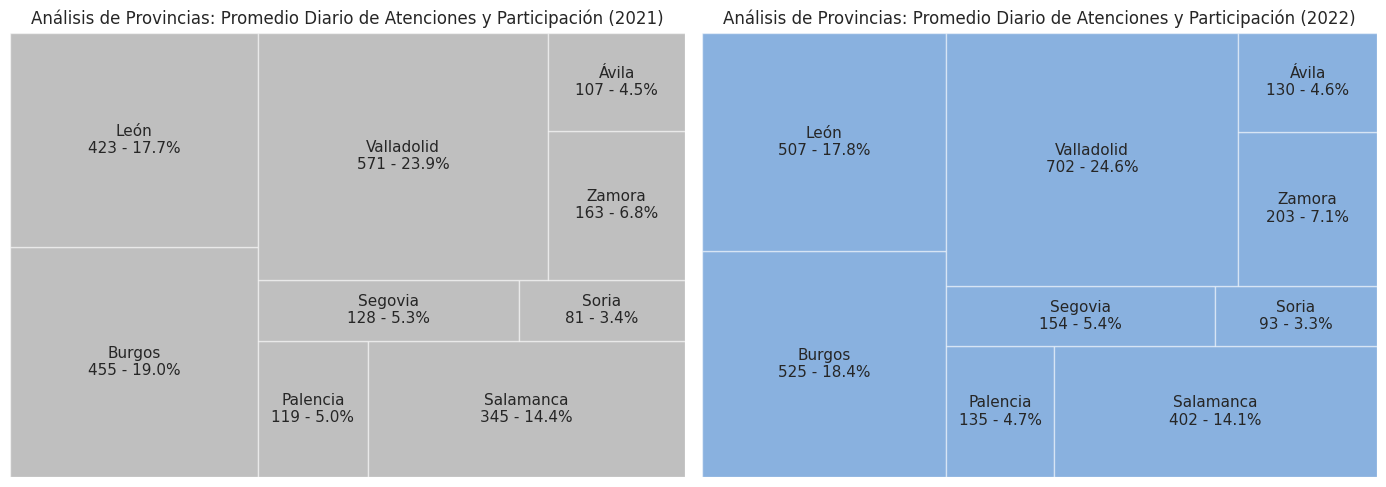

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify

# Calcular el total de Avg para cada año a partir de los DataFrames
total_prov_2021 = AVG_Prov_2021_df['Avg'].sum()
total_prov_2022 = AVG_Prov_2022_df['Avg'].sum()

# Calcular el porcentaje que representa cada provincia sobre el total del año
AVG_Prov_2021_df['Percentage'] = (AVG_Prov_2021_df['Avg'] / total_prov_2021) * 100
AVG_Prov_2022_df['Percentage'] = (AVG_Prov_2022_df['Avg'] / total_prov_2022) * 100

# Función para formatear el texto que se mostrará en el treemap
def label_format(prov, avg, perc):
    # Formatear el porcentaje sin decimales
    perc_str = f"{perc:.1f}%"
    # Formatear el valor de Avg con separador de miles
    avg_str = f"{avg:,.0f}"
    return f"{prov}\n{avg_str} - {perc_str}"

# Crear figura y subplots para los treemaps
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Treemap para 2021
squarify.plot(sizes=AVG_Prov_2021_df['Avg'],
              label=[label_format(prov, avg, perc) for prov, avg, perc in zip(AVG_Prov_2021_df['Provincia'], AVG_Prov_2021_df['Avg'], AVG_Prov_2021_df['Percentage'])],
              color='gray', alpha=0.5, ax=axes[0])
axes[0].set_title('Análisis de Provincias: Promedio Diario de Atenciones y Participación (2021)')
axes[0].axis('off')

# Treemap para 2022
squarify.plot(sizes=AVG_Prov_2022_df['Avg'],
              label=[label_format(prov, avg, perc) for prov, avg, perc in zip(AVG_Prov_2022_df['Provincia'], AVG_Prov_2022_df['Avg'], AVG_Prov_2022_df['Percentage'])],
              color='#1565C0', alpha=0.5, ax=axes[1])
axes[1].set_title('Análisis de Provincias: Promedio Diario de Atenciones y Participación (2022)')
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [89]:
total_prov_2021

2392.695890410959

In [90]:
import pandas as pd

# Calcular la suma total de Avg para los años 2021 y 2022
total_prov_2021 = AVG_Prov_2021_df['Avg'].sum()
total_prov_2022 = AVG_Prov_2022_df['Avg'].sum()

# Unir los DataFrames y llenar NaN con 0
merged_df = pd.merge(AVG_Prov_2021_df, AVG_Prov_2022_df, on='Provincia', suffixes=('_2021', '_2022'), how='outer').fillna(0)

# Calcular los pesos y la diferencia de pesos
merged_df['Weight_2021'] = merged_df['Avg_2021'] / total_prov_2021 * 100
merged_df['Weight_2022'] = merged_df['Avg_2022'] / total_prov_2022 * 100
merged_df['Diff_Weight'] = merged_df['Weight_2022'] - merged_df['Weight_2021']

# Ordenar y seleccionar columnas relevantes
tabla_cruzada = merged_df[['Provincia', 'Avg_2021', 'Avg_2022', 'Weight_2021', 'Weight_2022', 'Diff_Weight']].sort_values(by='Avg_2022', ascending=False).reset_index(drop=True)

# Formatear las columnas
tabla_cruzada['Total 2021'] = tabla_cruzada['Avg_2021'].map('{:,.0f}'.format)
tabla_cruzada['Total 2022'] = tabla_cruzada['Avg_2022'].map('{:,.0f}'.format)
tabla_cruzada['Weight 2021'] = tabla_cruzada['Weight_2021'].map('{:.1f}%'.format)
tabla_cruzada['Weight 2022'] = tabla_cruzada['Weight_2022'].map('{:.1f}%'.format)
tabla_cruzada['Diff Weight'] = tabla_cruzada['Diff_Weight'].map('{:.1f}'.format)

# Seleccionar y reordenar columnas para la tabla final
tabla_cruzada_final = tabla_cruzada[['Provincia', 'Total 2021', 'Total 2022', 'Weight 2021', 'Weight 2022', 'Diff Weight']]

# Función para destacar el mayor valor absoluto
def highlight_max(s):
    return ['background-color: lightgrey' if v == s.max() else '' for v in s]

# Aplicar el estilo
tabla_cruzada_styled_final = tabla_cruzada_final.style.apply(highlight_max, subset=['Total 2021', 'Total 2022', 'Weight 2021', 'Weight 2022', 'Diff Weight'])

# Mostrar la tabla cruzada formateada con los valores máximos destacados
tabla_cruzada_styled_final


,Provincia,Total 2021,Total 2022,Weight 2021,Weight 2022,Diff Weight
0,Valladolid,571,702,23.9%,24.6%,0.7
1,Burgos,455,525,19.0%,18.4%,-0.6
2,León,423,507,17.7%,17.8%,0.1
3,Salamanca,345,402,14.4%,14.1%,-0.3
4,Zamora,163,203,6.8%,7.1%,0.3
5,Segovia,128,154,5.3%,5.4%,0.1
6,Palencia,119,135,5.0%,4.7%,-0.3
7,Ávila,107,130,4.5%,4.6%,0.1
8,Soria,81,93,3.4%,3.3%,-0.1


In [91]:
# Calcular la suma total de Avg para el año 2022 separado por provincia
total_prov_2022 = AVG_Prov_2022_df['Avg'].sum()

# Calcular la diferencia total entre 2022 y 2021
diff_total = total_prov_2022 - total_prov_2021

# Unir los DataFrames para obtener todas las provincias presentes en ambos años
merged_df = pd.merge(AVG_Prov_2021_df, AVG_Prov_2022_df, on='Provincia', suffixes=('_2021', '_2022'), how='outer')

# Llenar NaN con 0 para las provincias que no están en ambos años
merged_df = merged_df.fillna(0)

# Calcular los pesos (Weight) para 2021 y 2022
merged_df['Weight_2021'] = merged_df['Avg_2021'] / total_prov_2021 * 100
merged_df['Weight_2022'] = merged_df['Avg_2022'] / total_prov_2022 * 100

# Calcular la diferencia de pesos entre 2022 y 2021
merged_df['Diff_Weight'] = merged_df['Weight_2022'] - merged_df['Weight_2021']

# Formatear las columnas según las especificaciones
merged_df['Total 2021'] = merged_df['Avg_2021'].apply(lambda x: f"{x:,.0f}")
merged_df['Total 2022'] = merged_df['Avg_2022'].apply(lambda x: f"{x:,.0f}")
merged_df['Weight 2021'] = merged_df['Weight_2021'].apply(lambda x: f"{x:.1f}%")
merged_df['Weight 2022'] = merged_df['Weight_2022'].apply(lambda x: f"{x:.1f}%")
merged_df['Diff_Weight'] = merged_df['Diff_Weight'].apply(lambda x: f"{x:.1f}")

# Ordenar por la columna Provincia
merged_df = merged_df.sort_values(by='Provincia').reset_index(drop=True)

# Crear la tabla cruzada final
tabla_cruzada = merged_df[['Provincia', 'Total 2021', 'Total 2022', 'Weight 2021', 'Weight 2022', 'Diff_Weight']]

# Mostrar la tabla cruzada formateada
print(tabla_cruzada)

    Provincia Total 2021 Total 2022 Weight 2021 Weight 2022 Diff_Weight
0      Burgos        455        525       19.0%       18.4%        -0.6
1        León        423        507       17.7%       17.8%         0.1
2    Palencia        119        135        5.0%        4.7%        -0.3
3   Salamanca        345        402       14.4%       14.1%        -0.3
4     Segovia        128        154        5.3%        5.4%         0.1
5       Soria         81         93        3.4%        3.3%        -0.1
6  Valladolid        571        702       23.9%       24.6%         0.7
7      Zamora        163        203        6.8%        7.1%         0.3
8       Ávila        107        130        4.5%        4.6%         0.1


In [92]:
print(total_prov_2021*365)
print(total_prov_2022*365)

873334.0
1041087.9999999999


<ipython-input-93-46fea8eefff0>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Reds').reversed()


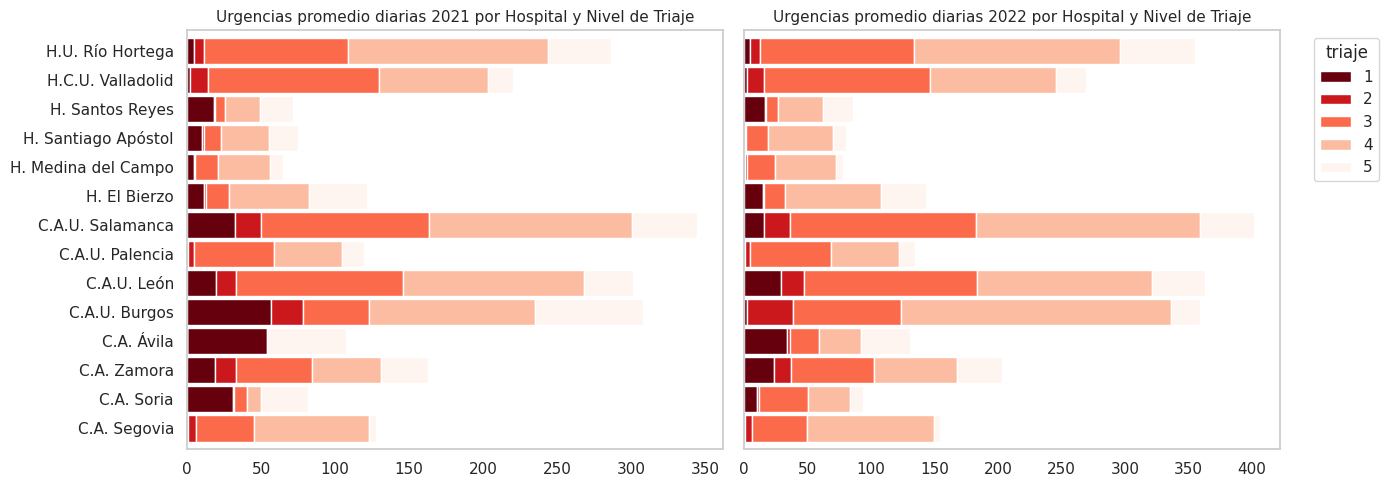

In [93]:
import matplotlib.colors as mcolors

# Crear DataFrames con los datos de AVG_PRHONT_2021_df y AVG_PRHONT_2022_df
df_2021 = AVG_PRHONT_2021_df
df_2022 = AVG_PRHONT_2022_df

# Agrupar los datos por Hospital y Nivel de Triaje y calcular la suma de la columna Avg para cada año
grouped_df_2021 = df_2021.groupby(['Hospital', 'Nivel de triaje'])['Avg'].sum().unstack()
grouped_df_2022 = df_2022.groupby(['Hospital', 'Nivel de triaje'])['Avg'].sum().unstack()

# Crear la paleta de colores "Reds" invertida
cmap = plt.cm.get_cmap('Reds').reversed()

# Configurar el tamaño de los gráficos (ancho, alto) en pulgadas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))  # Creamos dos subplots (uno para cada año)

# Gráfico para 2021
grouped_df_2021.plot(kind='barh', stacked=True, colormap='Reds_r', ax=ax1, edgecolor='white', width=0.9)
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_title('Urgencias promedio diarias 2021 por Hospital y Nivel de Triaje', fontsize=11)
ax1.tick_params(axis='y', labelsize=11)
#ax1.legend(title='triaje', bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.legend().remove()  # Eliminar la leyenda
ax1.grid(False)

# Gráfico para 2022
grouped_df_2022.plot(kind='barh', stacked=True, colormap='Reds_r', ax=ax2, edgecolor='white', width=0.9)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_title('Urgencias promedio diarias 2022 por Hospital y Nivel de Triaje', fontsize=11)
ax2.tick_params(axis='y', labelsize=11)
ax2.legend(title='triaje', bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(False)

# Ocultar los ticks y título del eje y del segundo gráfico
ax2.tick_params(axis='y', which='both', left=False, labelleft=False)
ax2.set_ylabel('')  # Esto establece el título del eje y como una cadena vacía

# Ajustar el diseño para que todo se vea bien
plt.tight_layout()

# Mostrar los gráficos
plt.show()

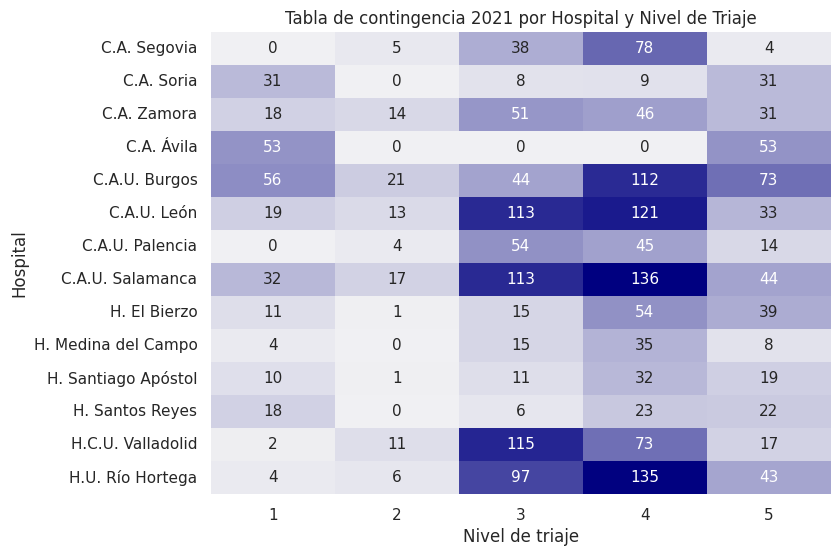

In [94]:
# Agrupar los datos y calcular la suma de Avg para cada combinación de Hospital y Nivel de triaje
grouped_df_2021 = df_2021.pivot_table(index='Hospital', columns='Nivel de triaje', values='Avg', aggfunc='sum', fill_value=0)

# Convertir los valores a enteros
grouped_df_2021 = grouped_df_2021.astype(int)

# Definir una paleta de colores en degradé descendente
cmap = sns.light_palette("navy", as_cmap=True)

# Graficar la tabla de contingencia con colores en degradé
plt.figure(figsize=(8, 6))
sns.heatmap(grouped_df_2021, annot=True, fmt="d", cmap=cmap, cbar=False)
plt.title('Tabla de contingencia 2021 por Hospital y Nivel de Triaje')
plt.xlabel('Nivel de triaje')
plt.ylabel('Hospital')
plt.show()

In [95]:
grouped_df_2021

Nivel de triaje,1,2,3,4,5
Hospital,,,,,
C.A. Segovia,0,5,38,78,4
C.A. Soria,31,0,8,9,31
C.A. Zamora,18,14,51,46,31
C.A. Ávila,53,0,0,0,53
C.A.U. Burgos,56,21,44,112,73
C.A.U. León,19,13,113,121,33
C.A.U. Palencia,0,4,54,45,14
C.A.U. Salamanca,32,17,113,136,44
H. El Bierzo,11,1,15,54,39


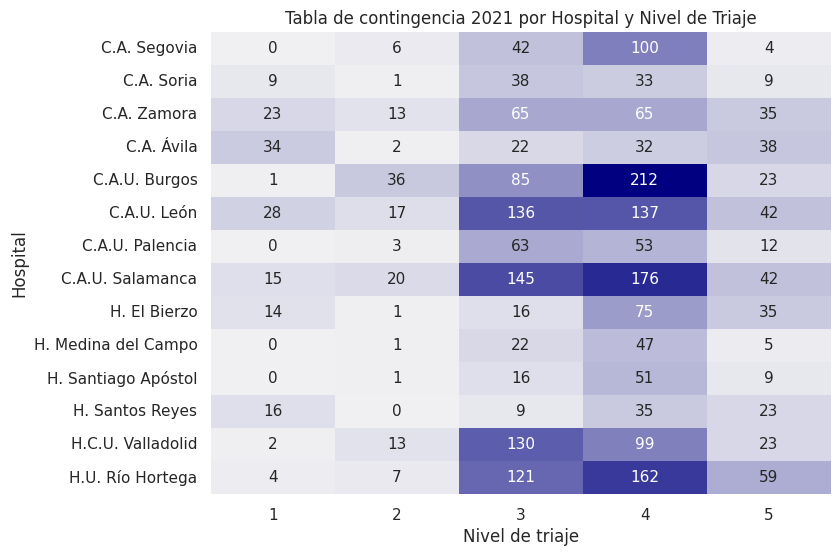

In [96]:
# Agrupar los datos y calcular la suma de Avg para cada combinación de Hospital y Nivel de triaje
grouped_df_2022 = df_2022.pivot_table(index='Hospital', columns='Nivel de triaje', values='Avg', aggfunc='sum', fill_value=0)

# Convertir los valores a enteros
grouped_df_2022 = grouped_df_2022.astype(int)

# Definir una paleta de colores en degradé descendente
cmap = sns.light_palette("navy", as_cmap=True)

# Graficar la tabla de contingencia con colores en degradé
plt.figure(figsize=(8, 6))
sns.heatmap(grouped_df_2022, annot=True, fmt="d", cmap=cmap, cbar=False)
plt.title('Tabla de contingencia 2021 por Hospital y Nivel de Triaje')
plt.xlabel('Nivel de triaje')
plt.ylabel('Hospital')
plt.show()

In [97]:
grouped_df_2022

Nivel de triaje,1,2,3,4,5
Hospital,,,,,
C.A. Segovia,0,6,42,100,4
C.A. Soria,9,1,38,33,9
C.A. Zamora,23,13,65,65,35
C.A. Ávila,34,2,22,32,38
C.A.U. Burgos,1,36,85,212,23
C.A.U. León,28,17,136,137,42
C.A.U. Palencia,0,3,63,53,12
C.A.U. Salamanca,15,20,145,176,42
H. El Bierzo,14,1,16,75,35


<Font color = 'blue'> Considerar mapa para el PBI

In [98]:
# Contar el número de urgencias atendidas
total_urgencias = nuevo_df['Fecha de atención'].count()

# Mostrar el resultado
print(f'El número total de urgencias atendidas es: {total_urgencias}')


El número total de urgencias atendidas es: 1914422


In [99]:
pip install plotly

In [100]:
import plotly.express as px

# Contar el número de hospitales por provincia
num_hospitales_por_provincia = nuevo_df.groupby('Provincia')['Hospital'].nunique().reset_index()
num_hospitales_por_provincia.columns = ['Provincia', 'Num_Hospitales']

# Agrupar los datos por provincia y sumar las urgencias
urgencias_por_provincia = nuevo_df.groupby('Provincia').size().reset_index(name='urgencias')

# DataFrame con las coordenadas de cada provincia
provincias = pd.DataFrame({
    'Provincia': ['Valladolid', 'Burgos', 'León', 'Salamanca', 'Zamora', 'Segovia', 'Palencia', 'Ávila', 'Soria'],
    'lat': [41.6525, 42.3439, 42.5987, 40.9632, 41.5036, 40.9429, 42.0095, 40.6566, 41.1469],
    'lon': [-4.7245, -3.6969, -5.5671, -5.6639, -5.7441, -4.1088, -4.5344, -4.7006, -2.4675]
})

# Unir los datos de urgencias con las coordenadas de cada provincia
provincias_urgencias = pd.merge(provincias, urgencias_por_provincia, on='Provincia', how='inner')

# Unir los datos de número de hospitales por provincia
provincias_urgencias = pd.merge(provincias_urgencias, num_hospitales_por_provincia, on='Provincia', how='inner')

# Ordenar las provincias por número de urgencias
provincias_urgencias_sorted = provincias_urgencias.sort_values(by='urgencias', ascending=False)

# Calcular el total de urgencias atendidas
total_urgencias = provincias_urgencias_sorted['urgencias'].sum()

# Visualizar el mapa con las urgencias por provincia
fig = px.scatter_mapbox(provincias_urgencias_sorted, lat="lat", lon="lon", hover_name="Provincia",
                        hover_data={"Provincia": False,
                                    "urgencias": ":.0f",
                                    "Num_Hospitales": ":.0f"},
                        color="urgencias",
                        color_continuous_scale=px.colors.sequential.Viridis,
                        size="urgencias",
                        zoom=5,
                        height=600,
                        size_max=25,
                        text="Provincia")

fig.update_layout(title='Número de Urgencias Atendidas por Provincia (2021 y 2022)')

# Agregar un cuadro de texto con las etiquetas de las provincias con más urgencias y el total
text_labels = f"<b>Total Urgencias: {total_urgencias:,}</b><br><br>"
for i, row in provincias_urgencias_sorted.iterrows():
    text_labels += f"{row['Provincia']}: {row['urgencias']:,} - {row['Num_Hospitales']:,} hospitales<br>"

fig.add_annotation(x=0.05, y=0.95, xref="paper", yref="paper", text=text_labels,
                   showarrow=False, align="left", bgcolor="white", bordercolor="black",
                   font=dict(size=12, color="black"), borderwidth=1)

fig.update_layout(mapbox_style="open-street-map")
fig.show()


## **3. ANÁLISIS PREDICTIVO**

####**3.1. MODELO SARIMA (Estacionalidad)**

El modelo SARIMA (Seasonal Autoregressive Integrated Moving Average) es una extensión del modelo ARIMA que incorpora elementos para manejar datos estacionales para predecir series temporales.

**Componentes del Modelo SARIMA**

**1. Componente No Estacional (ARIMA):**

- AR (Autoregresivo): Representa la relación entre una observación y un número de retrasos anteriores de la misma observación. El orden del componente AR se denota como p.

- I (Integrado): Representa el número de diferencias necesarias para hacer que la serie temporal sea estacionaria. El orden de la diferenciación se denota como d.

- MA (Media Móvil): Representa la relación entre una observación y un número de errores de predicción retrasados. El orden del componente MA se denota como
q.

**2. Componente Estacional:**

- SAR (Autoregresivo Estacional): Componente autoregresivo estacional (P).

- SI (Integrado Estacional): Es el orden de diferenciación estacional (D).

- SMA (Media Móvil Estacional): Es el promedio móvil estacional (Q).

- S (Periodo Estacional): El número de períodos en una temporada completa (s).

<ipython-input-101-0ebd89a3d86c>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



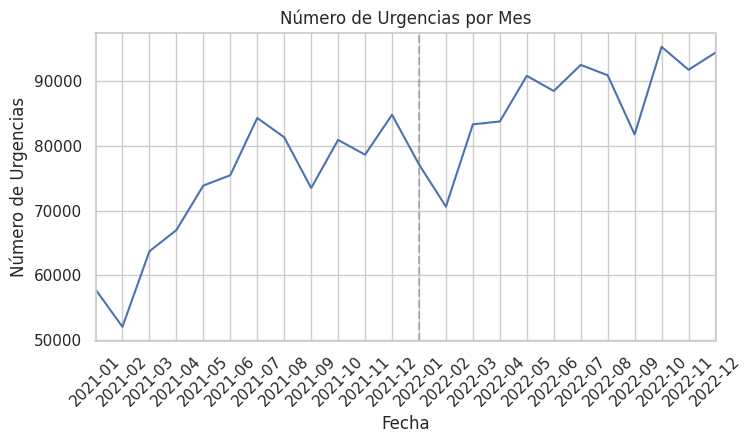

In [101]:
# PASO 1

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import plotly.graph_objs as go
import statsmodels.api as sm

# Convertimos la columna 'Fecha de atención' a tipo datetime
nuevo_df['Fecha de atención'] = pd.to_datetime(nuevo_df['Fecha de atención'])

# Creamos una copia
df_modelo = nuevo_df.copy()

# Establecemos 'Fecha de atención' como el índice del DataFrame temporal
df_modelo.set_index('Fecha de atención', inplace=True)

# Extraemos el número de urgencias por mes
urgencias_por_mes = df_modelo.resample('M').size()

# Graficamos la serie temporal por mes
plt.figure(figsize=(8, 4))
urgencias_por_mes.plot()
plt.title('Número de Urgencias por Mes')
plt.xlabel('Fecha')
plt.ylabel('Número de Urgencias')
plt.xticks(urgencias_por_mes.index, [month.strftime('%Y-%m') for month in urgencias_por_mes.index], rotation=45)

# Agregamos líneas verticales para indicar los límites de cada año
for year in range(2015, 2025):
    plt.axvline(pd.Timestamp(f'{year}-01-01'), color='gray', linestyle='--', alpha=0.5)

plt.show()

<Font Color='blue'>**Interpretación del Gráfico:**

<Font Color='blue'>**Tendencia General:**

<Font Color='blue'>El número de urgencias parece mostrar una tendencia creciente desde el principio de 2021 hasta el final de 2022. Aunque hay fluctuaciones, la línea general tiende a ir hacia arriba.

<Font Color='blue'>**Patrón Repetitivo:**

<Font Color='blue'>Observamos que en 2021, después de febrero, las urgencias aumentan significativamente hasta julio, luego hay una caída en sepyiembre y los picos máximos se alcanzan en octubre y diciembre.  
En 2022, vemos un patrón similar: una caída en febrero, un aumento hasta julio, una caída en agosto y septiembre y valores máximos en octubre y diciembre.

<Font Color='blue'>**Estacionalidad:**

<Font Color='blue'>Parece que hay un patrón estacional anual. Observamos que hay un ciclo que se repite cada 12 meses.
En ambos años (2021 y 2022), hay un picos en julio, octubre y diciembre y caídas en febrero y septiembre, lo que sugiere que estos patrones se repiten cada año.

<Font Color='blue'>**Conclusión:**

<Font Color='blue'>Los datos muestran estacionalidad con un ciclo de 12 meses. Esto es consistente con fenómenos estacionales donde ciertas épocas del año tienen más urgencias que otras, posiblemente debido a factores como el clima, vacaciones o epidemias estacionales (como la gripe), entre otros.

In [102]:
# PASO 2

# Creamos el modelo
arimaModel1 = SARIMAX(urgencias_por_mes, order=(0, 1, 0)).fit() # 1 diferencia

# Graficamos los residuos
fig = go.Figure()
fig.add_trace(go.Scatter(y=arimaModel1.resid.values, mode='lines+markers', line=dict(color='black'), name='Serie original'))
fig.show()

# Información de los parámetros
print(arimaModel1.params)

sigma2    4.607705e+07
dtype: float64


<Font Color='blue'>**Interpretación de Resultados:**

<Font Color='blue'>Sigma2 es la varianza de los residuos, que son las diferencias entre los valores observados y los valores predichos por el modelo.

<Font Color='blue'>En este caso específico, el valor 46077045.33 representa la estimación de la varianza del error en la serie temporal de urgencias por mes, calculada por el modelo SARIMA ajustado a los datos. Cuanto menor sea este valor, mejor será el ajuste del modelo a los datos, ya que indica que la mayoría de la variabilidad en los datos han sido capturados y que existe menor variabilidad no explicada por el modelo.

In [103]:
# PASO 3

# Establecemos estacionalidad 12 (anual)
arimaModel1 = SARIMAX(urgencias_por_mes, order=(0, 1, 0),seasonal_order=(0,1,0,12)).fit()

# Graficamos los residuos
fig = go.Figure()
fig.add_trace(go.Scatter(y=arimaModel1.resid.values, mode='lines+markers', line=dict(color='black'), name='Serie original'))
fig.show()

# Información de los parámetros
print(arimaModel1.params)

sigma2    9.295670e+06
dtype: float64


<Font Color='blue'>**Interpretación de Resultados:**

<Font Color='blue'>Observamos un gran pico al inicio del gráfico. Esto puede indicar un mal ajuste inicial del modelo aunque los modelos SARIMA suelen tener un periodo de "aclimatación" al comienzo, donde los residuos suelen ser mayores.

<Font Color='blue'>El modelo capta bien las variaciones en los datos (puntos alrededor del 0) a excepción del lag 12, donde observamos una gran diferencia.

<Font Color='blue'>También se observa que al establecer estacionalidad 12 al modelo, Sigma2 disminuye significativamente (9.295.669 < 46.077.045), lo que indica una mejora del ajuste del modelo a los datos.

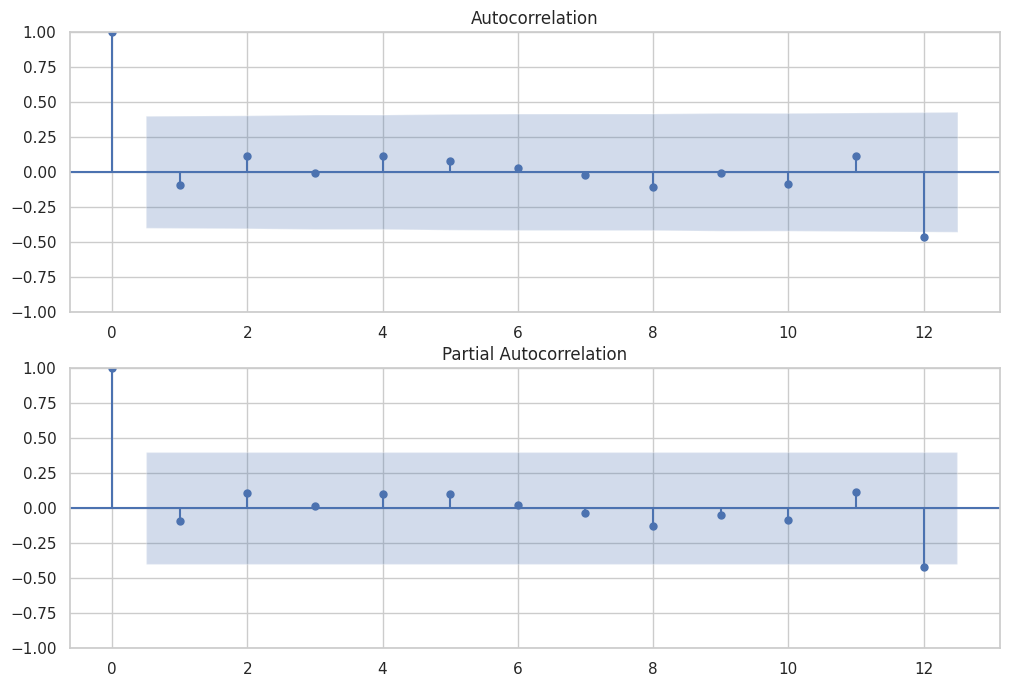

In [104]:
# PASO 4: GRAFICO DE CORRELACIÓN Y AUTOCORRELACIÓN

# 12 lags porque tenemos 24 observaciones (lags<observaciones)
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(arimaModel1.resid.values, lags=12, ax=ax1) # Plot de autocorrelación
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(arimaModel1.resid.values, lags=12, ax=ax2) # Plot de autocorrelación parcial

<Font Color='blue'>**Interpretación de Resultados:**

<Font Color='blue'> Se observa que prácticamente todos los lags están dentro del intervalo de confianza (sombreado azul) a excepción del lag 12 que sobresale ligeramente del intervalo. En líneas generales, arroja buenos resultados.


In [105]:
# PASO 5

# Probamos modelo con AR (Autorregresivo)
arimaModeltest1 = SARIMAX(urgencias_por_mes, order=(1, 1, 0),seasonal_order=(0,1,0,12)).fit()
print(arimaModeltest1.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   24
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -103.932
Date:                            Fri, 28 Jun 2024   AIC                            211.864
Time:                                    18:04:50   BIC                            212.660
Sample:                                01-31-2021   HQIC                           211.362
                                     - 12-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0109      0.419      0.026      0.979      -0.810       0.832
sigma2      1.028e+07    5.6e+06   

El **componente AR** modela la relación entre una observación y un número de rezagos (valores anteriores) de la misma observación.

In [106]:
# PASO 6

# Probamos modelo con MA (Promedio Móvil)
arimaModeltest2 = SARIMAX(urgencias_por_mes, order=(0, 1, 1),seasonal_order=(0,1,0,12)).fit()
print(arimaModeltest2.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                   24
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                -104.221
Date:                             Fri, 28 Jun 2024   AIC                            212.443
Time:                                     18:04:51   BIC                            213.239
Sample:                                 01-31-2021   HQIC                           211.941
                                      - 12-31-2022                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0110      0.549      0.020      0.984      -1.066       1.088
sigma2      1.341e+07   9.0

El **componente MA** modela la relación entre una observación y un número de errores pasados (residuos).

In [107]:
# PASO 7

# Probamos modelo con AR + MA
arimaModeltest3 = SARIMAX(urgencias_por_mes, order=(1, 1, 1),seasonal_order=(0,1,0,12)).fit()
print(arimaModeltest3.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                   24
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 12)   Log Likelihood                -104.095
Date:                             Fri, 28 Jun 2024   AIC                            214.190
Time:                                     18:04:51   BIC                            215.384
Sample:                                 01-31-2021   HQIC                           213.438
                                      - 12-31-2022                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6176      2.008     -0.308      0.758      -4.553       3.317
ma.L1          0.6411      

<Font Color='blue'>**Resultado test:**

<Font Color='blue'>Un valor más bajos de AIC y BIC indican un mejor ajuste del modelo a los datos, ya que significa que el modelo asigna una mayor probabilidad a los datos observados.

<Font Color='blue'>arimaModeltest1 muestra un valores más bajos de AIC (211.864) y BIC (212.660) que los arimaModeltest2 (AIC 212.443 / BIC 213.239) y arimaModeltest3 (AIC 214.190 / BIC 215.384), por lo que **arimaModeltest1 es el modelo escogido.**  

In [108]:
# PASO 8

# Graficamos los residuos de arimamodeltest1
fig = go.Figure()
fig.add_trace(go.Scatter(y=arimaModeltest1.resid.values, mode='lines+markers', line=dict(color='black'), name='Serie original'))
fig.show()
print(arimaModeltest1.params)

ar.L1     1.094922e-02
sigma2    1.027672e+07
dtype: float64


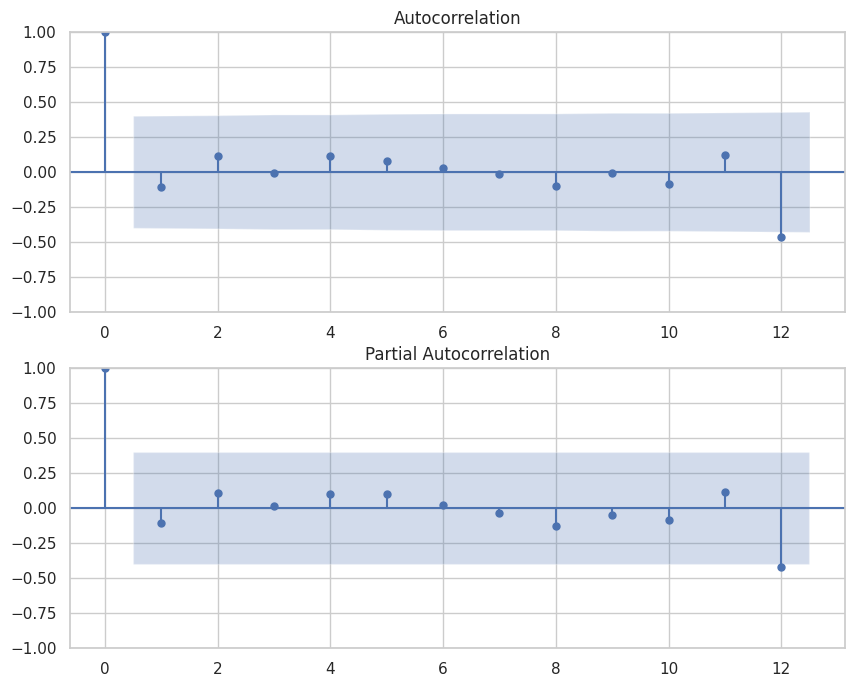

In [109]:
# PASO 9: # GRAFICO DE CORRELACIÓN Y AUTOCORRELACIÓN DE arimaModelTest1

# 12 lags porque tenemos 24 observaciones (lags<observaciones)
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(arimaModeltest1.resid.values, lags=12, ax=ax1) # Plot de autocorrelación
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(arimaModeltest1.resid.values, lags=12, ax=ax2) # Plot de autocorrelación parcial

In [110]:
# PASO 10

# Probamos modelo con AR (Autorregresivo) en la parte de estacionalidad
arimaModeltest4 = SARIMAX(urgencias_por_mes, order=(1, 1, 0),seasonal_order=(1,1,0,12)).fit()
print(arimaModeltest4.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   24
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -103.923
Date:                            Fri, 28 Jun 2024   AIC                            213.846
Time:                                    18:04:54   BIC                            215.040
Sample:                                01-31-2021   HQIC                           213.094
                                     - 12-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0118      0.548      0.022      0.983      -1.062       1.086
ar.S.L12      -0.0214      0.224   

In [111]:
# PASO 11

# Probamos modelo con MA en la parte de estacionalidad
arimaModeltest5 = SARIMAX(urgencias_por_mes, order=(1, 1, 0),seasonal_order=(0,1,1,12)).fit()
print(arimaModeltest5.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                   24
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -103.923
Date:                              Fri, 28 Jun 2024   AIC                            213.846
Time:                                      18:04:54   BIC                            215.040
Sample:                                  01-31-2021   HQIC                           213.093
                                       - 12-31-2022                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0118      0.549      0.022      0.983      -1.064       1.087
ma.S.L12      -0.02

In [112]:
# PASO 12

# Probamos modelo con AR +MA en la parte de estacionalidad
arimaModeltest6 = SARIMAX(urgencias_por_mes, order=(1, 1, 0),seasonal_order=(1,1,1,12)).fit()
print(arimaModeltest6.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                   24
Model:             SARIMAX(1, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -103.923
Date:                              Fri, 28 Jun 2024   AIC                            215.846
Time:                                      18:04:55   BIC                            217.437
Sample:                                  01-31-2021   HQIC                           214.843
                                       - 12-31-2022                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0118      0.551      0.022      0.983      -1.068       1.092
ar.S.L12      -0.01

**<Font Color='blue'>Resultado test:**

- **<Font Color='blue'>Criterio de Información de Akaike (AIC):** Es una medida de la calidad relativa de un modelo estadístico para un conjunto dado de datos. Cuanto menor sea el valor de AIC, mejor será el modelo. Los modelos 4 y 5 muestran valores menores (213.846) que el modelo 6 (215.846).
- **<Font Color='blue'>Criterio de Información Bayesiana (BIC):** Similar al AIC, pero penaliza más fuertemente los modelos con más parámetros. Cuanto menor sea el valor de BIC, mejor será el modelo. Modelos 4 y 5 obtienen 215.040 vs 217.437 del modelo 6.
- **<Font Color='blue'>HQIC (Criterio de Información Hannan-Quinn):** El HQIC penaliza la complejidad del modelo, al igual que el BIC, pero también tiene en cuenta el tamaño de la muestra, al igual que el AIC.En general, modelos con valores de HQIC más bajos son preferibles, lo que indica un mejor ajuste del modelo dados los datos disponibles. El modelo 5 tiene un valor ligeramente más bajo que el modelo 4 (213.093 vs 213.094).

<Font Color='blue'>Por los motivos expuestos anteriormente, escogemos **arimaModeltest5** como mejor modelo.

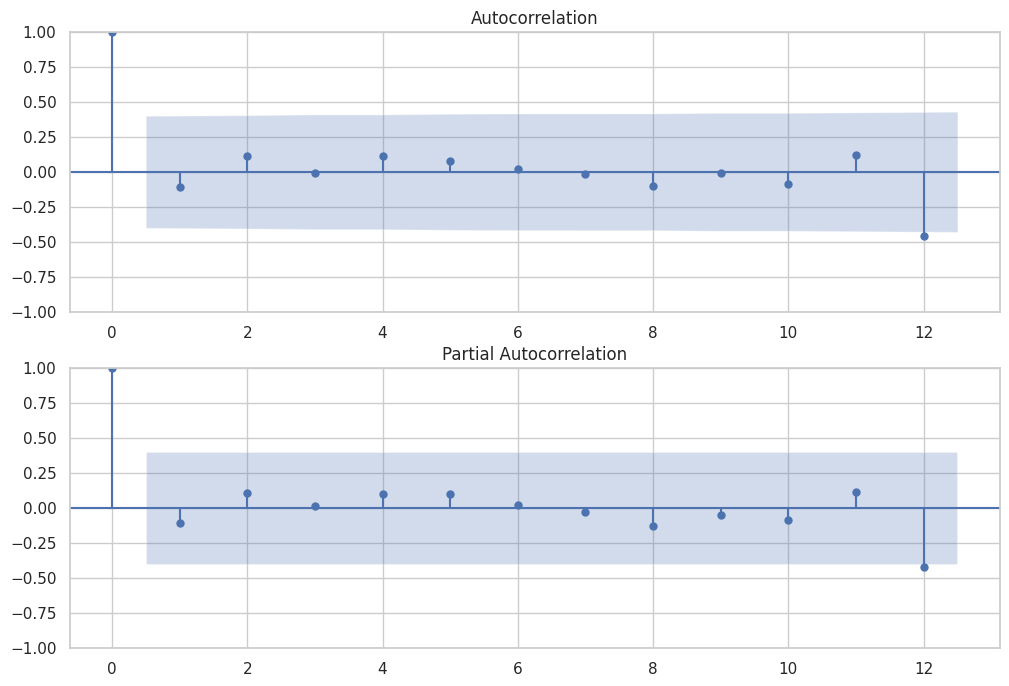

In [113]:
# PASO 13: GRAFICO DE CORRELACIÓN Y AUTOCORRELACIÓN de arimaModelTest5

# 12 lags porque tenemos 24 observaciones (lags<observaciones)
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(arimaModeltest5.resid.values, lags=12, ax=ax1) # Plot de autocorrelación
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(arimaModeltest5.resid.values, lags=12, ax=ax2) # Plot de autocorrelación parcial

<Font Color='blue'>El gráfico muestra que todos casi todos los lags están dentro del intervalo de confianza (a excepción del lag 12 que sobresale mínimamente), lo que indica que el modelo ha capturado bien los datos y se puede pasar a realizar pronóstico.

In [114]:
# PASO 14: MODELO FINAL

pronostico = SARIMAX(urgencias_por_mes, order=(1, 1, 0),seasonal_order=(0,1,1,12)).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



In [115]:
# PASO 15: PRONÓSTICO URGENCIAS A 24 MESES (2023 y 2024)

print(pronostico.forecast(24))

2023-01-31     87913.767859
2023-02-28     81399.513408
2023-03-31     94108.931029
2023-04-30     94612.017705
2023-05-31    101672.246794
2023-06-30     99405.093356
2023-07-31    103546.717497
2023-08-31    101915.001224
2023-09-30     92783.631305
2023-10-31    106213.182064
2023-11-30    102688.375845
2023-12-31    105425.035103
2024-01-31     98886.675498
2024-02-29     92372.431383
2024-03-31    105081.849126
2024-04-30    105584.935804
2024-05-31    112645.164893
2024-06-30    110378.011455
2024-07-31    114519.635596
2024-08-31    112887.919323
2024-09-30    103756.549404
2024-10-31    117186.100163
2024-11-30    113661.293944
2024-12-31    116397.953202
Freq: M, Name: predicted_mean, dtype: float64


In [116]:
# PASO 16: RECUENTO PREDICCIONES TOTALES PARA 2023 y 2024.

# Calculamos las predicciones para los próximos dos años
predicciones = pronostico.forecast(steps=24)

# Filtramos las predicciones para 2023 y 2024
predicciones_2023 = predicciones[predicciones.index.year == 2023]
predicciones_2024 = predicciones[predicciones.index.year == 2024]

# Sumamos las predicciones para obtener el total de urgencias para 2023 y 2024
total_urgencias_2023 = round(predicciones_2023.sum())
total_urgencias_2024 = round(predicciones_2024.sum())

# Formateamos los resultados para separar los miles con puntos
total_urgencias_2023_formateado = '{:,}'.format(total_urgencias_2023).replace(',', '.')
total_urgencias_2024_formateado = '{:,}'.format(total_urgencias_2024).replace(',', '.')

print("Total de urgencias previstas para 2023:", total_urgencias_2023_formateado)
print("Total de urgencias previstas para 2024:", total_urgencias_2024_formateado)

Total de urgencias previstas para 2023: 1.171.684
Total de urgencias previstas para 2024: 1.303.359


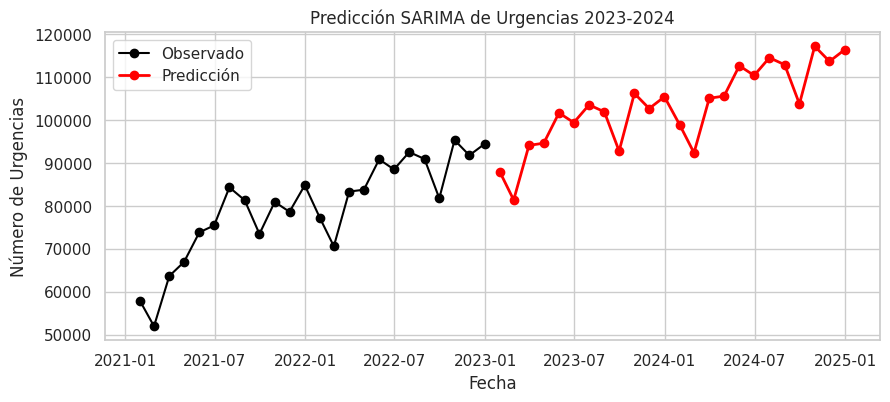

In [117]:
# PASO 17: GRÁFICO DE PREDICCIONES

# Predecimos los dos próximos años
prediccion = pronostico.get_forecast(steps=24)
intervalo_confianza = prediccion.conf_int()

# Graficamos
plt.figure(figsize=(10, 4))
plt.plot(urgencias_por_mes.index, urgencias_por_mes, label='Observado', color='black', marker='o')
plt.plot(prediccion.predicted_mean.index, prediccion.predicted_mean, label='Predicción', color='red', linewidth=2, marker='o')
plt.title('Predicción SARIMA de Urgencias 2023-2024')
plt.xlabel('Fecha')
plt.ylabel('Número de Urgencias')
plt.legend()
plt.grid(True)
plt.show()

**<Font Color='blue'>MÉTRICAS DEL MODELO ESCOGIDO**

<Font Color='blue'>El SSE (Sum of Squared Errors) representa la suma de los cuadrados de los errores de predicción, donde los errores son las diferencias entre los valores observados y los valores predichos por el modelo.Cuanto menor es el valor, mejor es el modelo.

In [118]:
print("Suma Errores Cuadráticos (SSE):", pronostico.sse)
print("Criterio de Información Akaike (AIC):", pronostico.aic)
print("Criterio de Información Bayesiana (BIC):", pronostico.bic)

Suma Errores Cuadráticos (SSE): 7507409688.258658
Criterio de Información Akaike (AIC): 213.84582691202766
Criterio de Información Bayesiana (BIC): 215.03951273042279


**VALIDACIÓN ADICIONAL MODELO SARIMA -DATOS REALES VS PREDICCIONES-**

Como se dispone de los datos reales de 24 meses, se realiza modelo SARIMA con un dataframe que incluye los datos de Enero de 2021 a Junio de 2022 (18 meses) para predecir los últimos 6 meses del año 2022 y poder contrastar las predicciones obtenidas.

In [119]:
# SEPARACIÓN DEL DATASET

# Filtramos los datos desde enero de 2021 hasta junio de 2022
fecha_inicio = pd.Timestamp('2021-01-01')
fecha_fin = pd.Timestamp('2022-06-30')
nuevo_df_filtrado = nuevo_df[(nuevo_df['Fecha de atención'] >= fecha_inicio) & (nuevo_df['Fecha de atención'] <= fecha_fin)]

nuevo_df_filtrado.head(5)

,Fecha de atención,Día de la semana,Hora,Nivel de triaje,Zona Básica de Salud,Ámbito de procedencia,Hospital,Área,Provincia,Edad,Sexo,Mes,Año,Turnos,HRxTurno,grupo_etario
90296,2022-01-09,Dom,1900-01-01 20:54:00,3,Z.B.S. Olmedo,Rural,H. Medina del Campo,Valladolid Este,Valladolid,37,Hombre,Ene,2022,Tarde,7,Adultos
90297,2022-01-16,Dom,1900-01-01 19:30:00,3,Z.B.S. Olmedo,Rural,H.C.U. Valladolid,Valladolid Este,Valladolid,26,Hombre,Ene,2022,Tarde,7,Jóvenes
90298,2022-01-20,Jue,1900-01-01 00:03:00,3,Z.B.S. Olmedo,Rural,H. Medina del Campo,Valladolid Este,Valladolid,69,Hombre,Ene,2022,Noche,10,Tercera Edad
90299,2022-01-10,Lun,1900-01-01 17:41:00,4,Z.B.S. Olmedo,Rural,H. Medina del Campo,Valladolid Este,Valladolid,59,Mujer,Ene,2022,Tarde,7,Adultos
90300,2022-01-22,Sáb,1900-01-01 05:12:00,4,Z.B.S. Olmedo,Rural,H. Medina del Campo,Valladolid Este,Valladolid,57,Hombre,Ene,2022,Noche,10,Adultos


<ipython-input-120-7019a5bf14ee>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



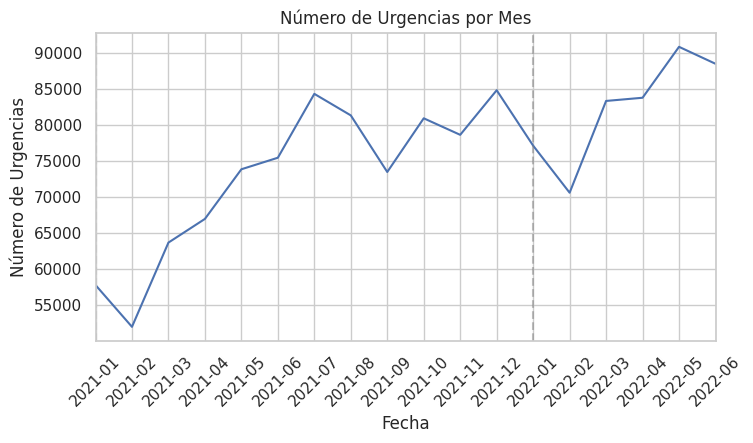

In [120]:
# PASO 1

# Convertimos la columna 'Fecha de atención' a tipo datetime
nuevo_df_filtrado['Fecha de atención'] = pd.to_datetime(nuevo_df['Fecha de atención'])

# Creamos una copia del DataFrame
df_sarima18 = nuevo_df_filtrado.copy()

# Establecemos 'Fecha de atención' como el índice del DataFrame
df_sarima18.set_index('Fecha de atención', inplace=True)

# Extraemos el número de urgencias por mes
urgencias_por_mes1 = df_sarima18.resample('M').size()

# Visualizamos la serie temporal por mes
plt.figure(figsize=(8, 4))
urgencias_por_mes1.plot()
plt.title('Número de Urgencias por Mes')
plt.xlabel('Fecha')
plt.ylabel('Número de Urgencias')

plt.xticks(urgencias_por_mes1.index, [month.strftime('%Y-%m') for month in urgencias_por_mes1.index], rotation=45)

for year in range(2015, 2025):
    plt.axvline(pd.Timestamp(f'{year}-01-01'), color='gray', linestyle='--', alpha=0.5)

plt.show()

In [121]:
# PASO 2

# Creamos el modelo
sarimaModel1 = SARIMAX(urgencias_por_mes1, order=(0, 1, 0)).fit() # 1 diferencia

# Graficamos los residuos
fig = go.Figure()
fig.add_trace(go.Scatter(y=sarimaModel1.resid.values, mode='lines+markers', line=dict(color='black'), name='Serie original'))
fig.show()

# Información de los parámetros
print(sarimaModel1.params)

sigma2    4.440359e+07
dtype: float64


In [122]:
# PASO 3

# Establecemos estacionalidad 12
sarimaModel1 = SARIMAX(urgencias_por_mes1, order=(0, 1, 0),seasonal_order=(0,1,0,12)).fit()

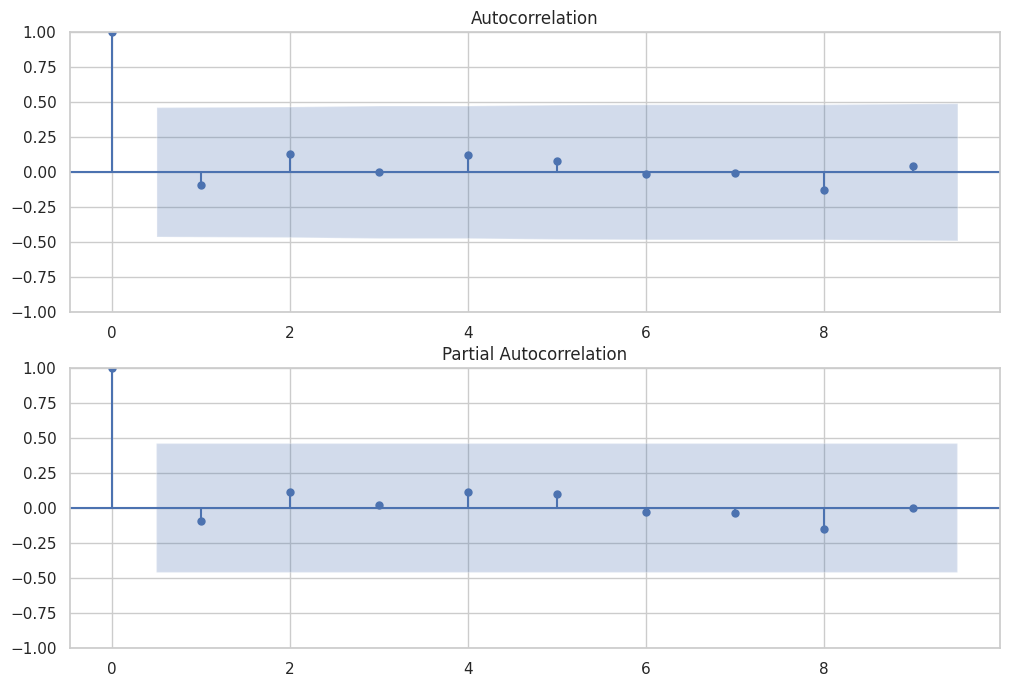

In [123]:
# PASO 4: GRAFICO DE CORRELACIÓN Y AUTOCORRELACIÓN

# 9 lags porque tenemos 18 observaciones (lags<observaciones)
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sarimaModel1.resid.values, lags=9, ax=ax1) # Plot de autocorrelación
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sarimaModel1.resid.values, lags=9, ax=ax2) # Plot de autocorrelación parcial

<Font Color='blue'>En los gráficos de autocorrelación y autocorrelación parcial, todos los lags se encuentran dentro del intervalo de confianza, lo que denota un buen ajuste del modelo.

In [124]:
# PASO 5

# Probamos modelo con AR (Autorregresivo)
sarimaModel2 = SARIMAX(urgencias_por_mes1, order=(1, 1, 0),seasonal_order=(0,1,0,12)).fit()
print(sarimaModel2.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   18
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                 -45.668
Date:                            Fri, 28 Jun 2024   AIC                             95.336
Time:                                    18:05:11   BIC                             94.555
Sample:                                01-31-2021   HQIC                            93.240
                                     - 06-30-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0125      1.037      0.012      0.990      -2.021       2.046
sigma2      5.581e+06   5.03e+06   

In [125]:
# PASO 6

# Probamos modelo con MA (Promedio Móvil)
sarimaModel3 = SARIMAX(urgencias_por_mes1, order=(0, 1, 1),seasonal_order=(0,1,0,12)).fit()
print(sarimaModel3.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                   18
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                 -46.463
Date:                             Fri, 28 Jun 2024   AIC                             96.926
Time:                                     18:05:12   BIC                             96.145
Sample:                                 01-31-2021   HQIC                            94.830
                                      - 06-30-2022                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0115      2.657      0.004      0.997      -5.196       5.219
sigma2      1.265e+07   1.5

<Font Color='blue'>Elegimos sarimaModel2 por obtener valores AIC (95.336) y BIC (94.555) más bajos que sarimaModel3 (AIC 96.926 y BIC 96.145).

In [126]:
# PASO 7

# Graficamos los residuos
fig = go.Figure()
fig.add_trace(go.Scatter(y=sarimaModel2.resid.values, mode='lines+markers', line=dict(color='black'), name='Serie original'))
fig.show()

# Información de los parámetros
print(sarimaModel2.params)

ar.L1     1.254688e-02
sigma2    5.581393e+06
dtype: float64


<Font Color='blue'> En el gráfico se obsra que todos los datos están alrededor de 0 a excepción del punto 12 que presenta un gran pico, pudiendo no estar capturando bien los datos en ese punto.

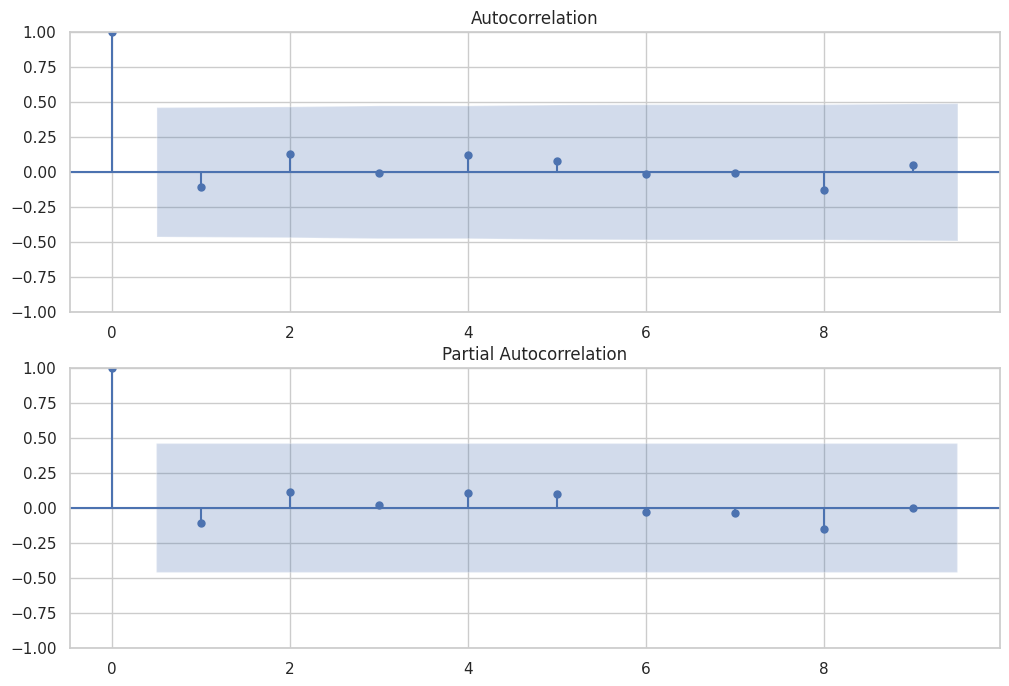

In [127]:
# PASO 8: GRAFICO DE CORRELACIÓN Y AUTOCORRELACIÓN sarimaModel2

# 9 lags porque tenemos 18 observaciones (lags<observaciones)
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sarimaModel2.resid.values, lags=9, ax=ax1) # Plot de autocorrelación
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sarimaModel2.resid.values, lags=9, ax=ax2) # Plot de autocorrelación parcial

In [128]:
# PASO 9

# Probamos modelo con AR (Autorregresivo) en la parte de estacionalidad
sarimaModel4 = SARIMAX(urgencias_por_mes1, order=(1, 1, 0),seasonal_order=(1,1,0,12)).fit()
print(sarimaModel4.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   18
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                 -45.668
Date:                            Fri, 28 Jun 2024   AIC                             97.336
Time:                                    18:05:15   BIC                             96.164
Sample:                                01-31-2021   HQIC                            94.191
                                     - 06-30-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0128      0.997      0.013      0.990      -1.941       1.967
ar.S.L12      -0.0039      0.519   

In [129]:
# PASO 10

# Probamos modelo con MA en la parte de estacionalidad
sarimaModel5= SARIMAX(urgencias_por_mes1, order=(1, 1, 0),seasonal_order=(0,1,1,12)).fit()
print(sarimaModel5.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                   18
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                 -45.668
Date:                              Fri, 28 Jun 2024   AIC                             97.336
Time:                                      18:05:15   BIC                             96.164
Sample:                                  01-31-2021   HQIC                            94.191
                                       - 06-30-2022                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0129      0.998      0.013      0.990      -1.943       1.969
ma.S.L12      -0.00

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



In [130]:
# PASO 11

# Probamos modelo con AR +MA en la parte de estacionalidad
sarimaModel6 = SARIMAX(urgencias_por_mes1, order=(1, 1, 0),seasonal_order=(1,1,1,12)).fit()
print(sarimaModel6.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                   18
Model:             SARIMAX(1, 1, 0)x(1, 1, [1], 12)   Log Likelihood                 -45.668
Date:                              Fri, 28 Jun 2024   AIC                             99.336
Time:                                      18:05:15   BIC                             97.773
Sample:                                  01-31-2021   HQIC                            95.143
                                       - 06-30-2022                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0129      1.026      0.013      0.990      -1.997       2.023
ar.S.L12       0.01

<Font Color='blue'> **Resultado:**
 En este caso, se descarta sarimaModel6 por tener valores más altos de BIC y AIC. Los modelos sarimaModel4 y sarimaModel5 presentan los mismos valores de AIC (97.336), BIC (96.164), HQIC (94.161) y Log Likelihood (-45.668), por lo que resulta indiferente el modelo a escoger. Finalmente elegimos sarimaModel5.

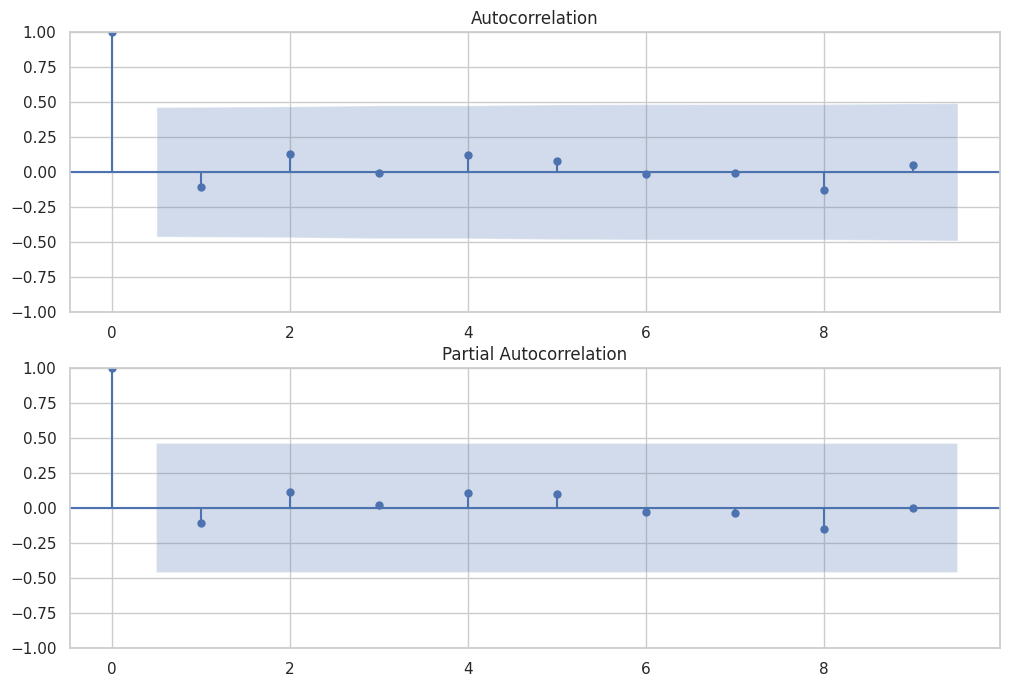

In [131]:
# PASO 12: GRAFICO DE CORRELACIÓN Y AUTOCORRELACIÓN DE sarimaModel5

# 9 lags porque tenemos 18 observaciones (lags<observaciones)
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sarimaModel5.resid.values, lags=9, ax=ax1) # Plot de autocorrelación
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sarimaModel5.resid.values, lags=9, ax=ax2) # Plot de autocorrelación parcial

<Font Color='blue'> Todos los lags se encuentran dentro del intervalo de confianza y cercanos a 0, por lo que podemos pasar a realizar predicciones.

In [132]:
# PASO 13

# MODELO FINAL:

pronostico_18meses = SARIMAX(urgencias_por_mes1, order=(1, 1, 0),seasonal_order=(0,1,1,12)).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



In [133]:
# PASO 14

# PRONÓSTICO URGENCIAS A 6 MESES (julio 2022-diciembre 2022)

pronostico = pronostico_18meses.forecast(6)
pronostico_redondeado = pronostico.round(0)
pronostico_redondeado.index = pronostico_redondeado.index.strftime('%Y-%m')

def formatear_pronostico(numero):
    return '{:,.0f}'.format(numero).replace(',', '.')

pronostico_formateado = pronostico_redondeado.apply(formatear_pronostico)

print("Predicción Urgencias por Mes Julio 2022-Diciembre 2022:")

print(pronostico_formateado)

Predicción Urgencias por Mes Julio 2022-Diciembre 2022:
2022-07    97.289
2022-08    94.309
2022-09    86.479
2022-10    93.906
2022-11    91.619
2022-12    97.787
Name: predicted_mean, dtype: object


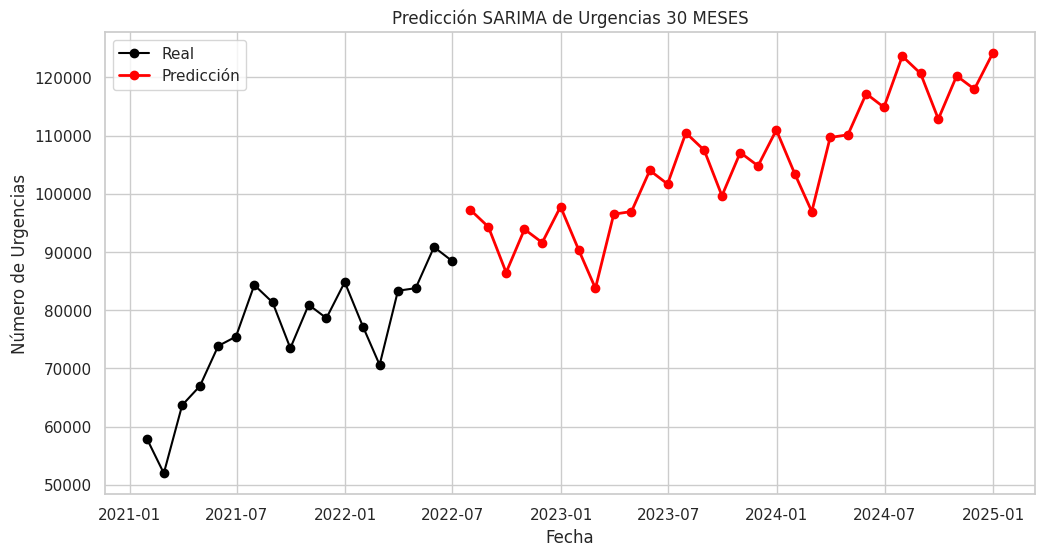

In [134]:
# PASO 15: GRÁFICO DE PREDICCIONES

# Predicción para los próximos 30 meses (6 meses de 2022 + 2023 + 2024)
prediccion3 = pronostico_18meses.get_forecast(steps=30)
intervalo_confianza = prediccion3.conf_int()

# Visualizamos la predicción
plt.figure(figsize=(12, 6))
plt.plot(urgencias_por_mes1.index, urgencias_por_mes1, label='Real', color='black', marker='o')
plt.plot(prediccion3.predicted_mean.index, prediccion3.predicted_mean, label='Predicción', color='red', linewidth=2, marker='o')
plt.title('Predicción SARIMA de Urgencias 30 MESES')
plt.xlabel('Fecha')
plt.ylabel('Número de Urgencias')
plt.legend()
plt.grid(True)
plt.show()

<Font Color='blue'> En el gráfico se puede observar que las predicciones realizadas para 2023 y 2024 siguen una tendencia creciente y que el modelo ha conseguido capturar los patrones existentes los años anteriores, donde en julio, octubre y diciembre se producen los mayores picos y en febrero y septiembre las mayores caídas.

In [135]:
# URGENCIAS REALES 2021 y 2022
# Visualizamos los datos reales de 2021 y 2022 para comparar con las
# predicciones realizadas de los últimos 6 meses de 2022.

# Formateamos números con separador de miles
def formatear_numero(numero):
    return '{:,.0f}'.format(numero).replace(',', '.')

nuevo_df['Fecha de atención'] = pd.to_datetime(nuevo_df['Fecha de atención'])

# Contamos urgencias por mes
nuevo_df['Mes'] = nuevo_df['Fecha de atención'].dt.to_period('M')
recuento_urgencias_por_mes = nuevo_df.groupby('Mes').size()

# Filtramos los años 2021 y 2022
urgencias_2021_2022 = recuento_urgencias_por_mes.loc['2021':'2022']

# Calculamos los totales de urgencias reales para 2021 y 2022
total_urgencias_2021 = urgencias_2021_2022.loc['2021'].sum()
total_urgencias_2022 = urgencias_2021_2022.loc['2022'].sum()

# Calculamos el total conjunto de los dos años
total_conjunto = total_urgencias_2021 + total_urgencias_2022

# Creamos un DataFrame con las fechas (año y mes) y los valores reales de las urgencias por mes para 2021 y 2022
urgencias_reales_2021_2022 = pd.DataFrame({
    'Fecha': urgencias_2021_2022.index.astype(str),  # Convertimos a string para eliminar el día
    'Urgencias Reales': urgencias_2021_2022.values
})

# Formateamos las cifras con separador de miles para cada mes
urgencias_reales_2021_2022['Urgencias Reales'] = urgencias_reales_2021_2022['Urgencias Reales'].apply(formatear_numero)

# Agregamos una fila para el total de 2021
urgencias_reales_2021_2022.loc[len(urgencias_reales_2021_2022)] = ['Total 2021', formatear_numero(total_urgencias_2021)]

# Agregamos una fila para el total de 2022
urgencias_reales_2021_2022.loc[len(urgencias_reales_2021_2022)] = ['Total 2022', formatear_numero(total_urgencias_2022)]

# Agregamos una fila para el total conjunto de los dos años
urgencias_reales_2021_2022.loc[len(urgencias_reales_2021_2022)] = ['Total 2021 y 2022', formatear_numero(total_conjunto)]

# Tabla de urgencias reales para 2021 y 2022
print("Urgencias Reales Atendidas por Mes para 2021 y 2022:")
print(urgencias_reales_2021_2022)

Urgencias Reales Atendidas por Mes para 2021 y 2022:
                Fecha Urgencias Reales
0             2021-01           57.797
1             2021-02           51.994
2             2021-03           63.687
3             2021-04           66.972
4             2021-05           73.862
5             2021-06           75.463
6             2021-07           84.329
7             2021-08           81.340
8             2021-09           73.484
9             2021-10           80.936
10            2021-11           78.641
11            2021-12           84.829
12            2022-01           77.140
13            2022-02           70.608
14            2022-03           83.345
15            2022-04           83.788
16            2022-05           90.855
17            2022-06           88.503
18            2022-07           92.544
19            2022-08           90.941
20            2022-09           81.778
21            2022-10           95.343
22            2022-11           91.790
23         

<ipython-input-135-322a0dd370b7>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-135-322a0dd370b7>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**MAPE**

El MAPE (Mean Absolute Percentage Error, Error porcentual absoluto medio) en el contexto de un modelo SARIMA (Seasonal Autoregressive Integrated Moving Average) se refiere a una métrica utilizada para evaluar la precisión de las predicciones del modelo en relación con los valores observados en la serie temporal.

In [136]:
# CÁLCULO DEL MAPE

# PRONÓSTICO URGENCIAS A 6 MESES (julio 2022-diciembre 2022)

pronostico3 = pronostico_18meses.forecast(steps=6)
pronostico_redondeado = pronostico3.round(0)
pronostico_redondeado.index = pronostico_redondeado.index.strftime('%Y-%m')

def formatear_pronostico(numero):
    return '{:,.0f}'.format(numero).replace(',', '.')

pronostico_formateado = pronostico_redondeado.apply(formatear_pronostico)

print("Predicción Urgencias por Mes Julio 2022-Diciembre 2022:")
print(pronostico_formateado)

# Valores reales para el período julio 2022 - diciembre 2022
valores_reales = pd.Series([92544, 90941, 81778, 95343, 91790, 94453],
                           index=pd.date_range(start='2022-07-01', periods=6, freq='M'))

# Calculamos el MAPE
def calcular_mape(valores_reales, pronostico):
    return np.mean(np.abs((valores_reales - pronostico3) / valores_reales)) * 100

# Alineacón de valores reales y pronóstico
pronostico_alineado = pronostico_redondeado.reindex(valores_reales.index)

# Calcular el MAPE
mape = calcular_mape(valores_reales, pronostico_alineado)

print(f"El MAPE del modelo SARIMA es: {mape:.2f}%")

Predicción Urgencias por Mes Julio 2022-Diciembre 2022:
2022-07    97.289
2022-08    94.309
2022-09    86.479
2022-10    93.906
2022-11    91.619
2022-12    97.787
Name: predicted_mean, dtype: object
El MAPE del modelo SARIMA es: 3.30%


<Font Color='blue'> **Resultado:**

<Font Color='blue'>Un MAPE más bajo indica que las predicciones del modelo SARIMA son más precisas en relación con los datos reales.

<Font Color='blue'>Un MAPE del 0% indica que no hay error en las predicciones.

<Font Color='blue'>Un MAPE del 100% indica que las predicciones son, en promedio, tan grandes como los valores reales (lo cual generalmente no es deseable).

<Font Color='blue'>Nuestro modelo SARIMA arroja un MAPE del 3,30%, lo cual que indica una muy buena precisión entre predicciones y valores reales.


###**3.2. ALISADO TRIPE EXPONENCIAL**

El alisado triple exponencial (Holt-Winters) es una técnica avanzada de suavizado utilizado en el análisis de series temporales para pronosticar valores futuros. Este método extiende el alisado exponencial simple y doble al introducir componentes adicionales para capturar la tendencia y la estacionalidad de los datos. El modelo tiene en cuenta 3 componentes principales: Tendencia, Nivel y Estacionalidad.

**Alisado Triple Exponencial Aditivo:**

La estacionalidad se ajusta un componente de estacionalidad que se suma a los datos.

**Alisado Triple Exponencial Multiplicativo:**

La estacionalidad se ajusta un componente de estacionalidad que se multiplica a los datos.

In [137]:
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.statespace.exponential_smoothing import ExponentialSmoothingResults


# Creamos una copia del DataFrame original
df_alisado = nuevo_df.copy()

# Establecemos 'Fecha de atención' como el índice del DataFrame temporal
df_alisado.set_index('Fecha de atención', inplace=True)

# Extraemos el número de urgencias por mes
urgencias_por_mes = df_alisado.resample('M').size()

# Visualizamos la serie temporal por mes
fig = go.Figure()
fig.add_trace(go.Scatter(y=urgencias_por_mes,
                         mode='lines+markers',
                         name='Urgencias por Mes'))
fig.update_layout(title='Número de Urgencias por Mes',
                  xaxis_title='Fecha',
                  yaxis_title='Número de Urgencias')
fig.show()

# Modelo de Holt-Winters Aditivo con estacionalidad anual

HoltWinters_aditivo = ExponentialSmoothing(
    urgencias_por_mes,
    seasonal_periods=12,
    trend="add",
    seasonal="add",
    initialization_method="estimated",
).fit()

print(HoltWinters_aditivo.summary())

# Pronóstico del modelo aditivo
forecast_aditivo = HoltWinters_aditivo.forecast(24)

# Modelo de Holt-Winters Multiplicativo con estacionalidad anual
HoltWinters_multiplicativo = ExponentialSmoothing(
    urgencias_por_mes,
    seasonal_periods=12,
    trend="add",
    seasonal="mul",
    initialization_method="estimated",
).fit()

print(HoltWinters_multiplicativo.summary())


# Pronóstico del modelo multiplicativo
forecast_multiplicativo = HoltWinters_multiplicativo.forecast(24)

# Graficamos
fig = go.Figure()

# Serie original
fig.add_trace(go.Scatter(x=urgencias_por_mes.index, y=urgencias_por_mes, mode='lines+markers', line=dict(color='black'), name='Urgencias por Mes'))

# Pronóstico aditivo
fig.add_trace(go.Scatter(x=pd.date_range(start='2023-01-01', periods=24, freq='M'), y=forecast_aditivo, mode='lines+markers', line=dict(color='red'), name='Predicción Aditiva'))

# Pronóstico multiplicativo
fig.add_trace(go.Scatter(x=pd.date_range(start='2023-01-01', periods=24, freq='M'), y=forecast_multiplicativo, mode='lines+markers', line=dict(color='blue'), name='Predicción Multiplicativa'))

fig.update_layout(title='Predicción de Urgencias por Mes para 2023 y 2024',
                  xaxis_title='Fecha',
                  yaxis_title='Número de Urgencias')
fig.show()


                       ExponentialSmoothing Model Results                       
Dep. Variable:                     None   No. Observations:                   24
Model:             ExponentialSmoothing   SSE                      233402247.003
Optimized:                         True   AIC                            418.165
Trend:                         Additive   BIC                            437.014
Seasonal:                      Additive   AICC                           554.965
Seasonal Periods:                    12   Date:                 Fri, 28 Jun 2024
Box-Cox:                          False   Time:                         18:05:28
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8889286                alpha                 True
smoothing_trend          

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



<Font Color='blue'>En el gráfico comparativo de ambos modelos se observa que las predicciones siguen la misma tendencia que y patrones que aparecen en los valores reales. Picos máximos en los meses de julio, octubre y diciembre y valores mínimos para los meses de febrero y septiembre. Aunque ambos modelos realizan predicciones que visualmente están muy ajustadas, se presentan mayores diferencias en los meses de julio y febrero, donde el modelo aditivo arroja predicciones más conservadoras que el modelo multiplicativo.

In [138]:
# PREDICCIONES ALISADO TRIPLE EXPONENCIAL EN VALORES ABSOLUTOS

# Creamos un DataFrame con los valores absolutos de las predicciones redondeadas y formateadas
df_predicciones_abs = pd.DataFrame({
    'Fecha': pd.date_range(start='2023-01-01', periods=24, freq='M'),
    'Predicción Aditiva': forecast_aditivo.abs().round(0).astype(int),
    'Predicción Multiplicativa': forecast_multiplicativo.abs().round(0).astype(int)
})

# Formateamos los números con separadores de miles usando puntos
df_predicciones_abs['Predicción Aditiva'] = df_predicciones_abs['Predicción Aditiva'].apply(lambda x: f'{x:,}'.replace(',', '.'))
df_predicciones_abs['Predicción Multiplicativa'] = df_predicciones_abs['Predicción Multiplicativa'].apply(lambda x: f'{x:,}'.replace(',', '.'))

print("Tabla de Predicciones para 2023 y 2024:")
print(df_predicciones_abs)

Tabla de Predicciones para 2023 y 2024:
                Fecha Predicción Aditiva Predicción Multiplicativa
2023-01-31 2023-01-31             86.652                    85.312
2023-02-28 2023-02-28             81.180                    78.981
2023-03-31 2023-03-31             94.344                    94.035
2023-04-30 2023-04-30             95.308                    94.793
2023-05-31 2023-05-31            102.275                   102.503
2023-06-30 2023-06-30            100.379                   100.112
2023-07-31 2023-07-31            109.470                   112.202
2023-08-31 2023-08-31            106.626                   108.094
2023-09-30 2023-09-30             98.218                    96.643
2023-10-31 2023-10-31            105.850                   106.063
2023-11-30 2023-11-30            102.817                   101.876
2023-12-31 2023-12-31            108.939                   109.387
2024-01-31 2024-01-31            100.753                    98.300
2024-02-29 2024-02-29 

**<Font Color='blue'>Interpretación de Resultados:**

<Font Color='blue'>Si analizamos las métricas obtenidas, escogemos el Alisado Triple Aditivo por obtener un AIC (418.15<421.814), BIC (437.014<440.663) Y SSE (233.402.247<271.724.909) menores que el Alisado Triple Multiplicativo. Estos resultados indicarían que el modelo aditivo presenta un mejor ajuste.

**VISUALIZACIÓN PREDICCIONES 3 MODELOS (SARIMA, ALISADO TRIPLE ADITIVO Y ALISADO TRIPLE MULTIPLICATIVO)**

In [139]:
# GRÁFICO PREDICCIONES 3 MODELOS

prediccion = pd.Series(prediccion.predicted_mean, index=pd.date_range(start='2023-01-01', periods=24, freq='M'))

# Graficamos
fig = go.Figure()

# Serie original
fig.add_trace(go.Scatter(x=urgencias_por_mes.index, y=urgencias_por_mes, mode='lines+markers', line=dict(color='black'), name='Urgencias por Mes'))

# Pronóstico aditivo
fig.add_trace(go.Scatter(x=pd.date_range(start='2023-01-01', periods=24, freq='M'), y=forecast_aditivo, mode='lines+markers', line=dict(color='red'), name='Predicción Aditiva'))

# Pronóstico multiplicativo
fig.add_trace(go.Scatter(x=pd.date_range(start='2023-01-01', periods=24, freq='M'), y=forecast_multiplicativo, mode='lines+markers', line=dict(color='blue'), name='Predicción Multiplicativa'))

# Pronóstico SARIMA
fig.add_trace(go.Scatter(x=prediccion.index, y=prediccion.values, mode='lines+markers', line=dict(color='green'), name='Predicción SARIMA'))

fig.update_layout(title='Predicción de Urgencias por Mes para 2023 y 2024',
                  xaxis_title='Fecha',
                  yaxis_title='Número de Urgencias')
fig.show()


###**3.3. CONCLUSIONES**

**<Font Color='blue'>Resultados obtenidos:**

**<Font Color='blue'>SARIMA:**

<Font Color='blue'>AIC 213.846

<Font Color='blue'>BIC 215.040

<Font Color='blue'>SSE 7507409688

**<Font Color='blue'>ADITIVO:**

<Font Color='blue'>AIC 418.165

<Font Color='blue'>BIC 437.014

<Font Color='blue'>SSE: 233402247

**<Font Color='blue'>MULTIPLICATIVO:**

<Font Color='blue'>AIC 421.814

<Font Color='blue'>BIC 440.663

<Font Color='blue'>SSE: 271724909

<Font Color='blue'>

<Font Color='blue'> **Elección del modelo:**

<Font Color='blue'> Para la elección final del modelo teniendo en cuenta los resultados obtenidos se tienen en cuenta diferentes hipótesis:

<Font Color='blue'>1. Ajuste dentro de la muestra (SSE): Si optamos por el ajuste dentro de la muestra y no hay preocupación por la generalización a datos no vistos, el modelo alisado triple exponencial aditivo sería el elegido ya que obtiene un SSE menor.

<Font Color='blue'>2. Generalización y complejidad del modelo (AIC y BIC): Si optamos por la capacidad de generalización a nuevos datos y queremos evitar el sobreajuste, el modelo SARIMA sería la mejor opción por obtener valores de AIC y BIC más bajos.

<Font Color='blue'> Finalmente, escogemos el **modelo SARIMA como mejor modelo** ya que preferimos evitar el sobreajuste y desde el punto de vista de negocio, optar por predicciones más conservadoras son una mejor opción de cara a la planificación de los recursos materiales y humanos.

